In [1]:
import pandas as pd
import numpy as np

<h2> Getting data from Github Repository by Johns Hopkins CSSE

In [2]:
meta = ["recovered", "confirmed","deaths"]
data = [pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_{}_global.csv".format(i),error_bad_lines=False)  for i in meta]

<H2> Defining countries in scope

In [3]:
scope = ["Turkey"]

In [4]:
limit1 = len(data[2].columns)
limit2 = len(data[1].columns)

<H2> Merging different regions of individual countries

In [5]:
scopeDataD = []

for i in scope:
    data_ = data[2][data[2]["Country/Region"] == i].iloc[: , list(range(4,limit1))].transpose().reset_index()
    sum_row = data_.sum(axis=1)
    data_["sum"] = pd.DataFrame(sum_row)
    data_ = data_[["index","sum"]]
    data_.columns = ["Date","Quantity"]
    scopeDataD.append(data_)

scopeDataC = []

for i in scope:
    data_ = data[1][data[1]["Country/Region"] == i].iloc[: , list(range(4,limit2))].transpose().reset_index()
    sum_row = data_.sum(axis=1)
    data_["sum"] = pd.DataFrame(sum_row)
    data_ = data_[["index","sum"]]
    data_.columns = ["Date","Quantity"]
    scopeDataC.append(data_)

In [6]:
for i in range(len(scopeDataC)):
    scopeDataC[i]["Deaths"] = scopeDataD[i]["Quantity"]
    scopeDataC[i]["Rate"] = (pd.to_numeric(scopeDataC[i]["Deaths"])/pd.to_numeric(scopeDataC[i]["Quantity"]))*100
    scopeDataC[i]
for i in range(len(scopeDataC)):
    scopeDataC[i] = scopeDataC[i].fillna(0)

In [7]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,10)

In [9]:
DaillyCase = []
QuaC = scopeDataC[0].Quantity
for i in range(len(QuaC)):
    if (QuaC[i] == 0) or i ==0:
        DaillyCase.append(QuaC[i])
    else:
        DaillyCase.append(QuaC[i]-QuaC[i-1])
        
        

In [10]:
DaillyDeaths = []
QuaD = scopeDataD[0].Quantity
for i in range(len(QuaD)):
    if (QuaD[i] == 0) or i ==0:
        DaillyDeaths.append(QuaD[i])
    else:
        DaillyDeaths.append(QuaD[i]-QuaD[i-1])

<h2>Visualization

/home/hhnigdeli/Desktop/Dev/denv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/hhnigdeli/Desktop/Dev/denv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/hhnigdeli/Desktop/Dev/denv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures hav

/home/hhnigdeli/Desktop/Dev/denv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/hhnigdeli/Desktop/Dev/denv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/hhnigdeli/Desktop/Dev/denv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures hav

/home/hhnigdeli/Desktop/Dev/denv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/hhnigdeli/Desktop/Dev/denv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/hhnigdeli/Desktop/Dev/denv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures hav

/home/hhnigdeli/Desktop/Dev/denv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/hhnigdeli/Desktop/Dev/denv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/hhnigdeli/Desktop/Dev/denv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures hav

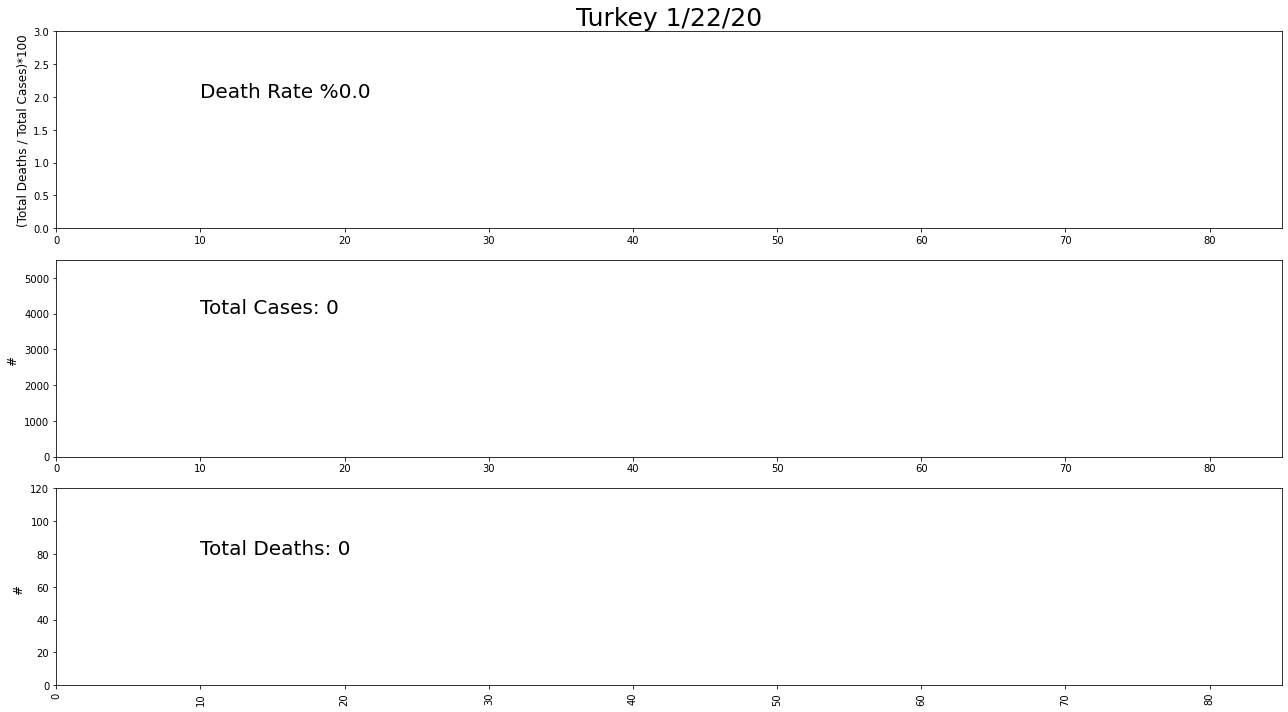

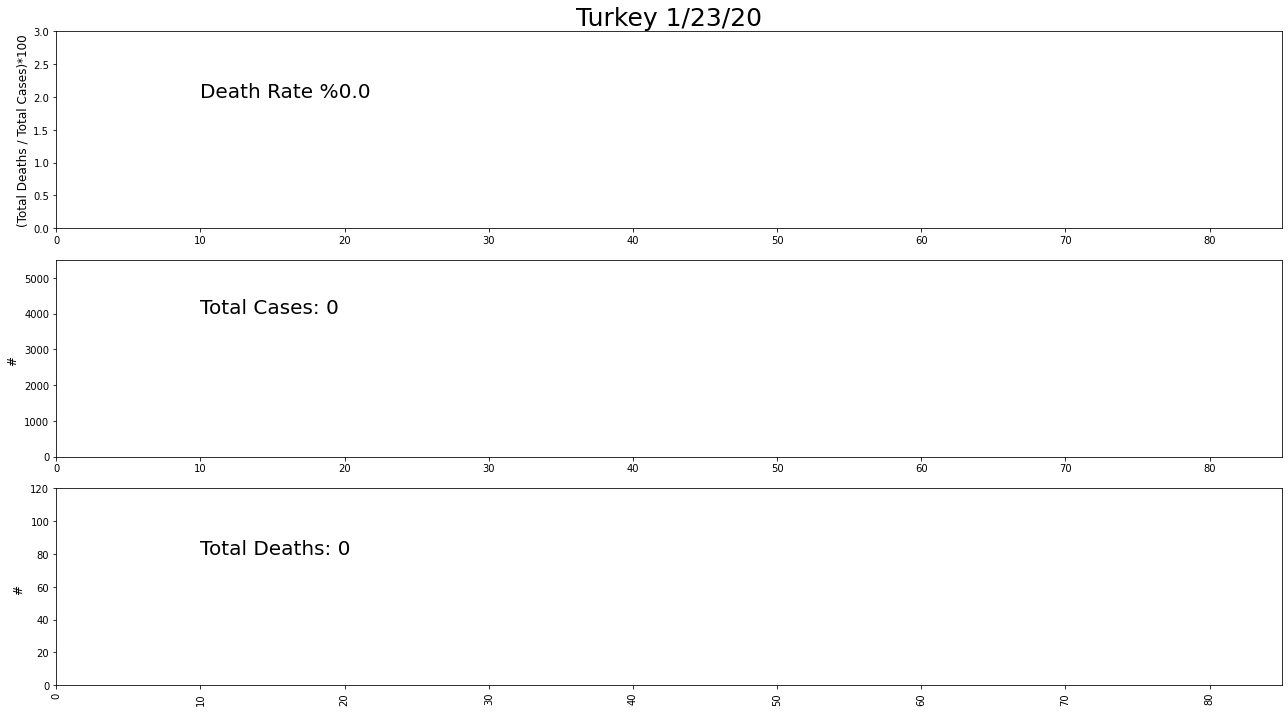

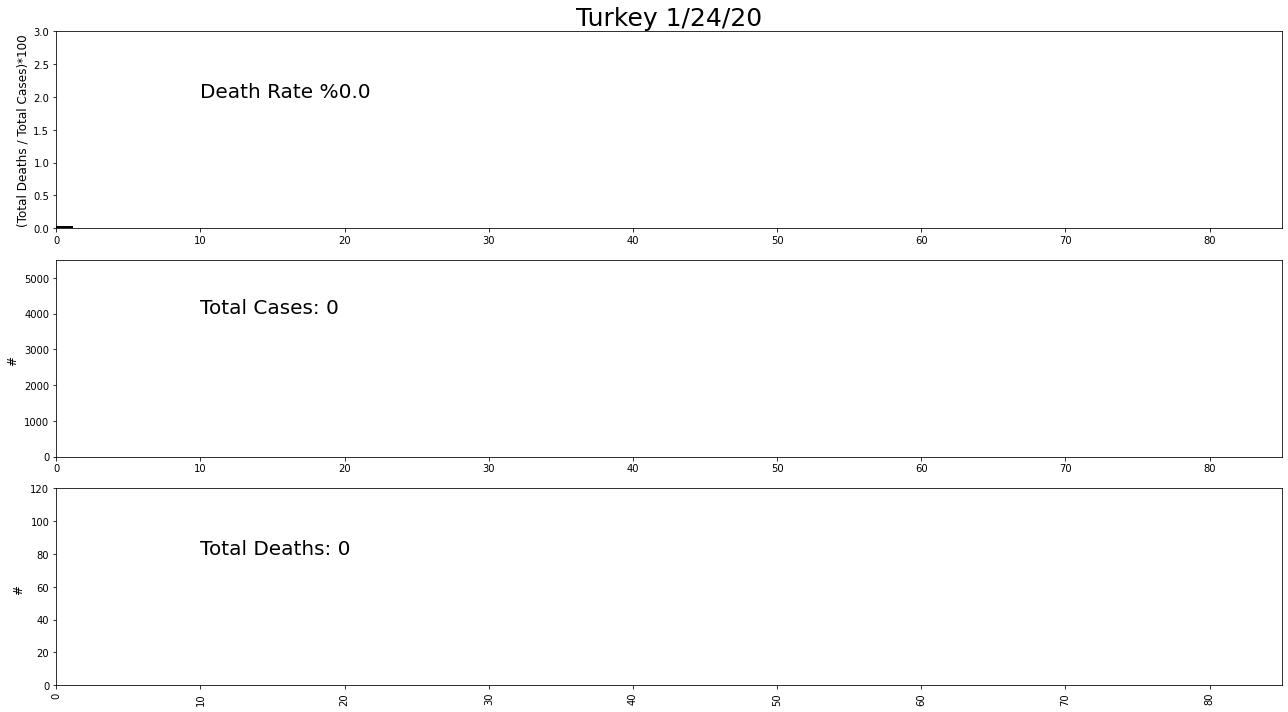

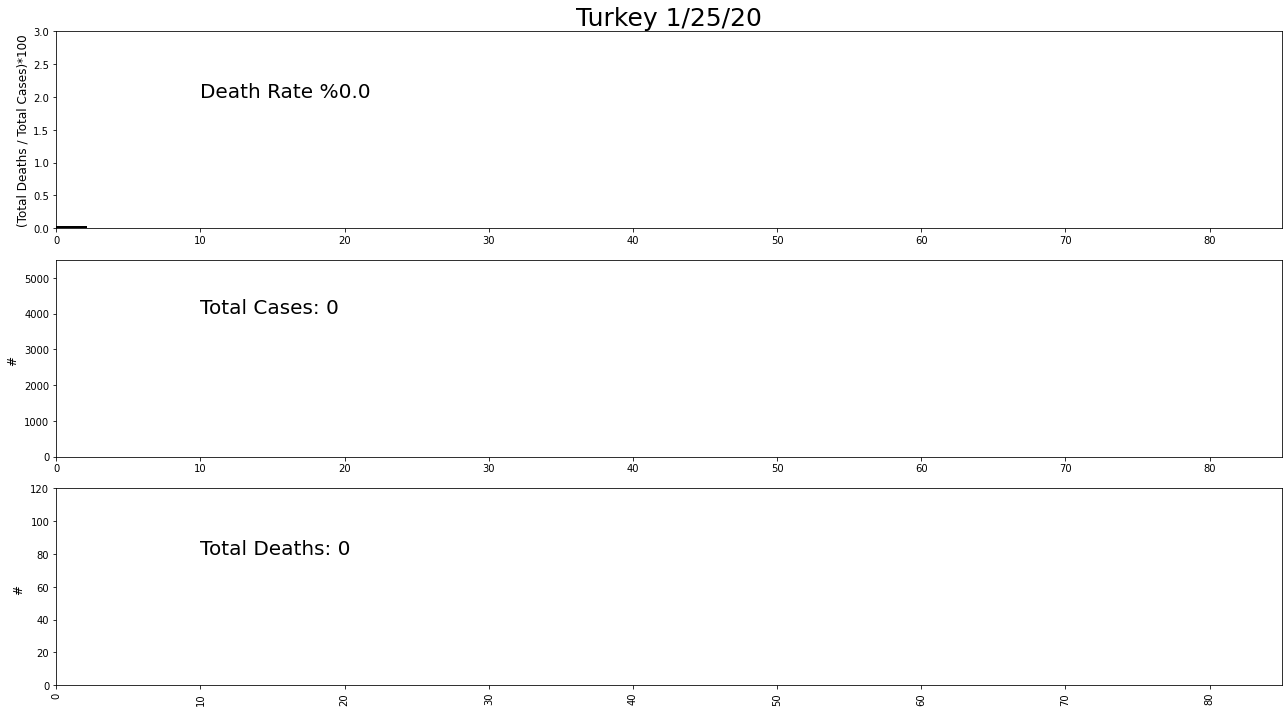

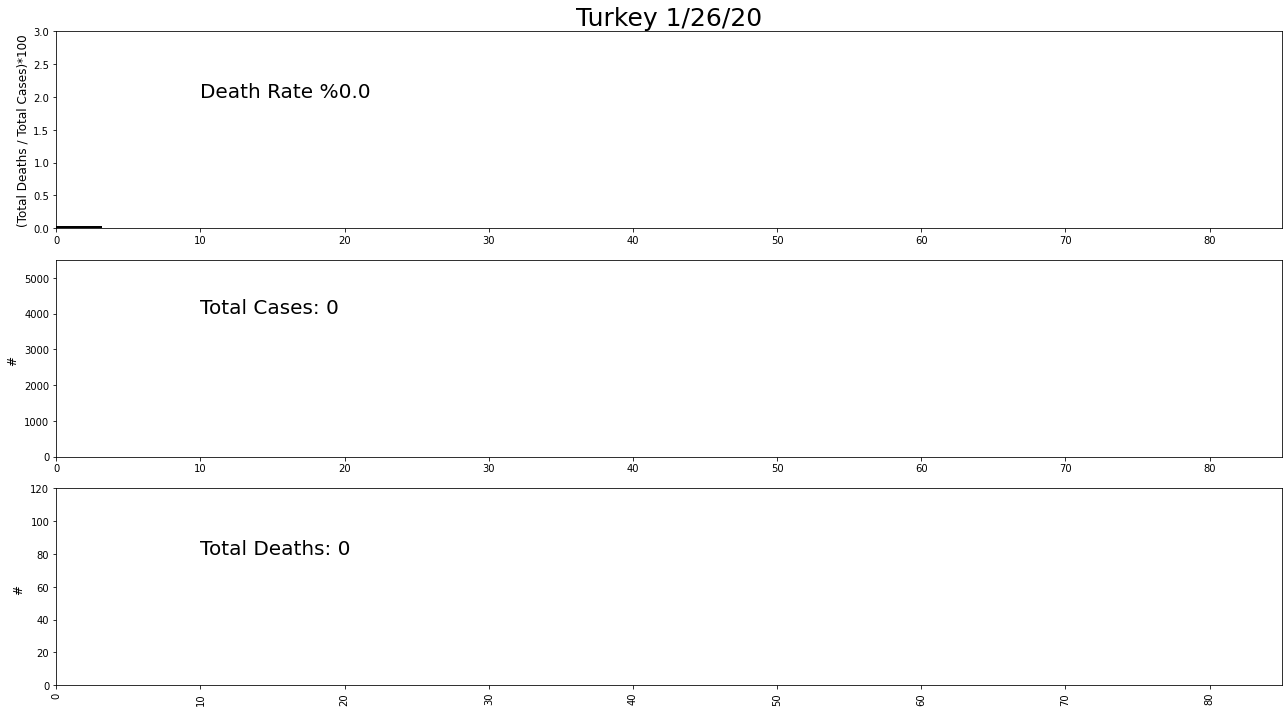

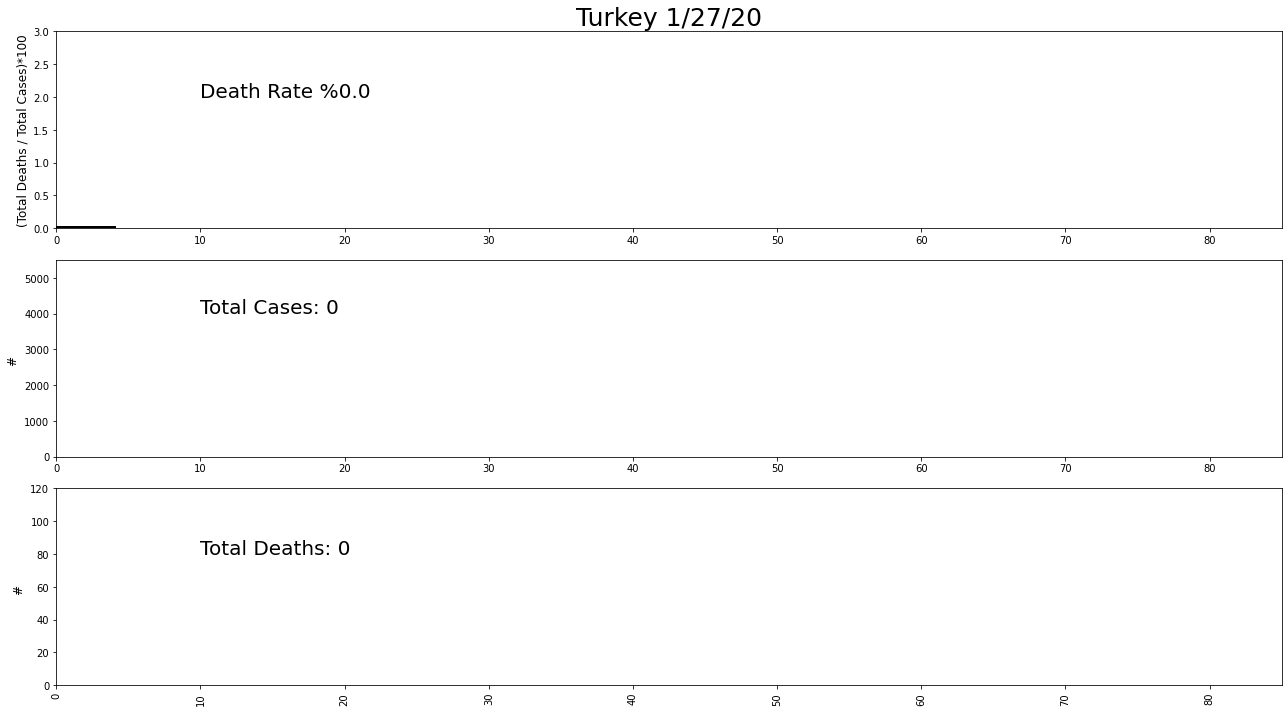

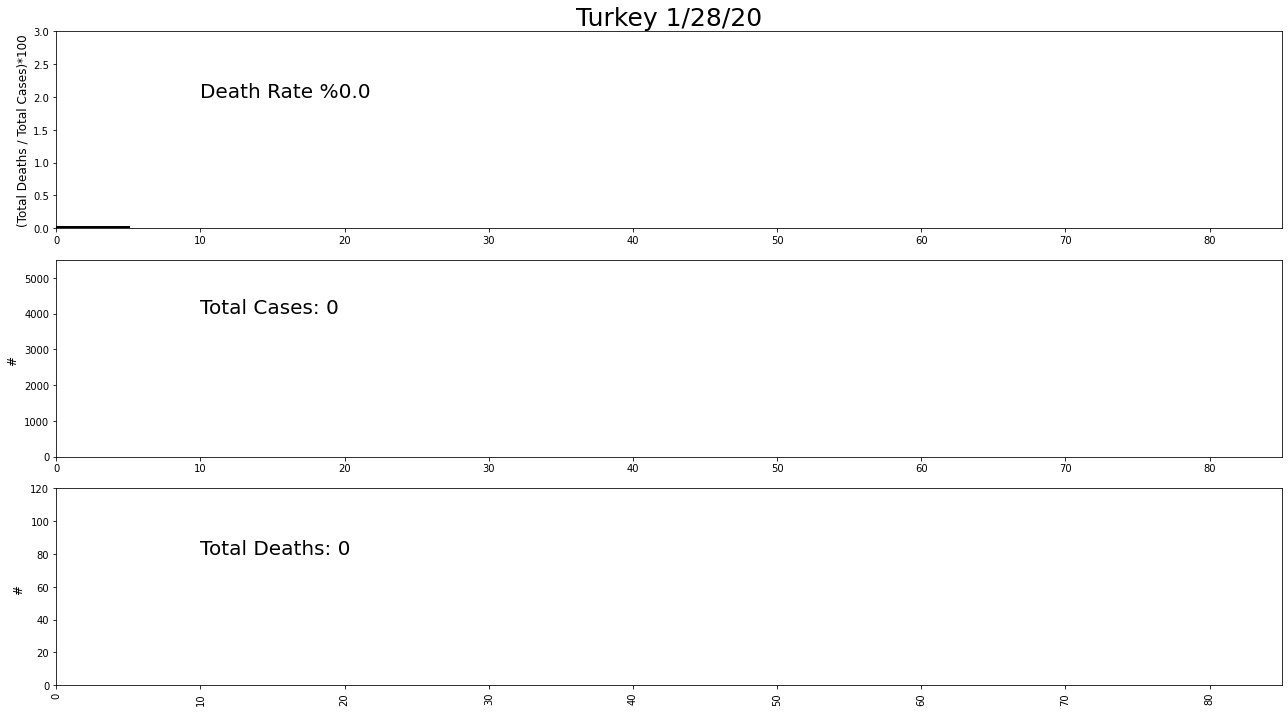

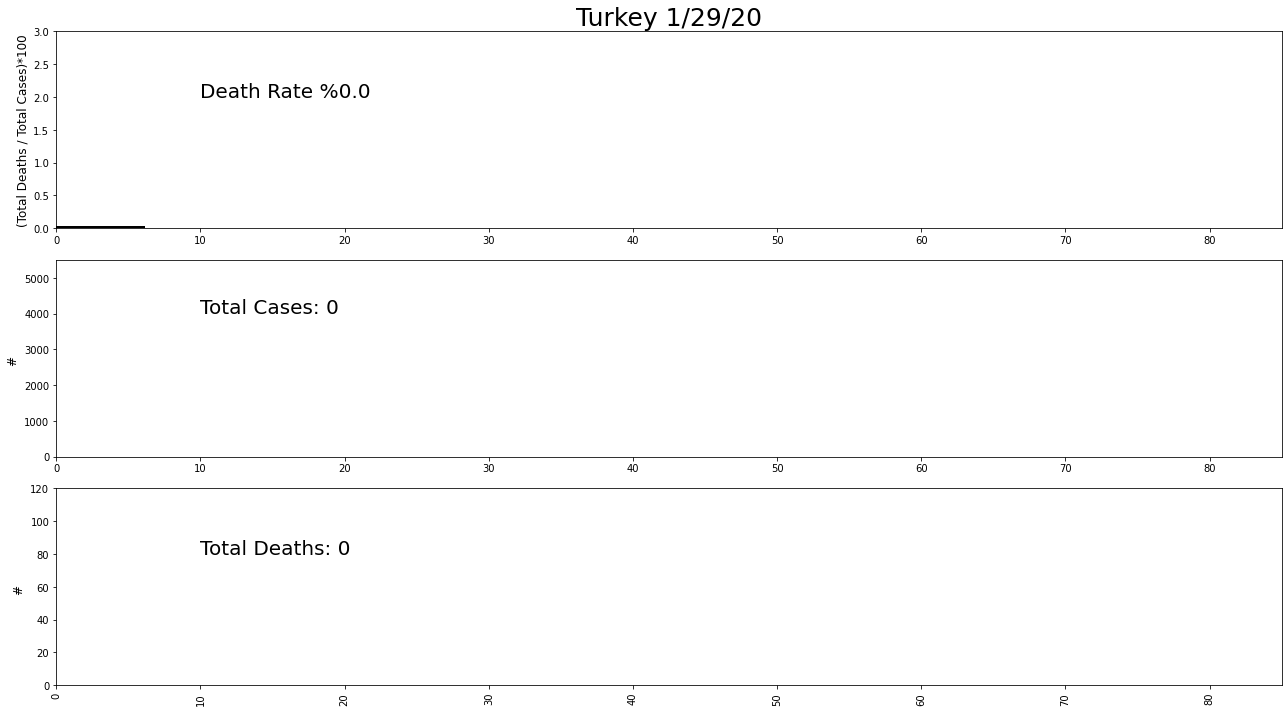

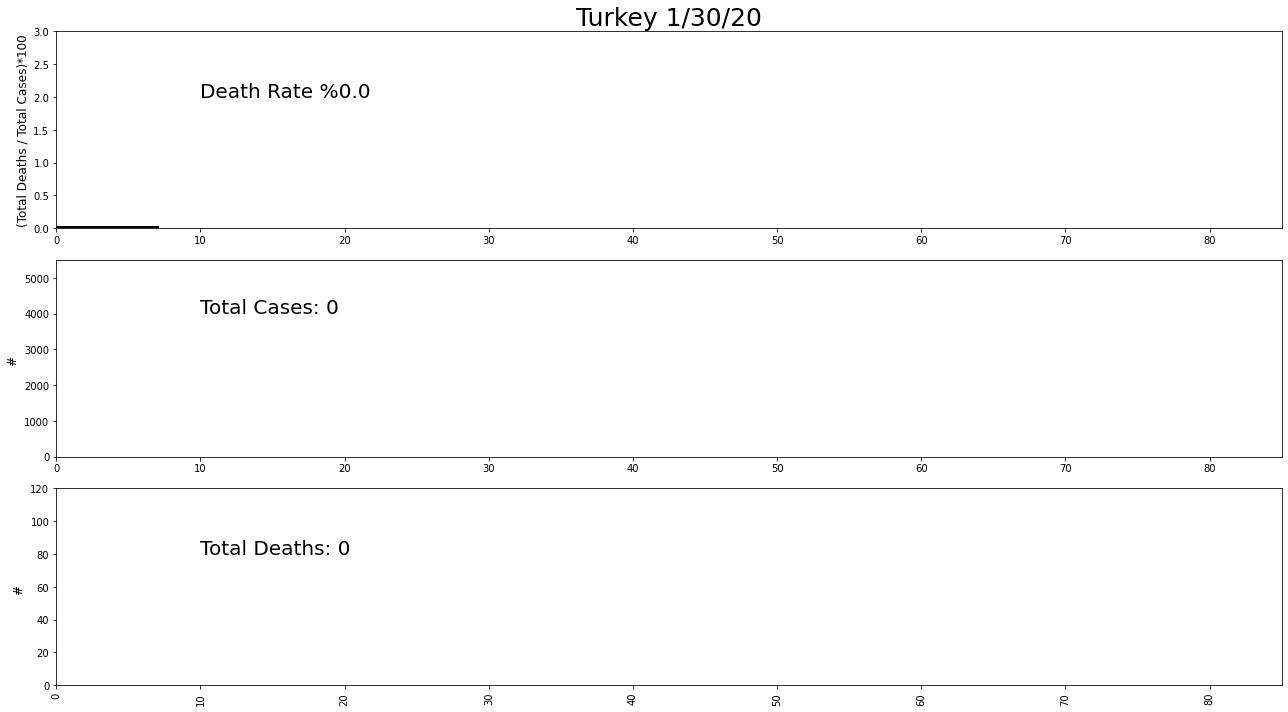

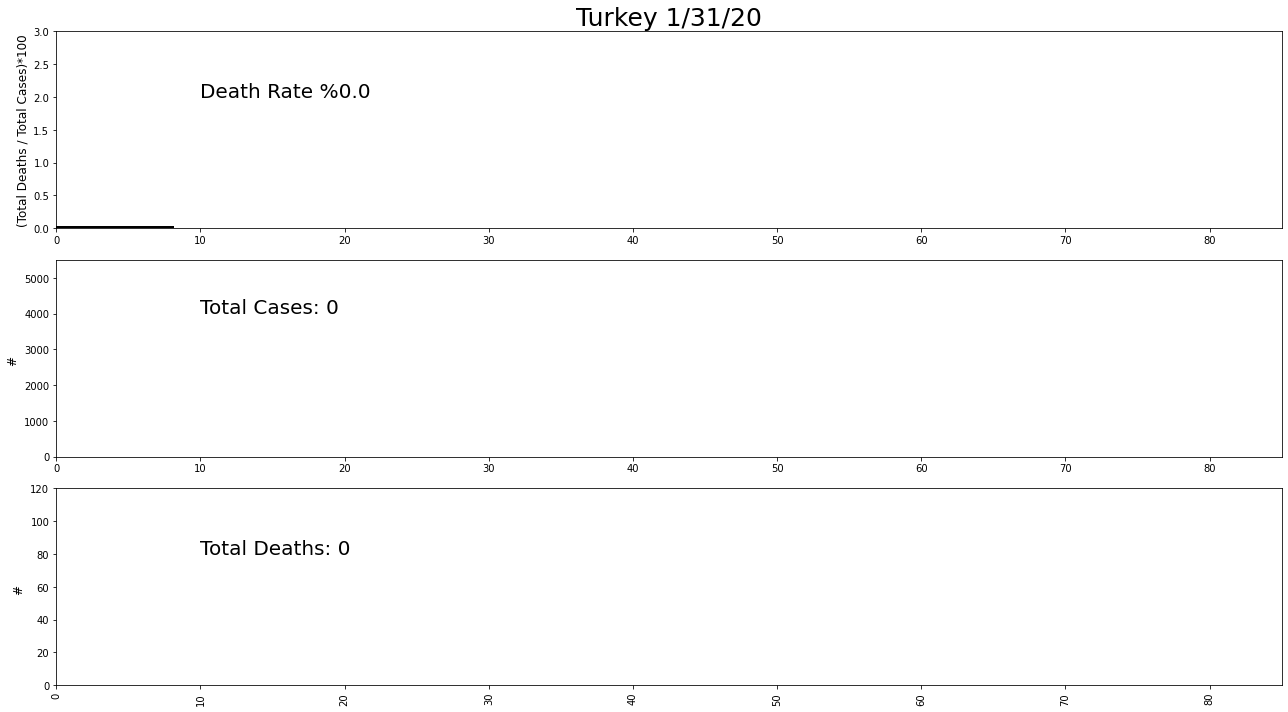

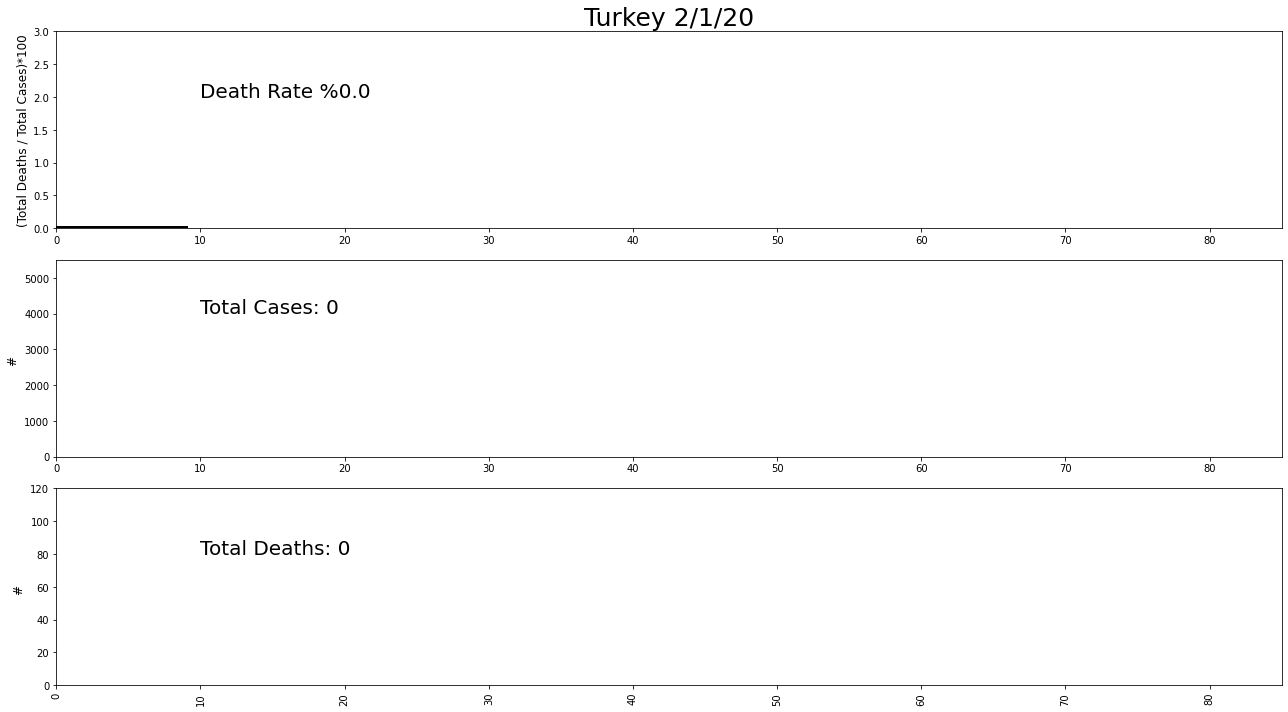

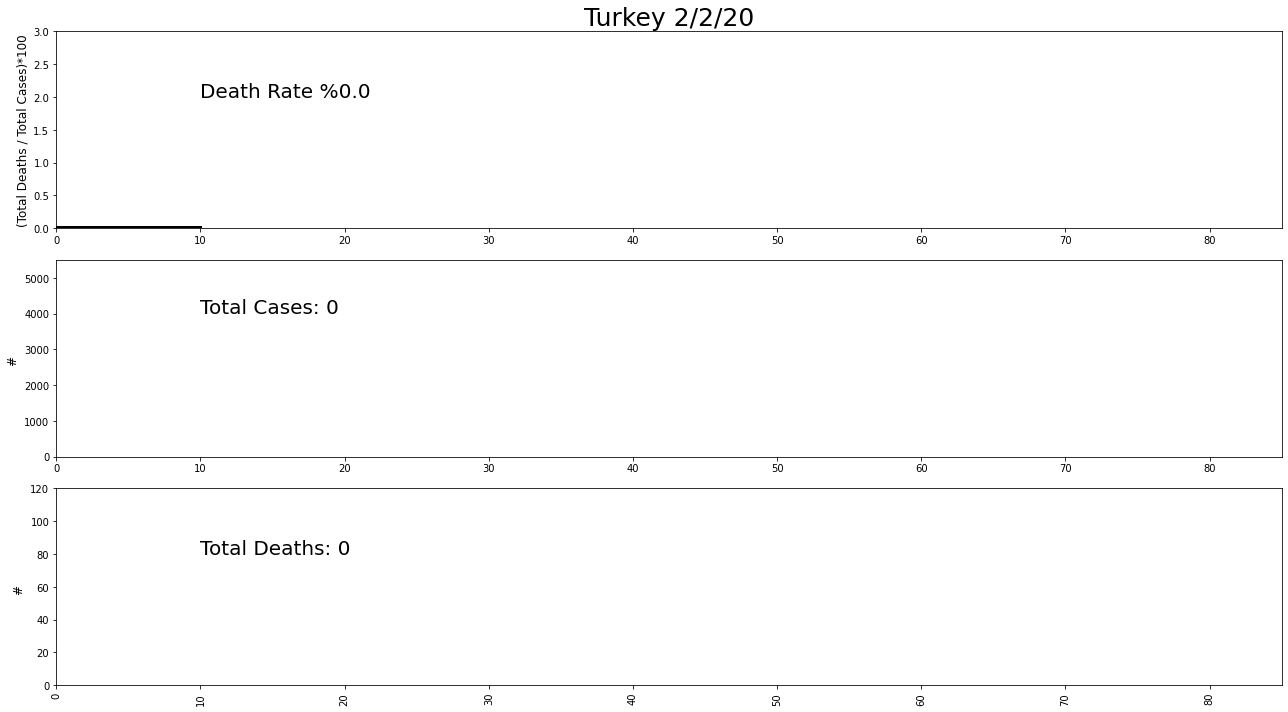

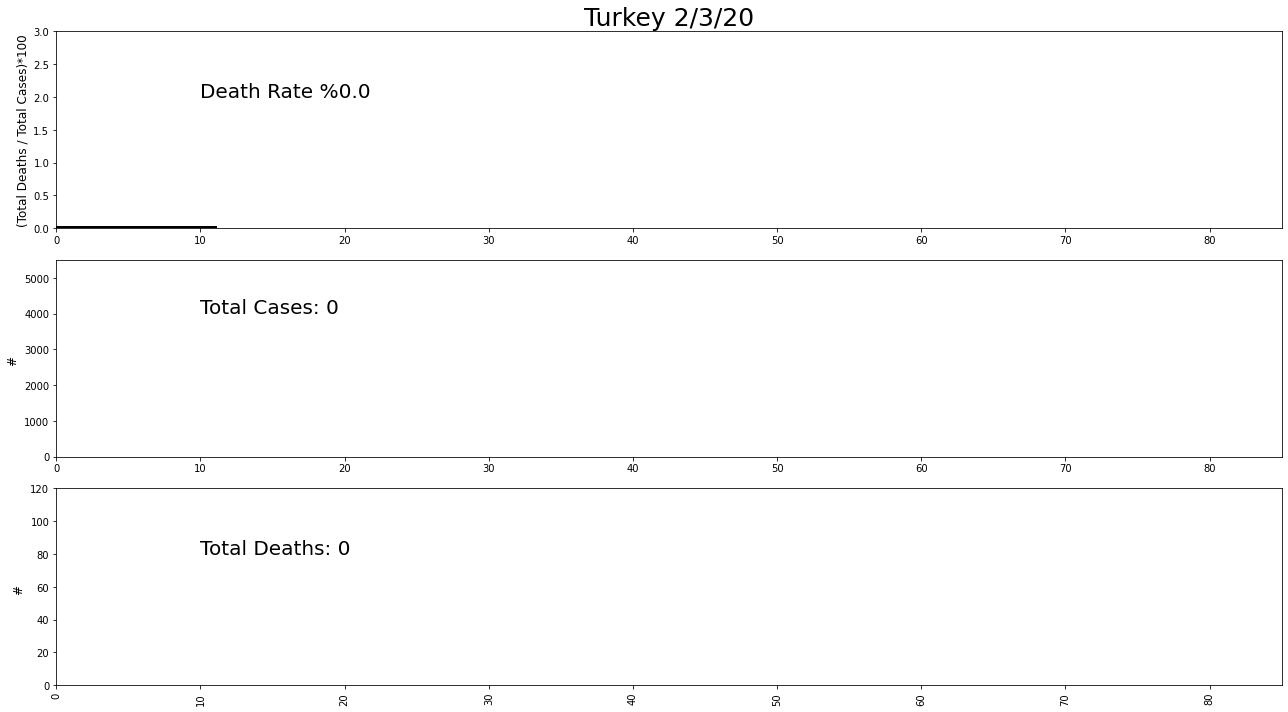

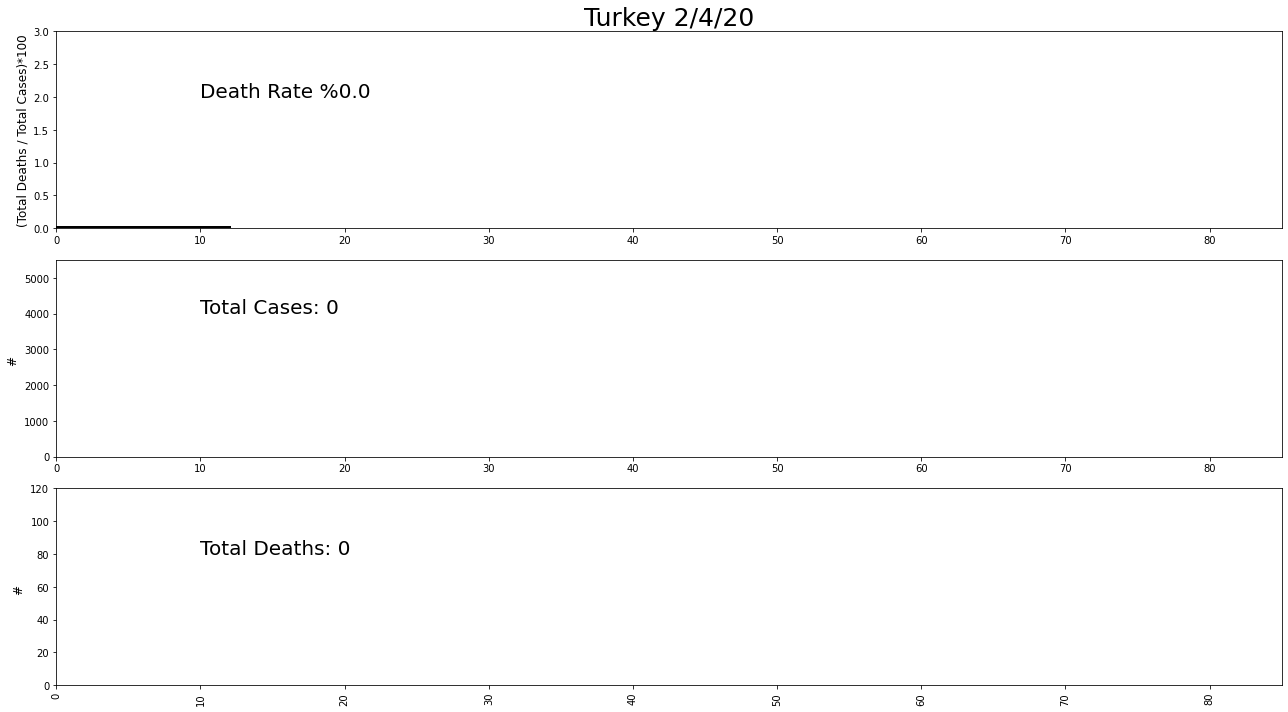

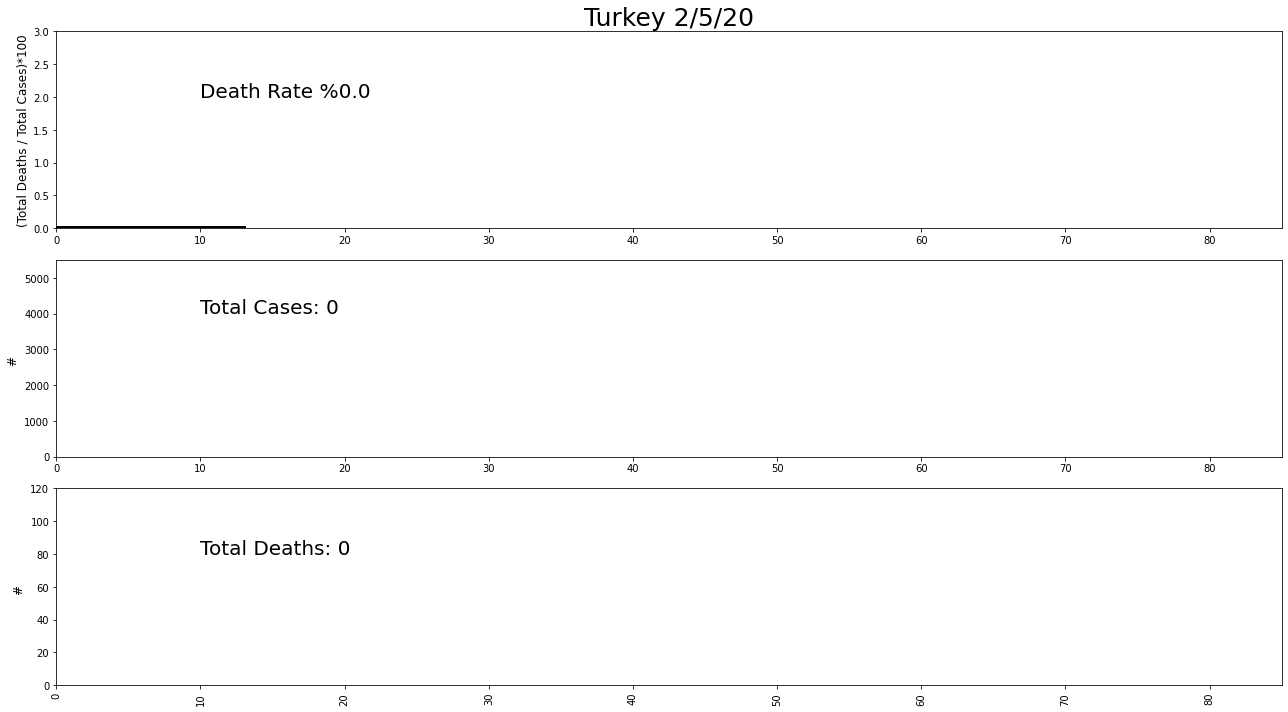

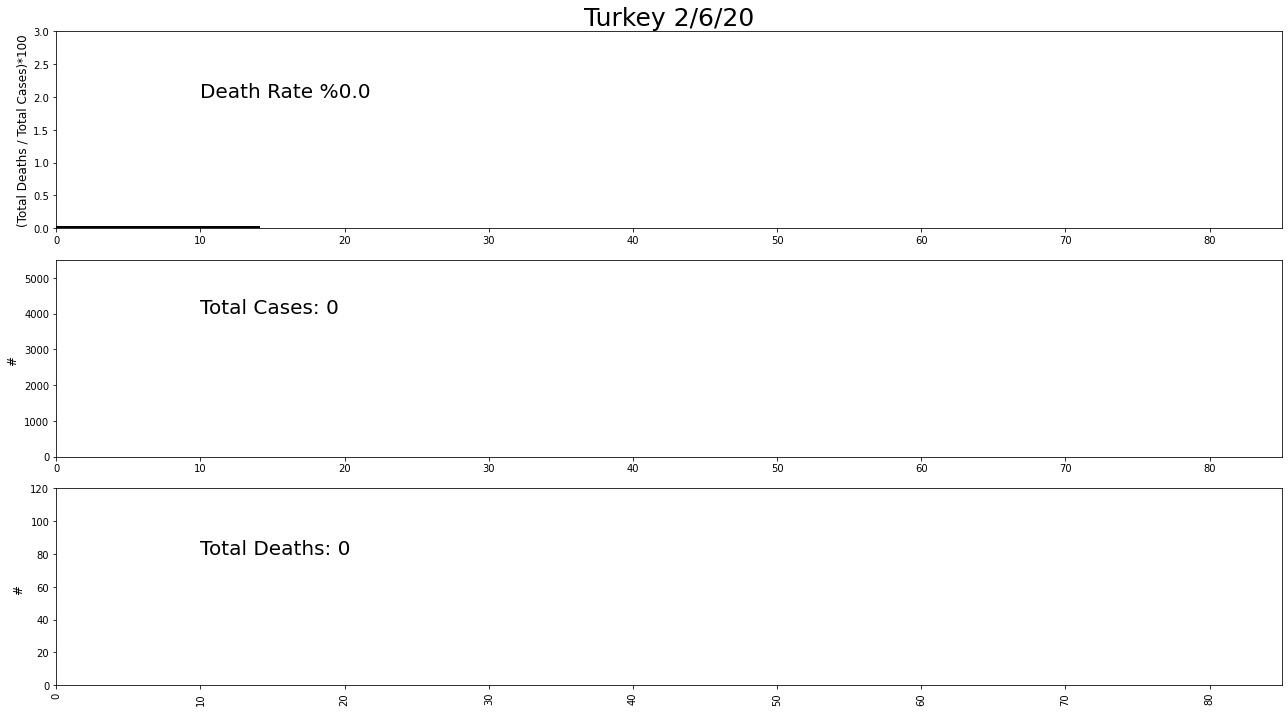

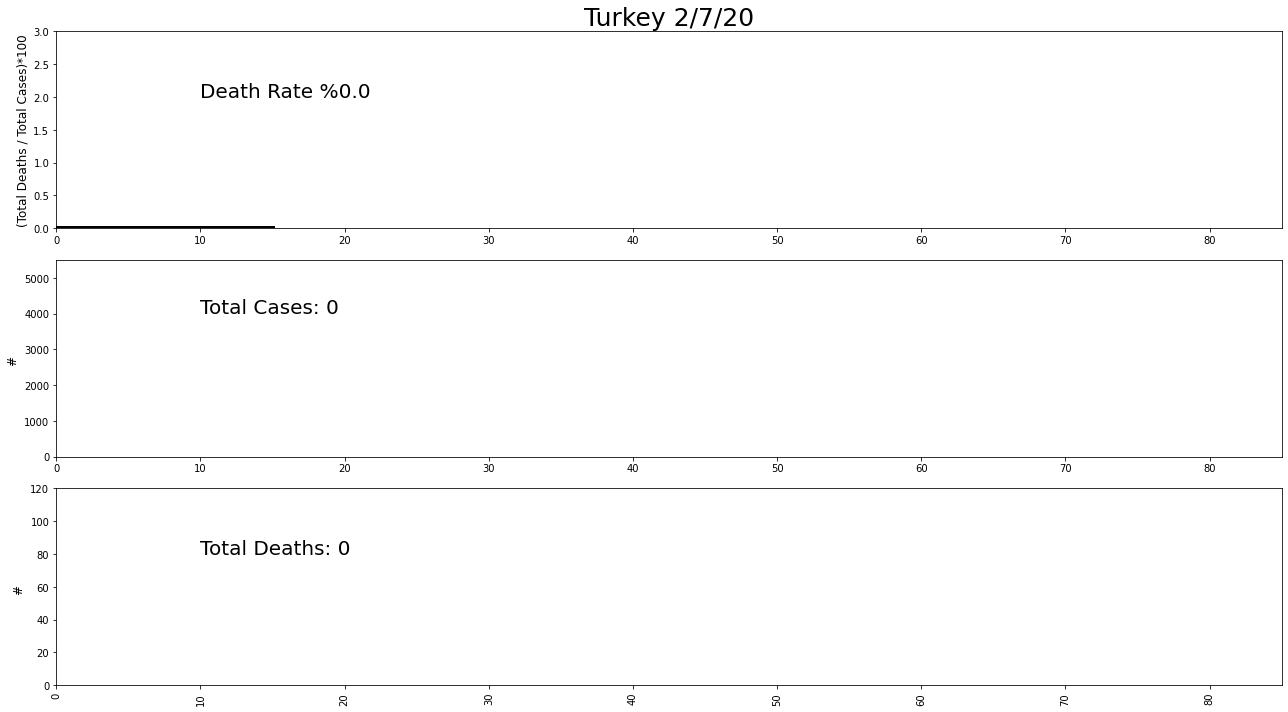

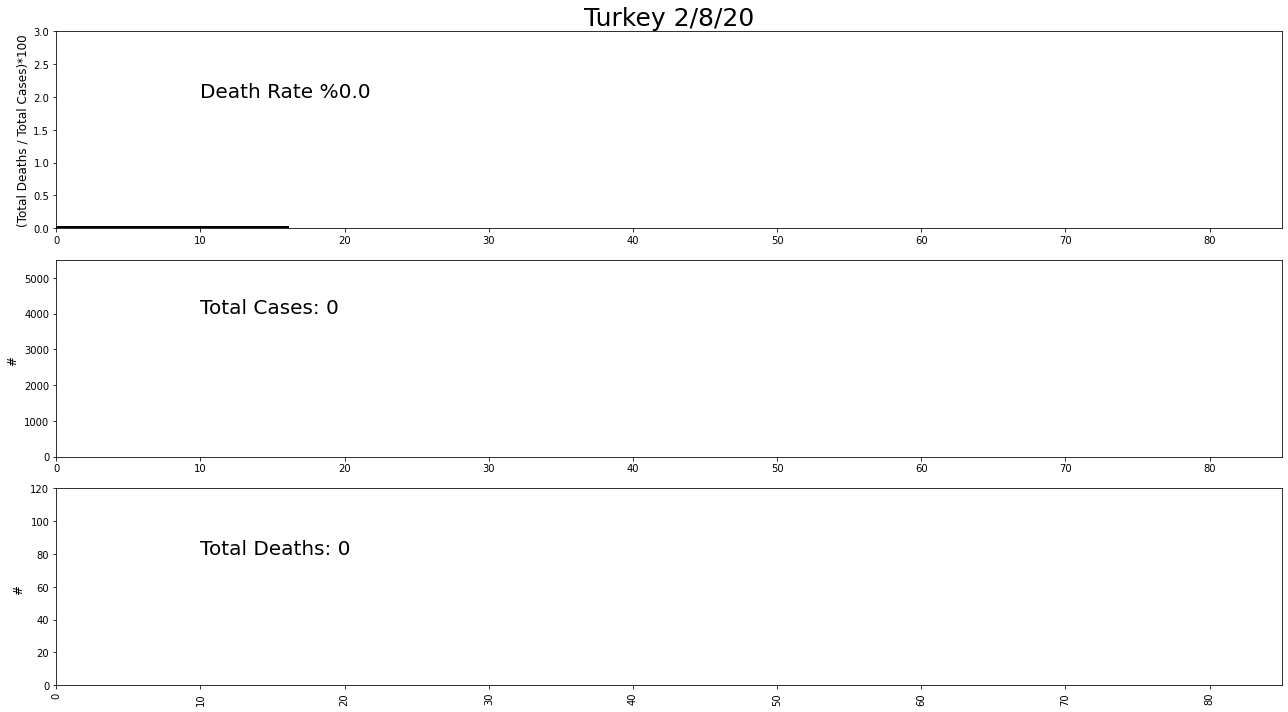

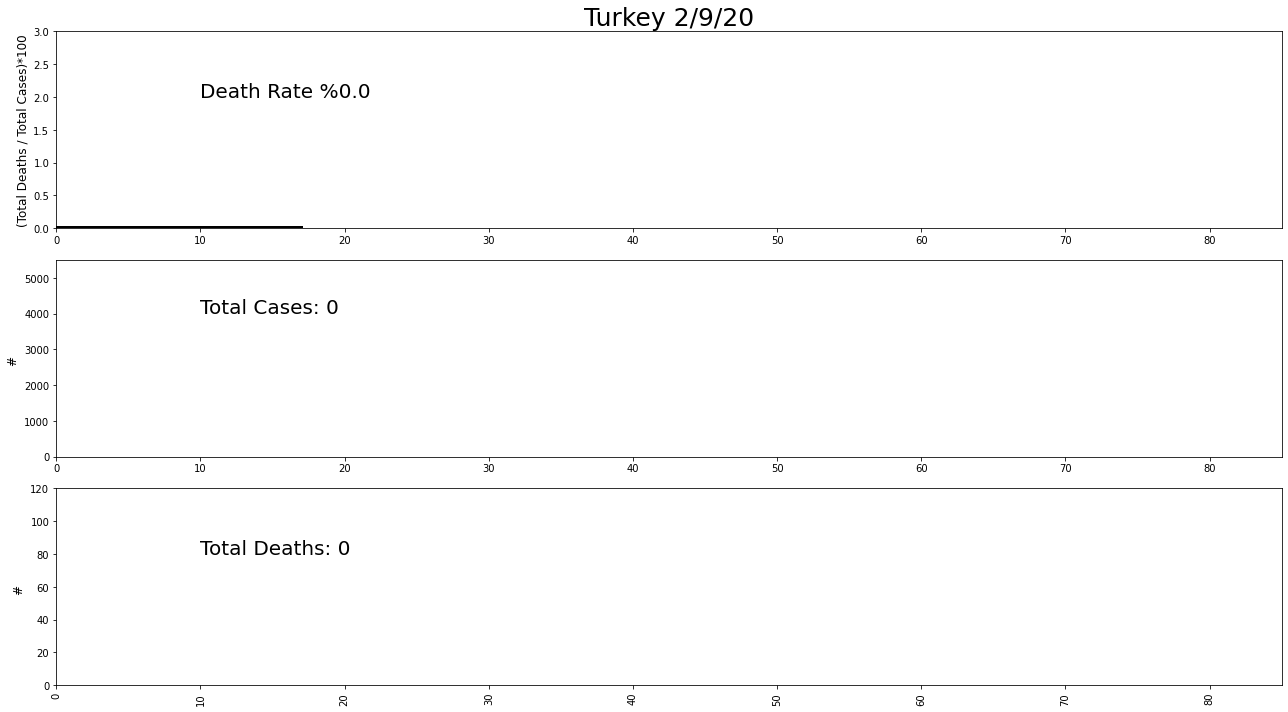

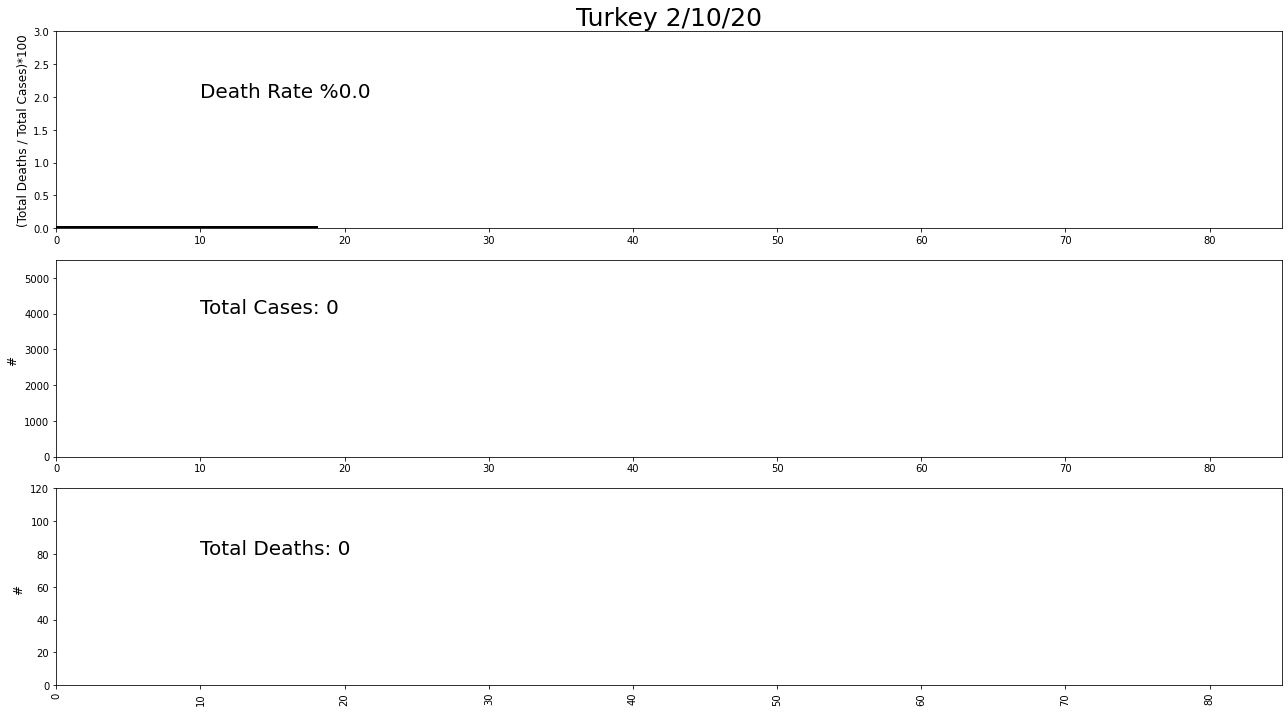

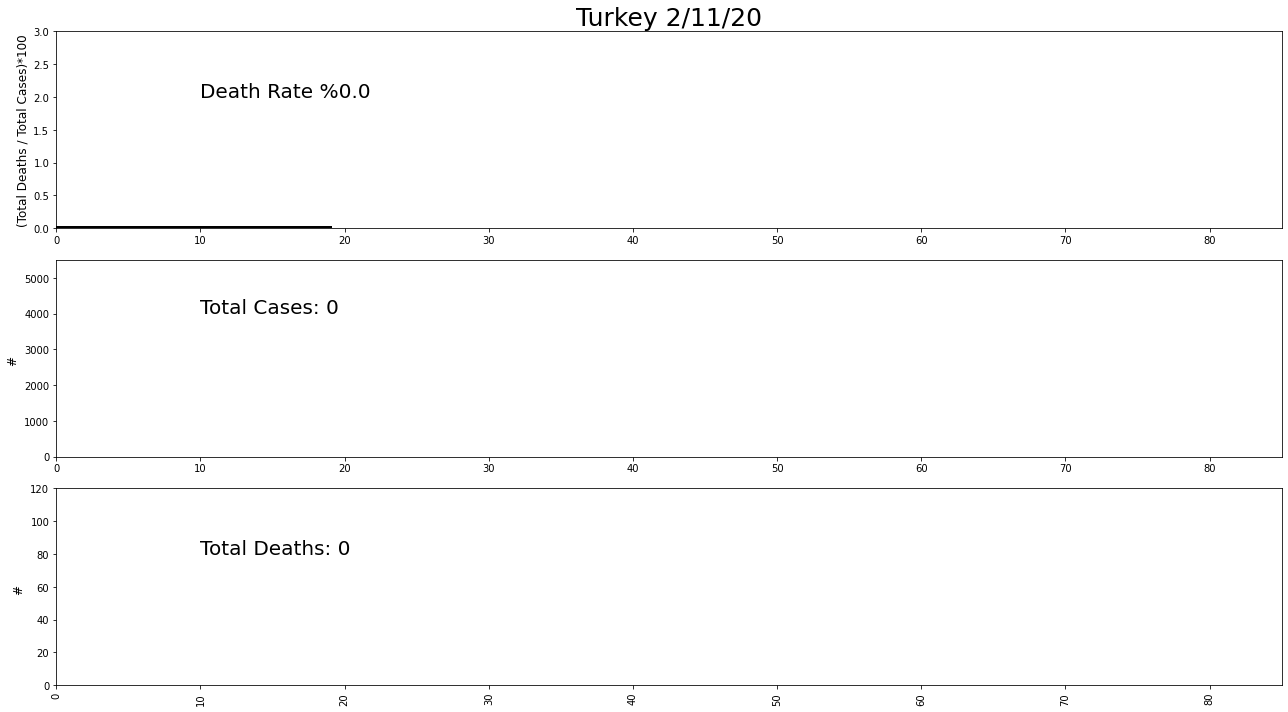

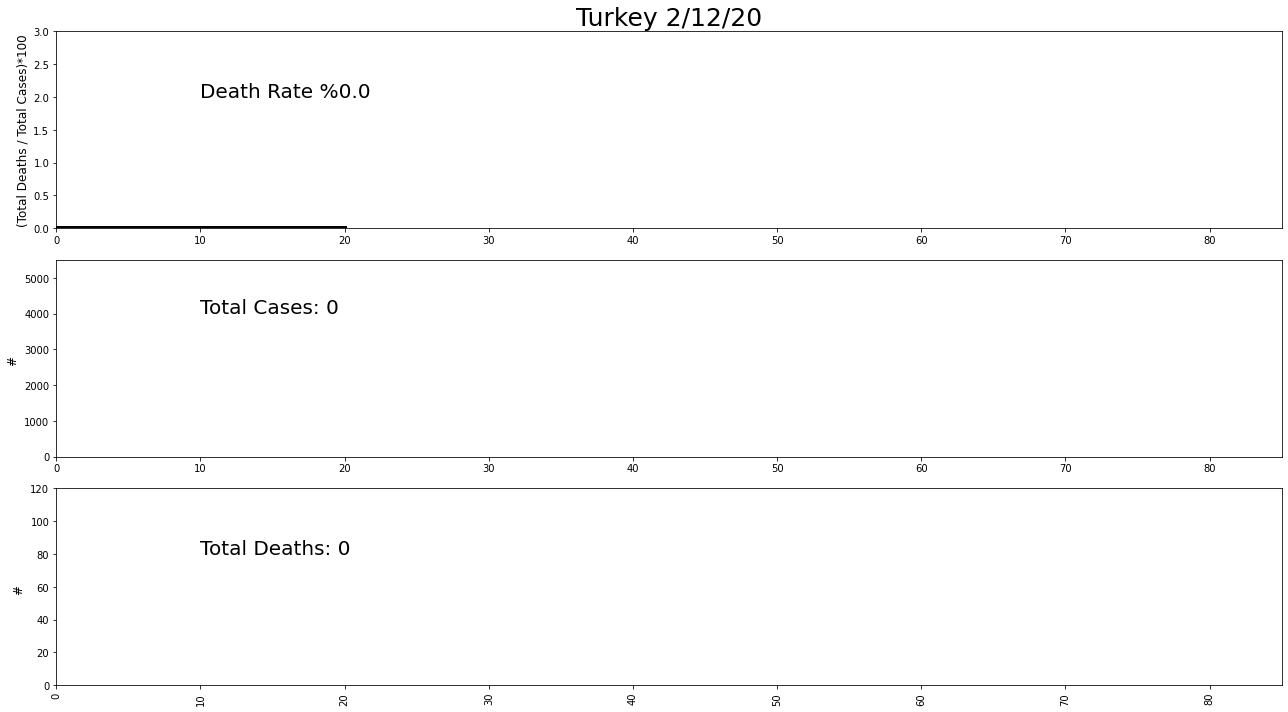

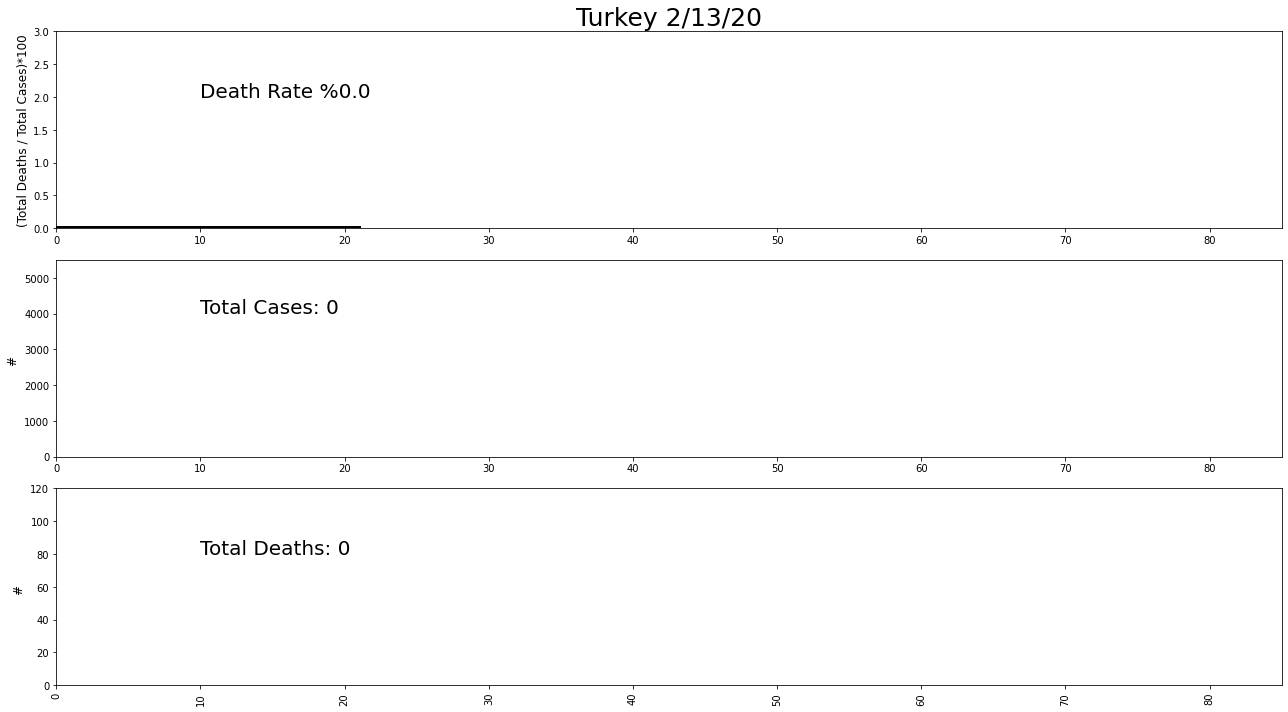

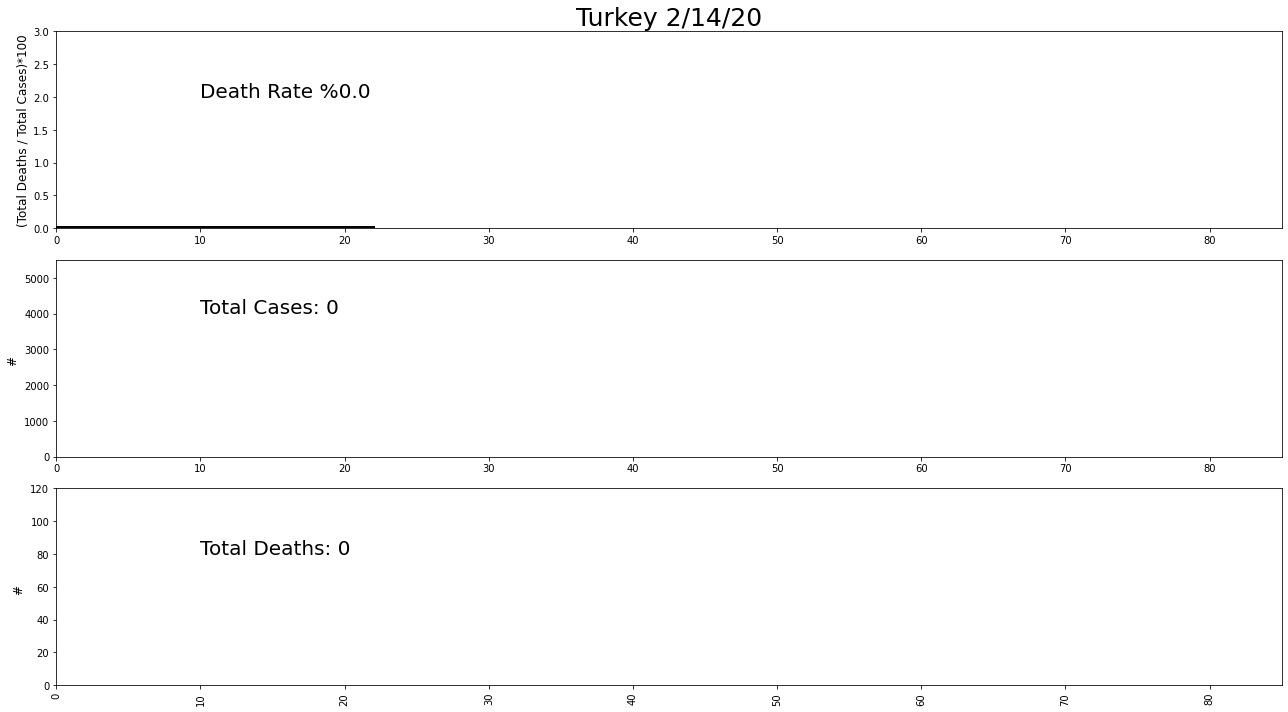

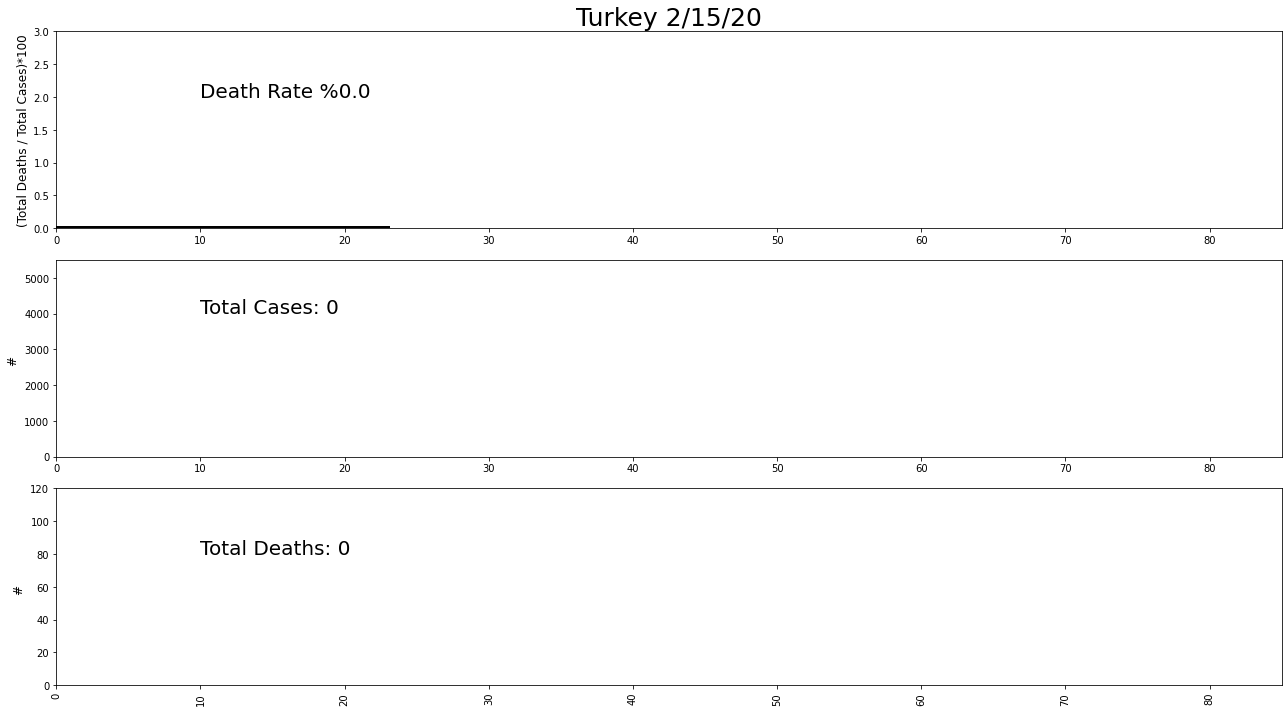

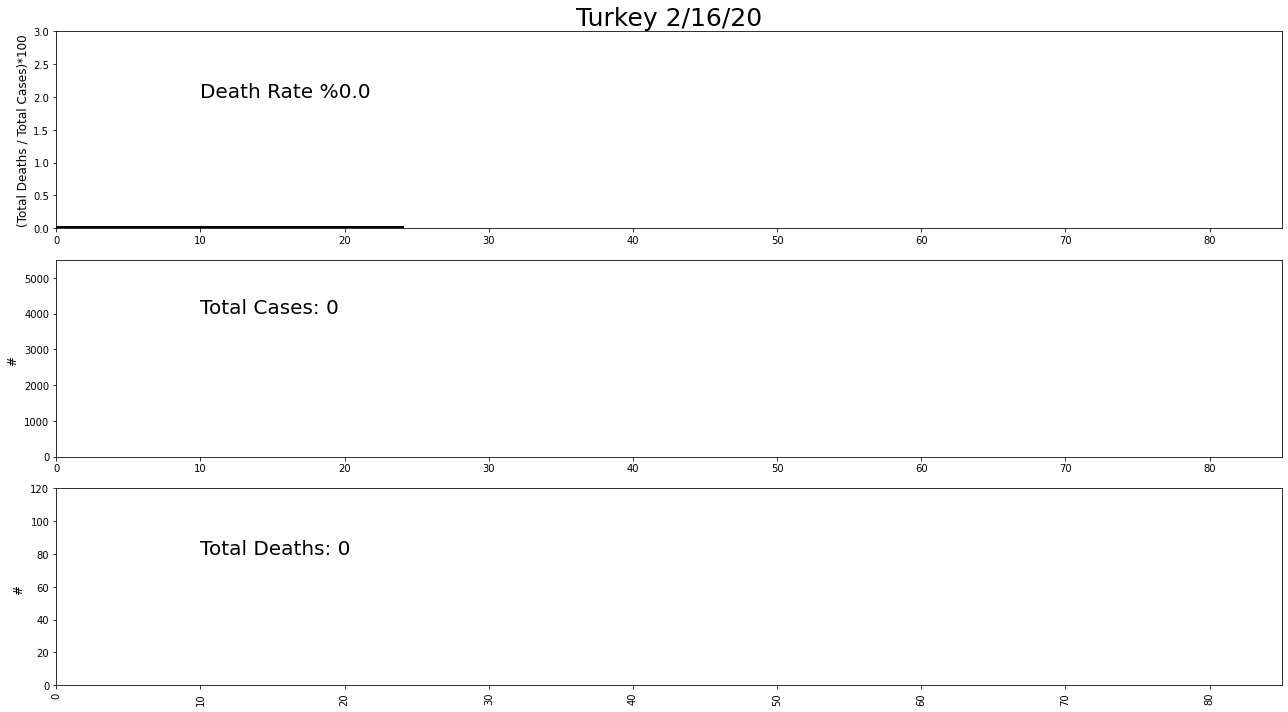

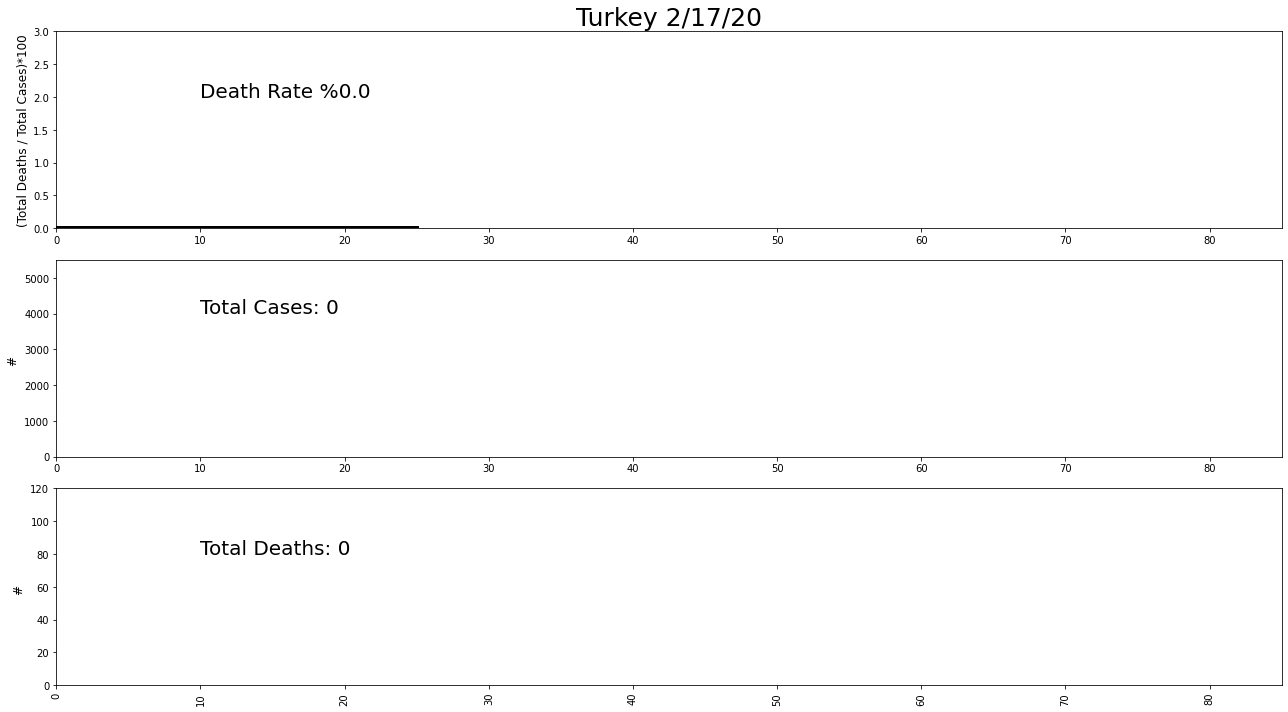

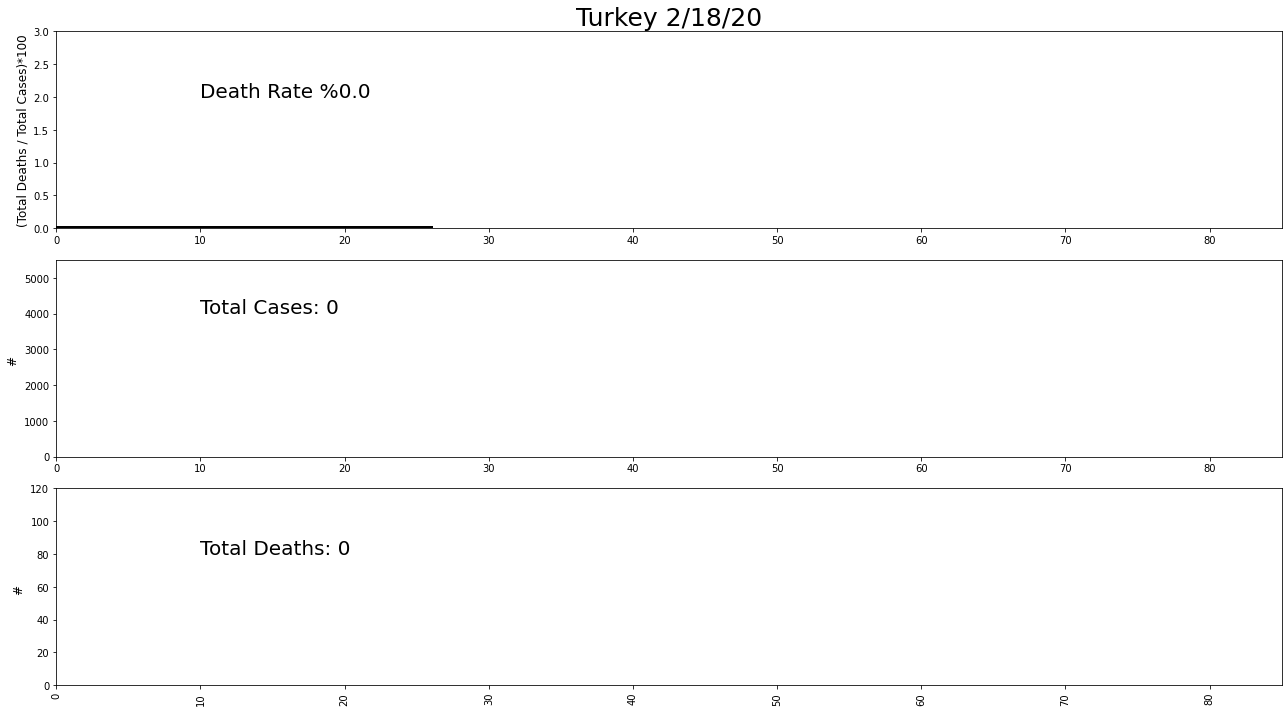

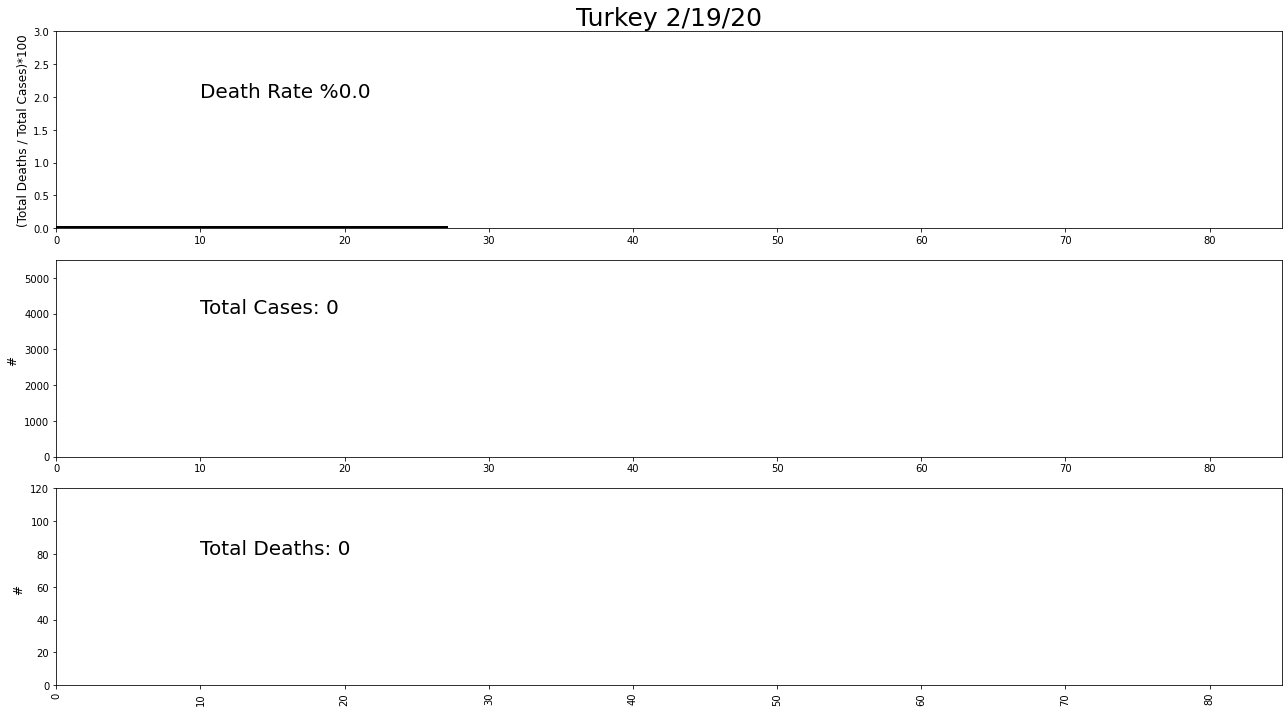

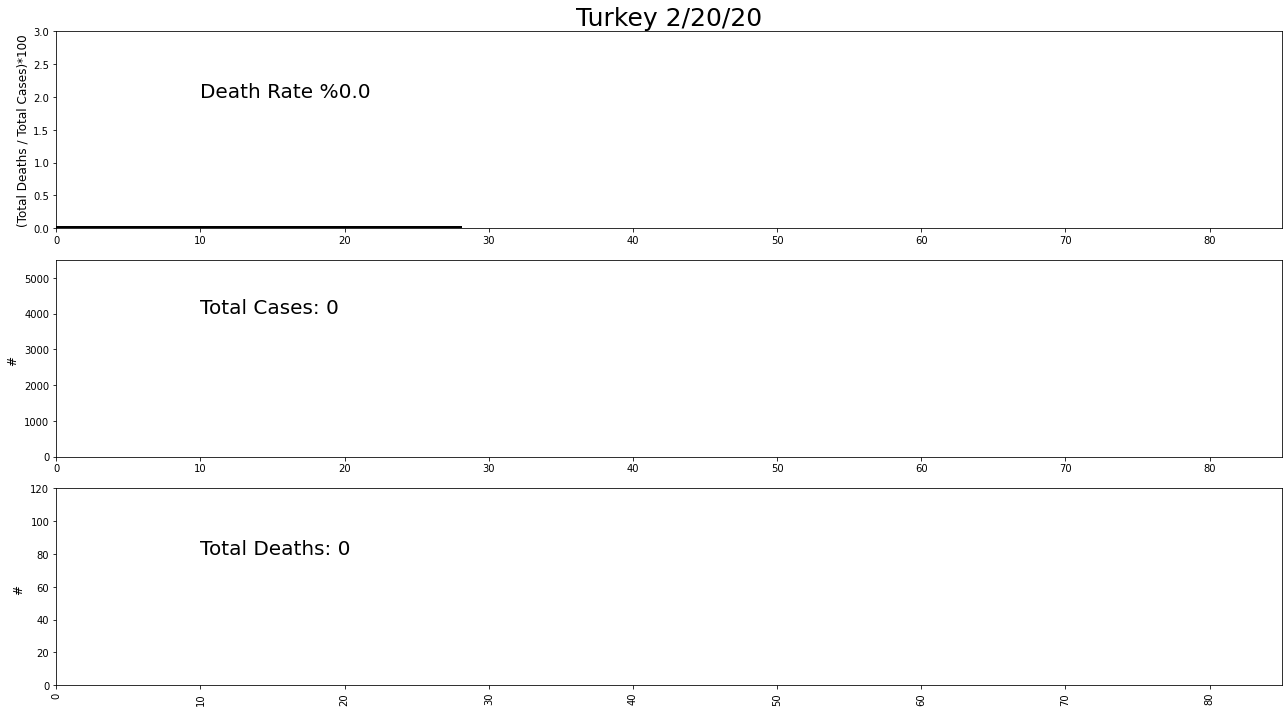

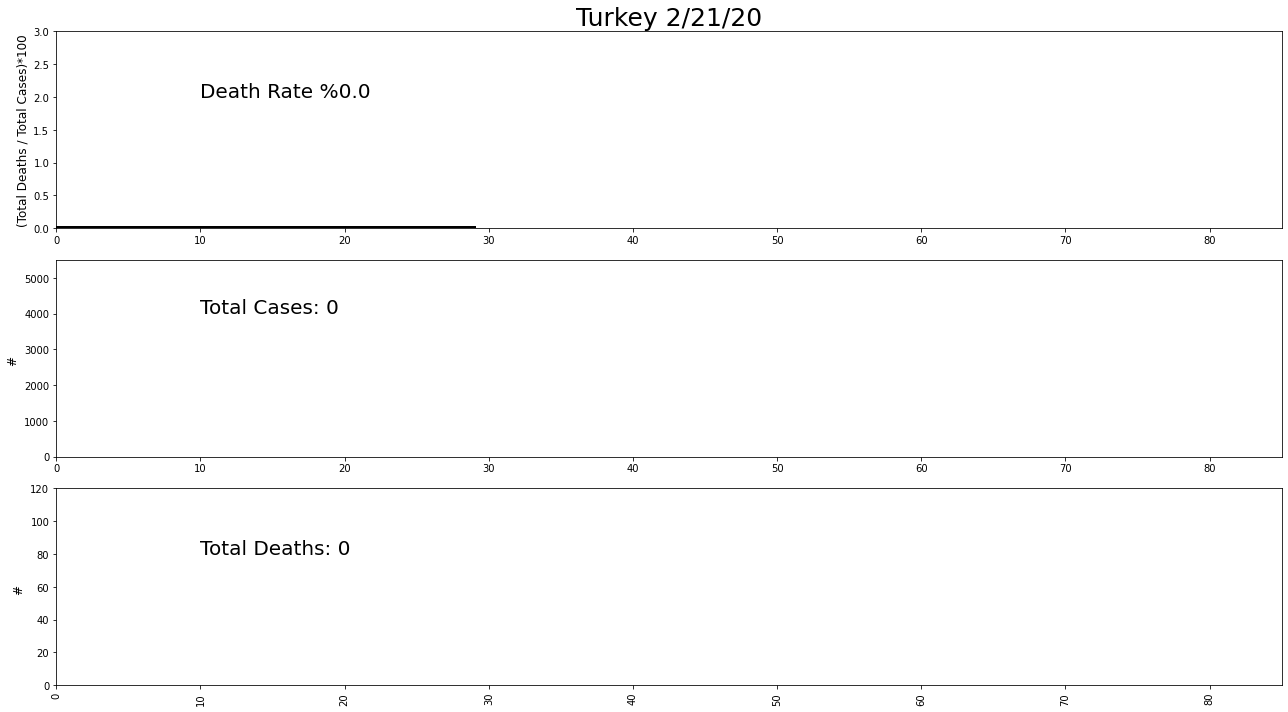

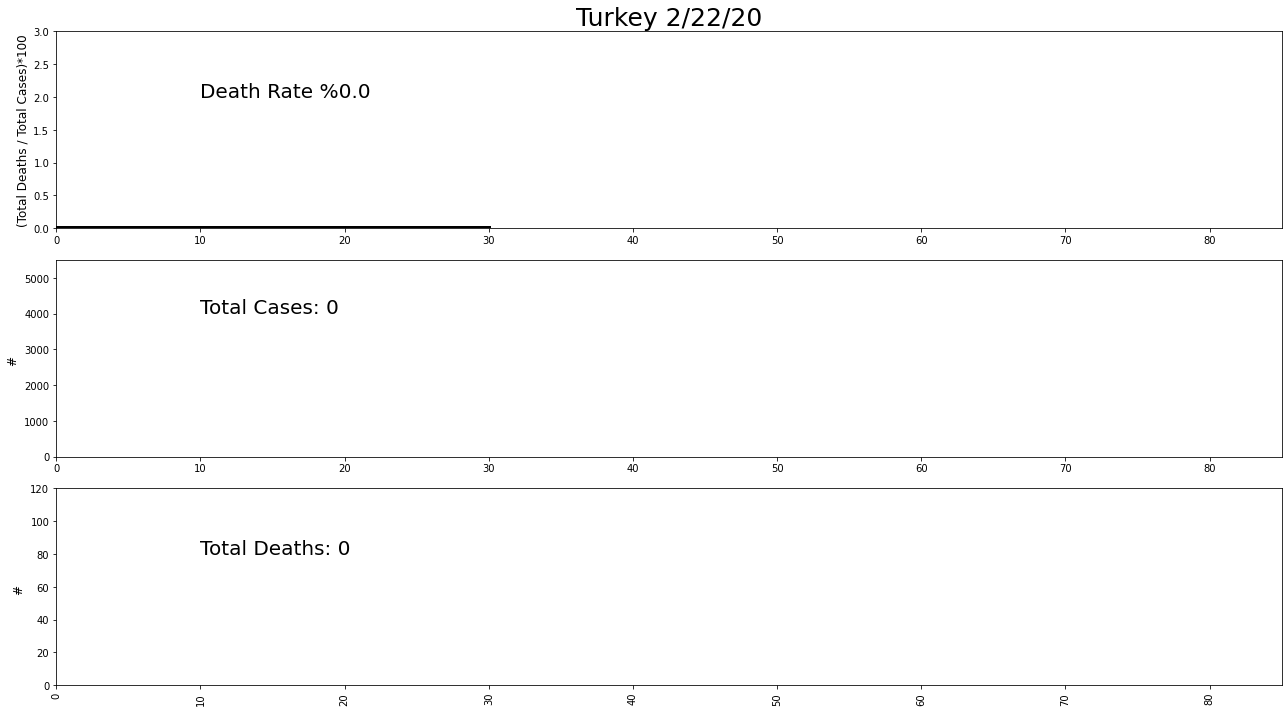

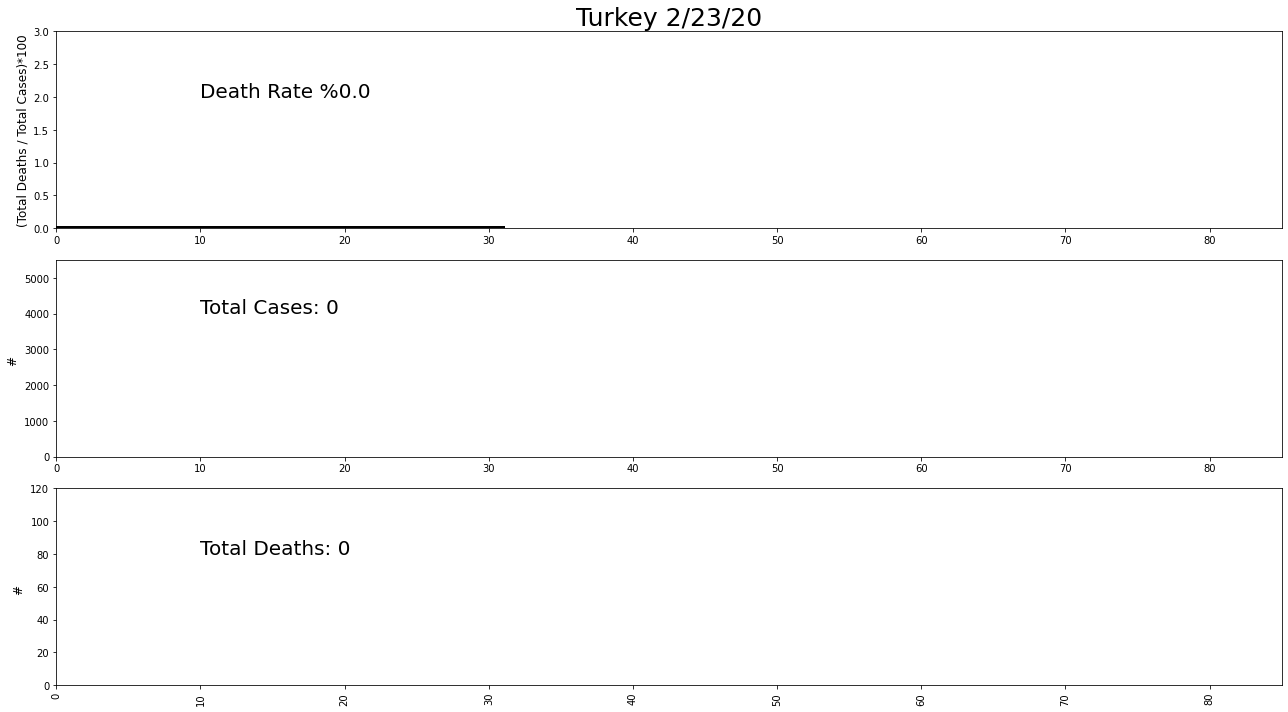

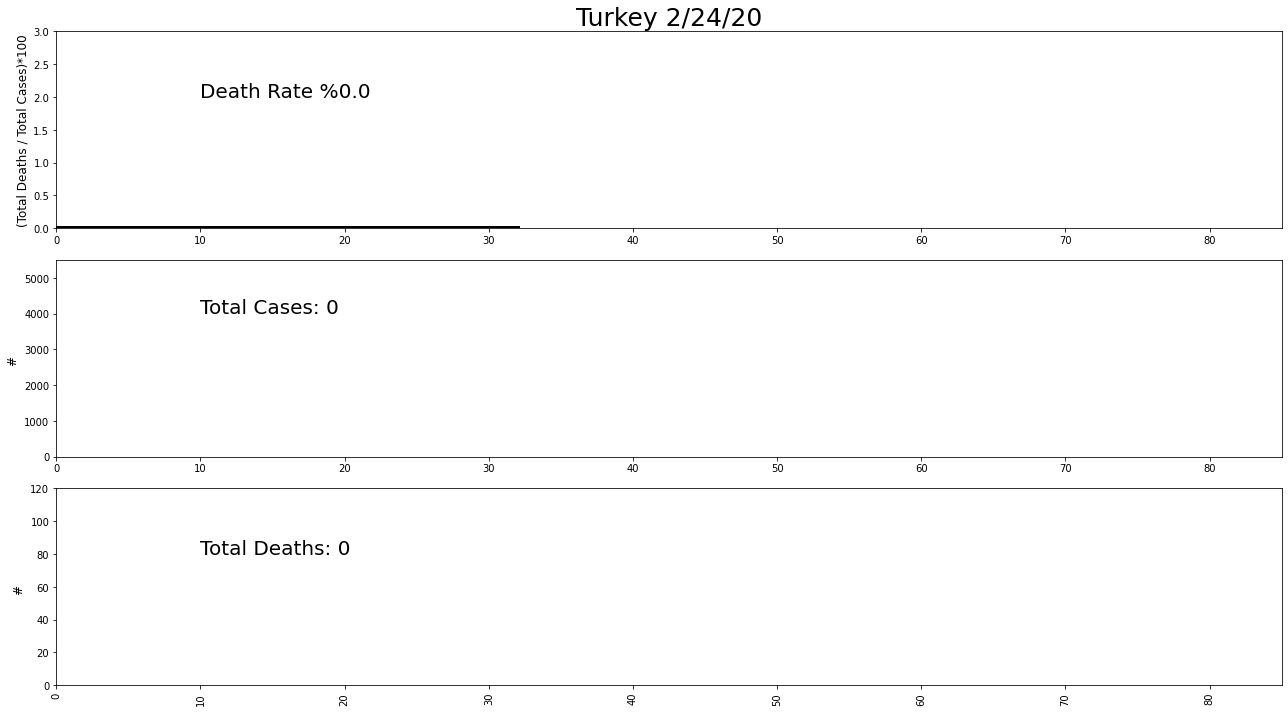

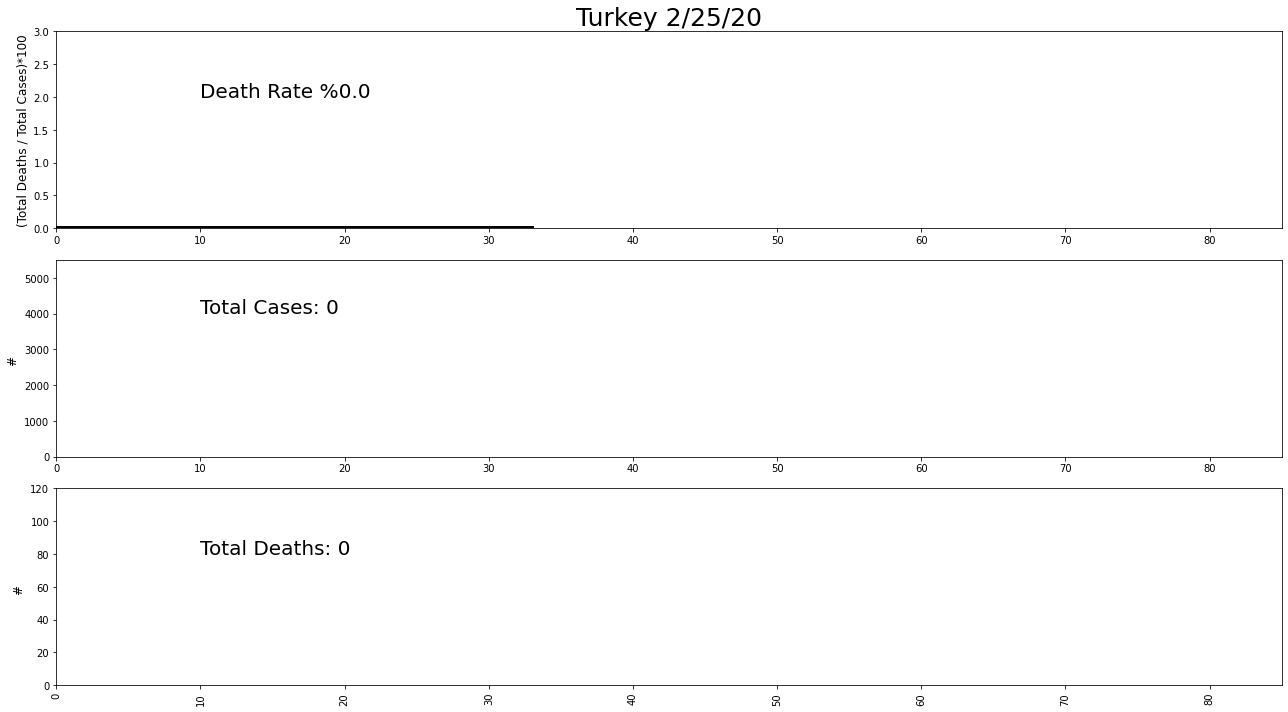

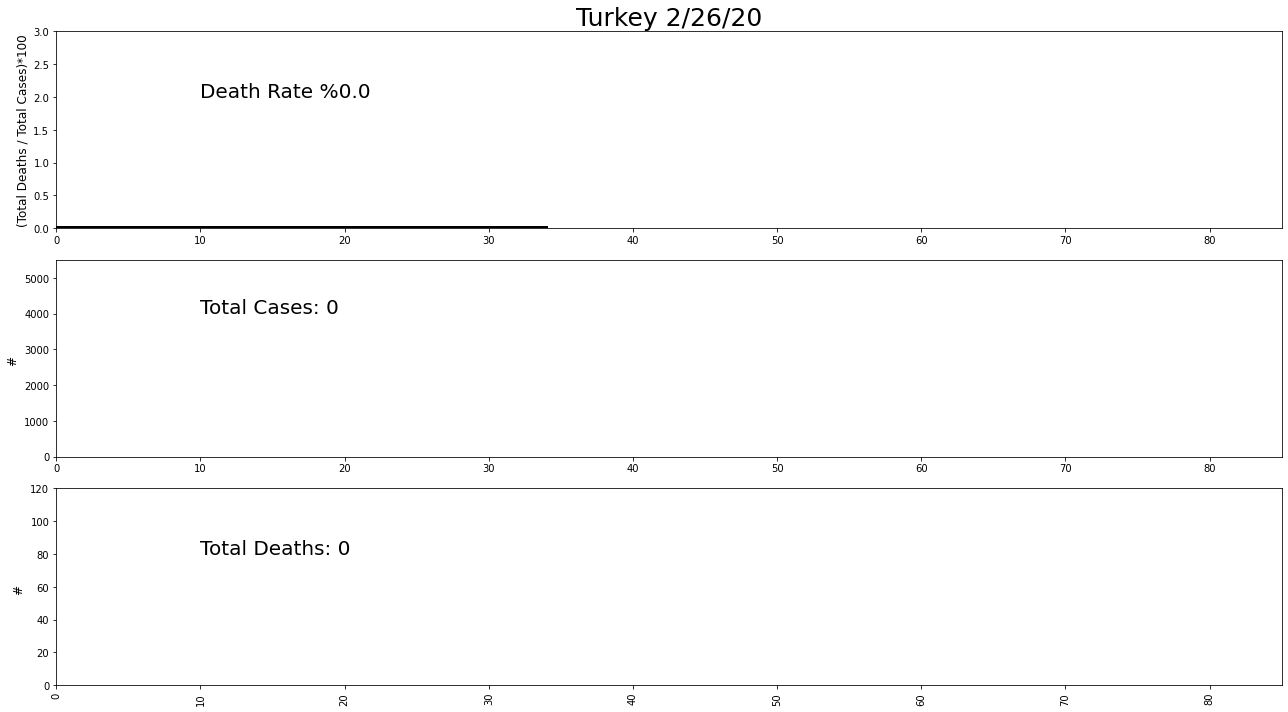

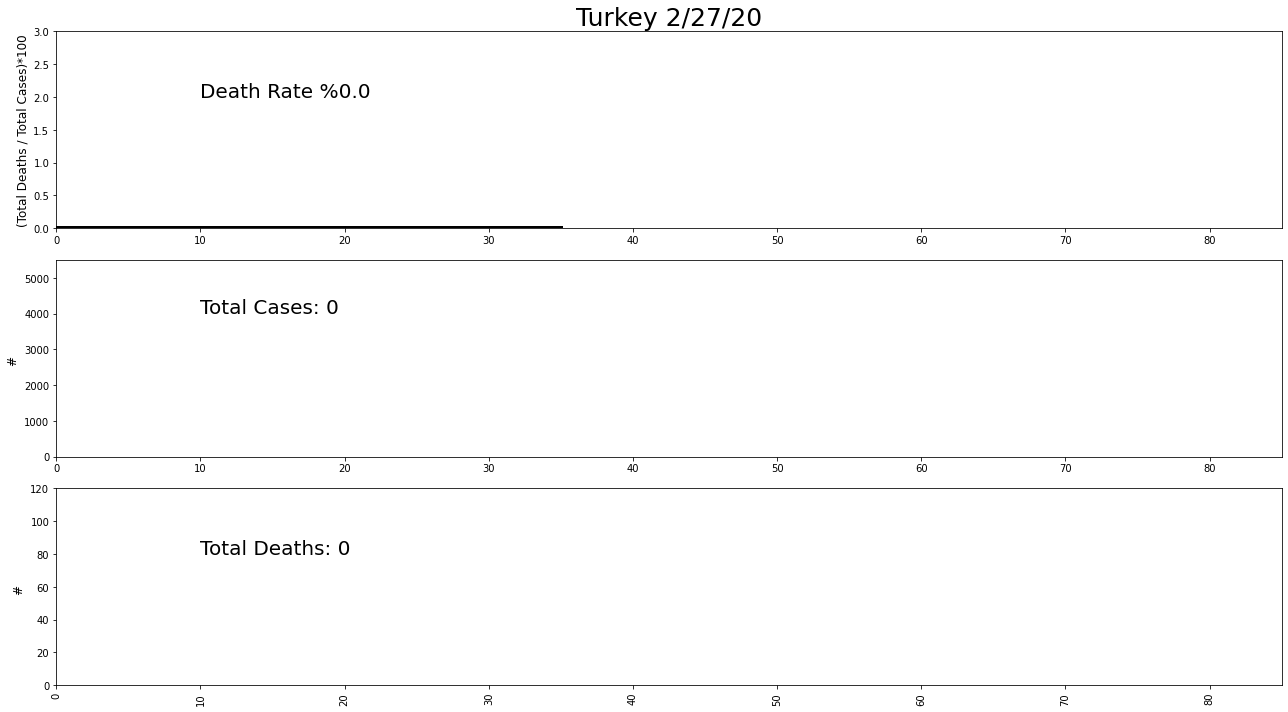

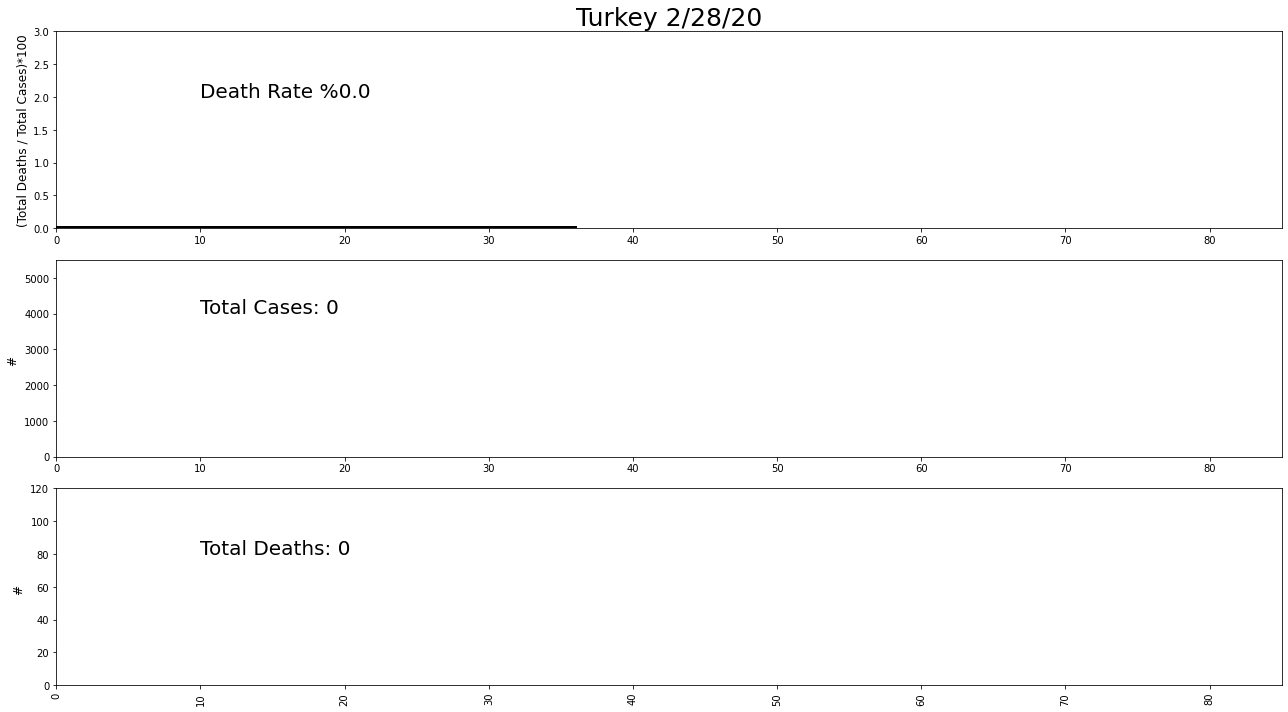

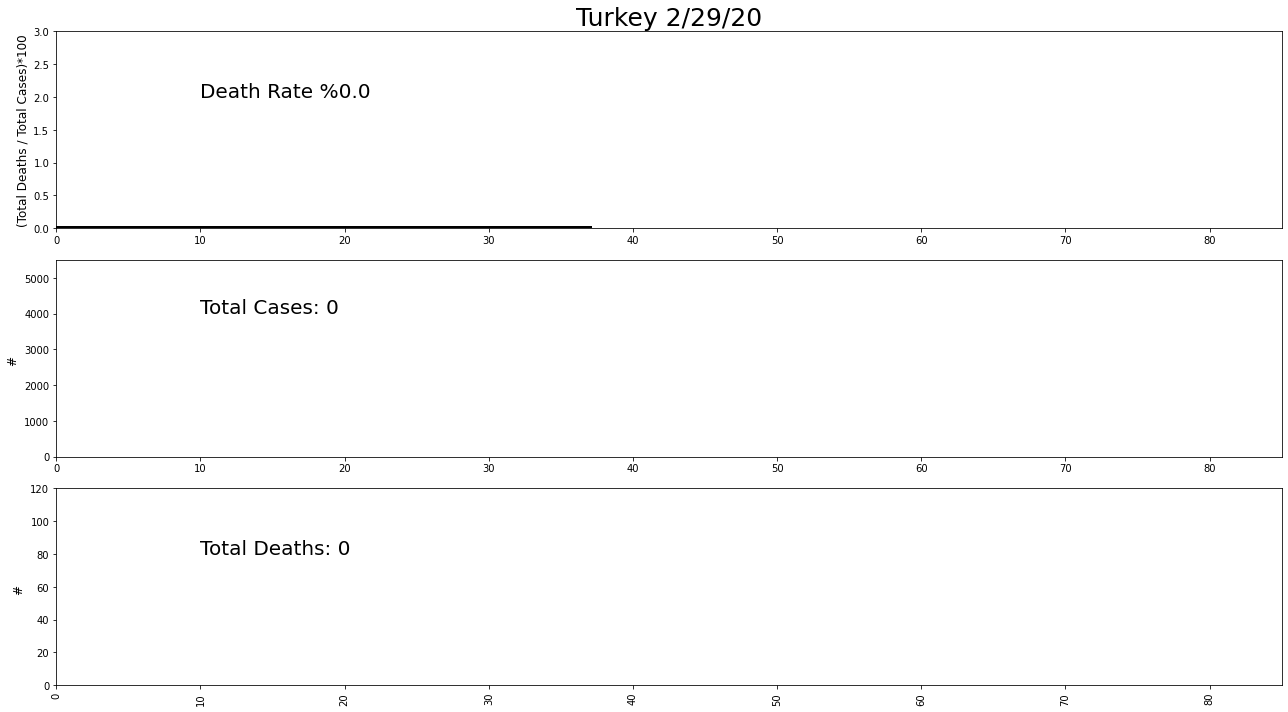

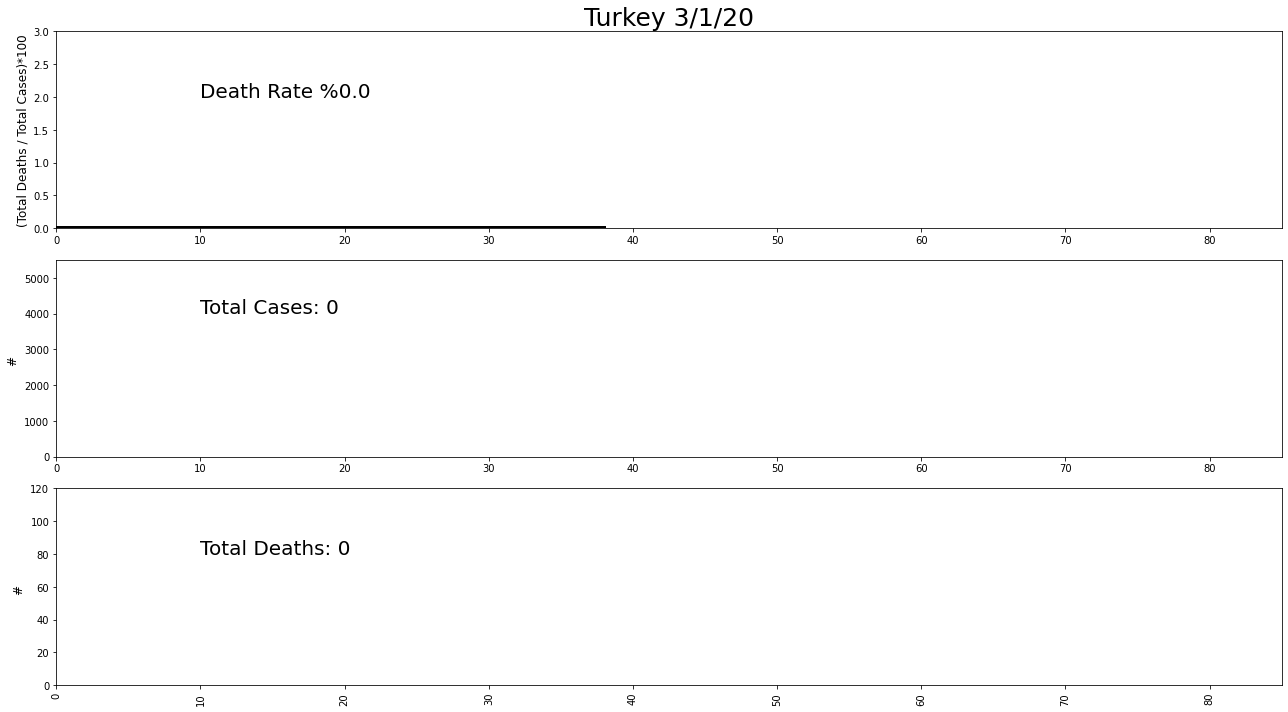

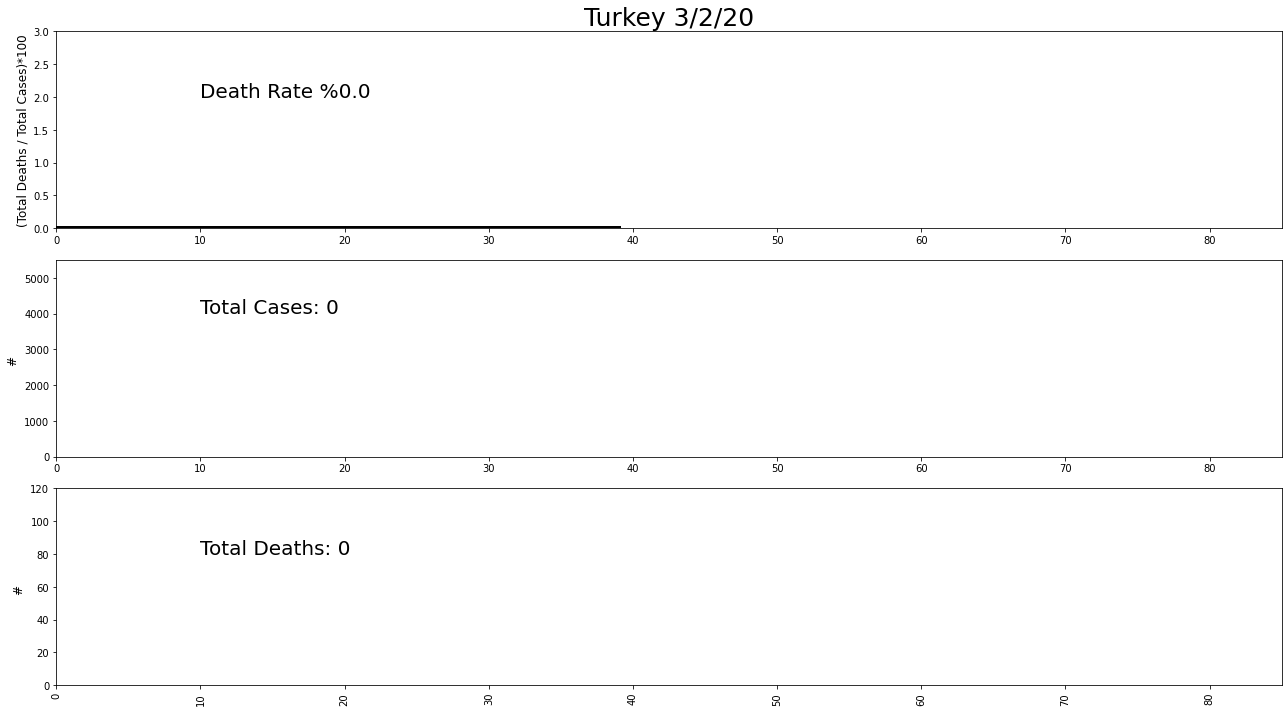

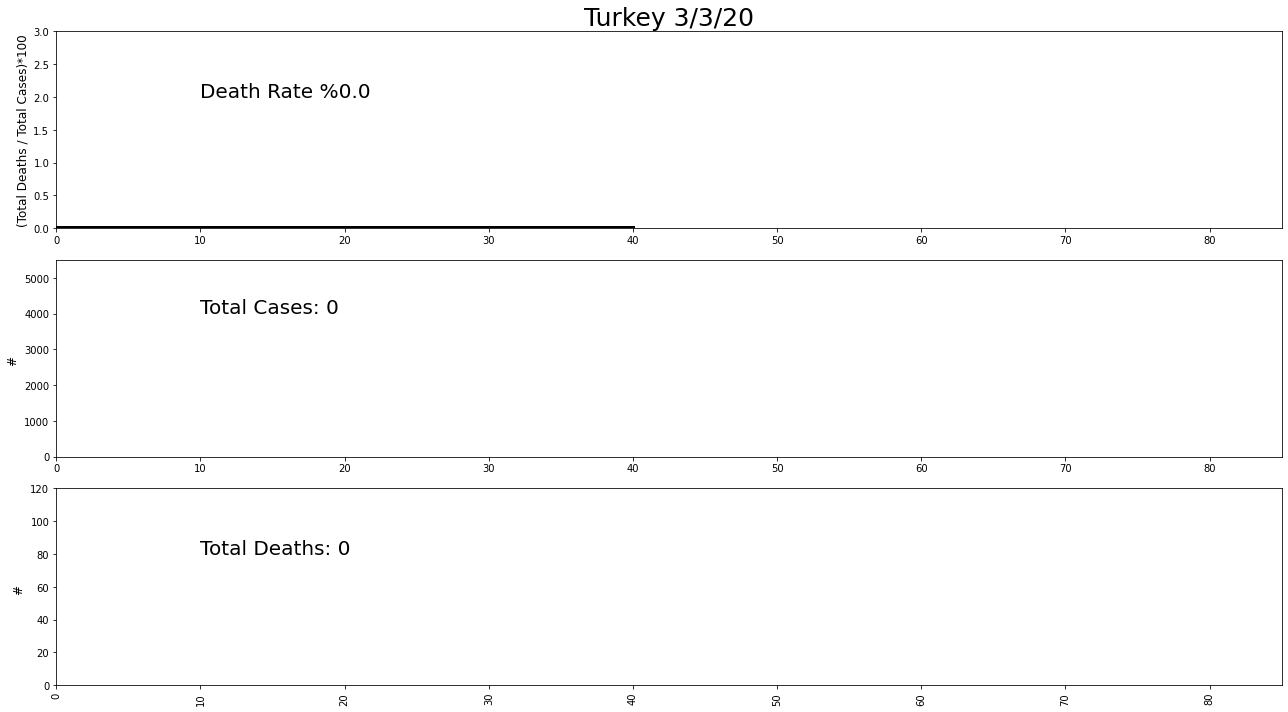

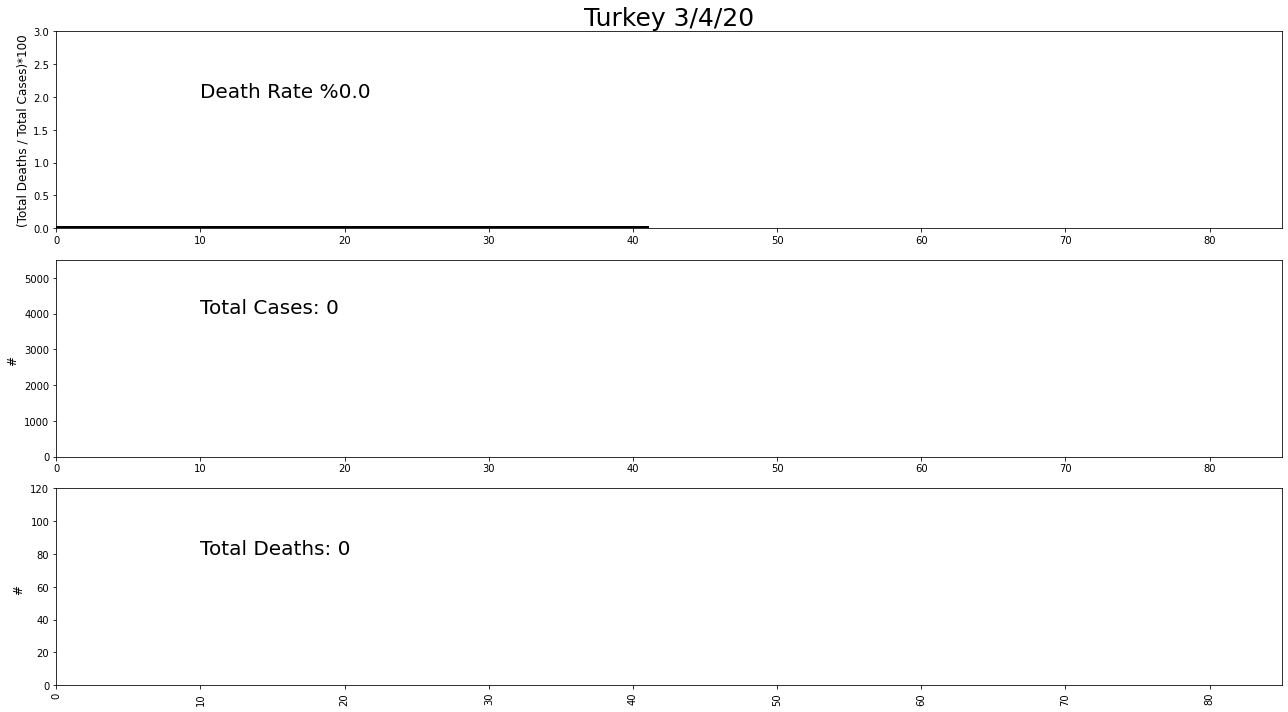

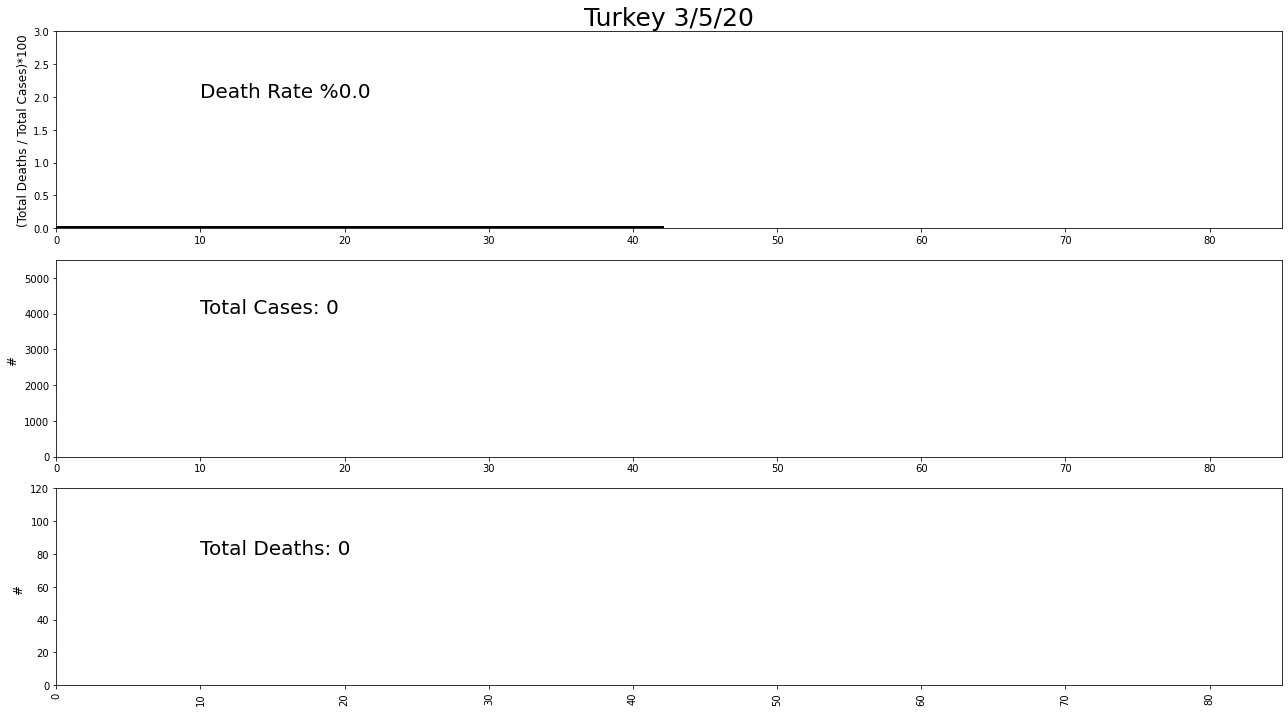

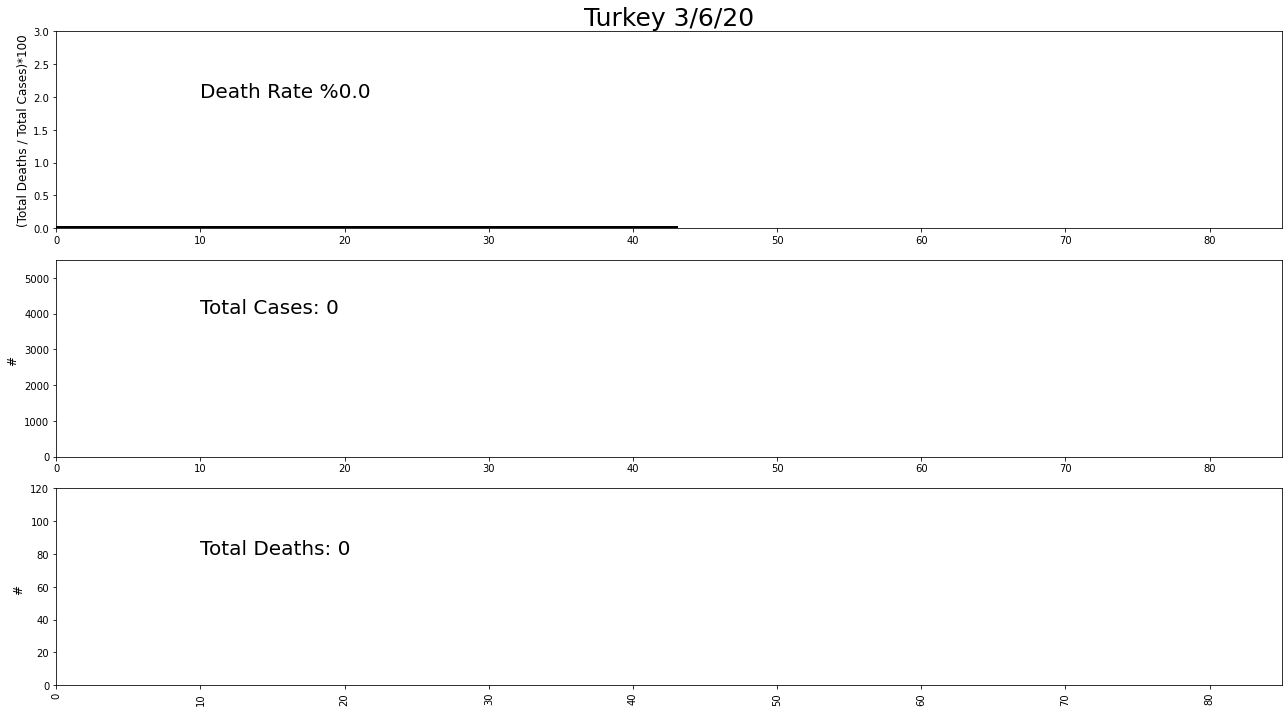

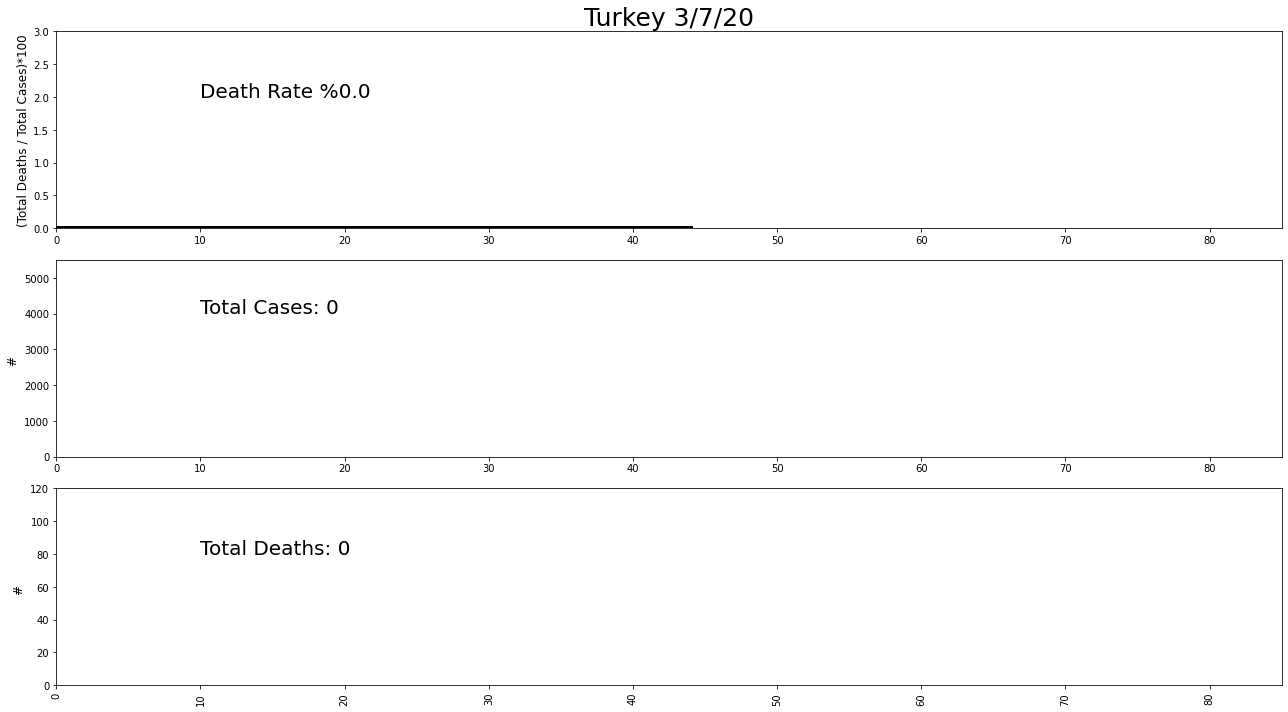

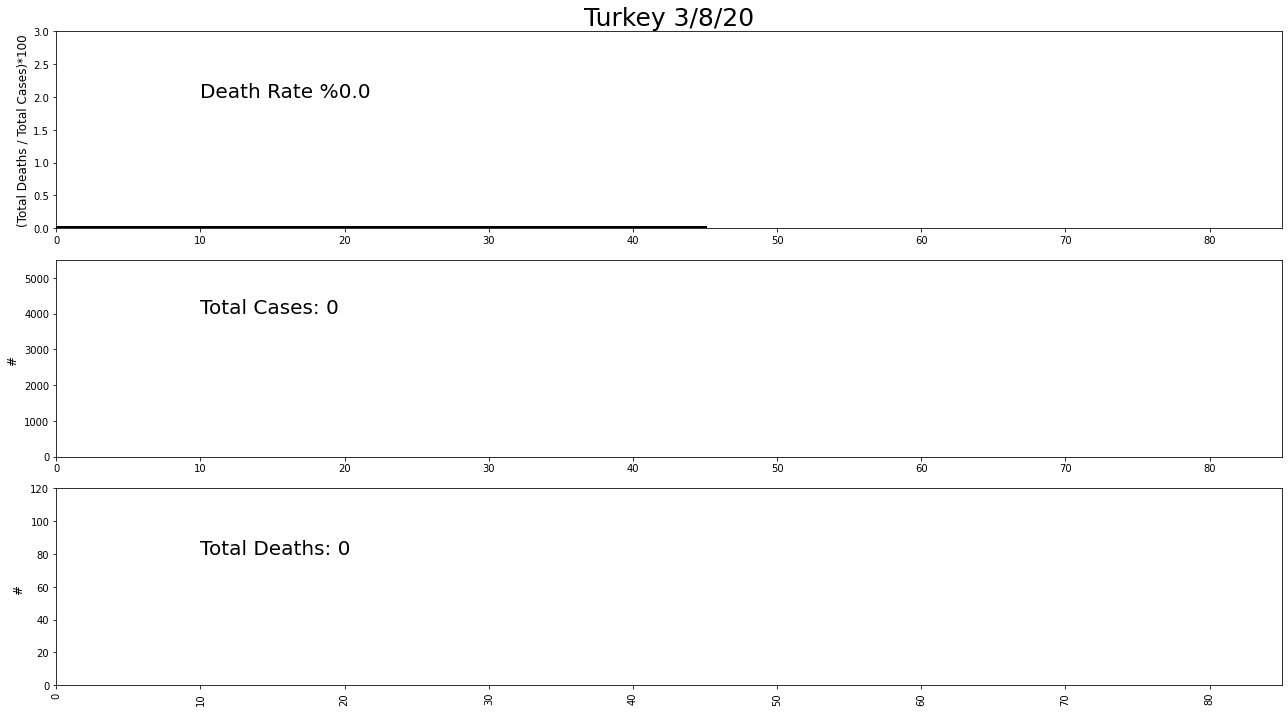

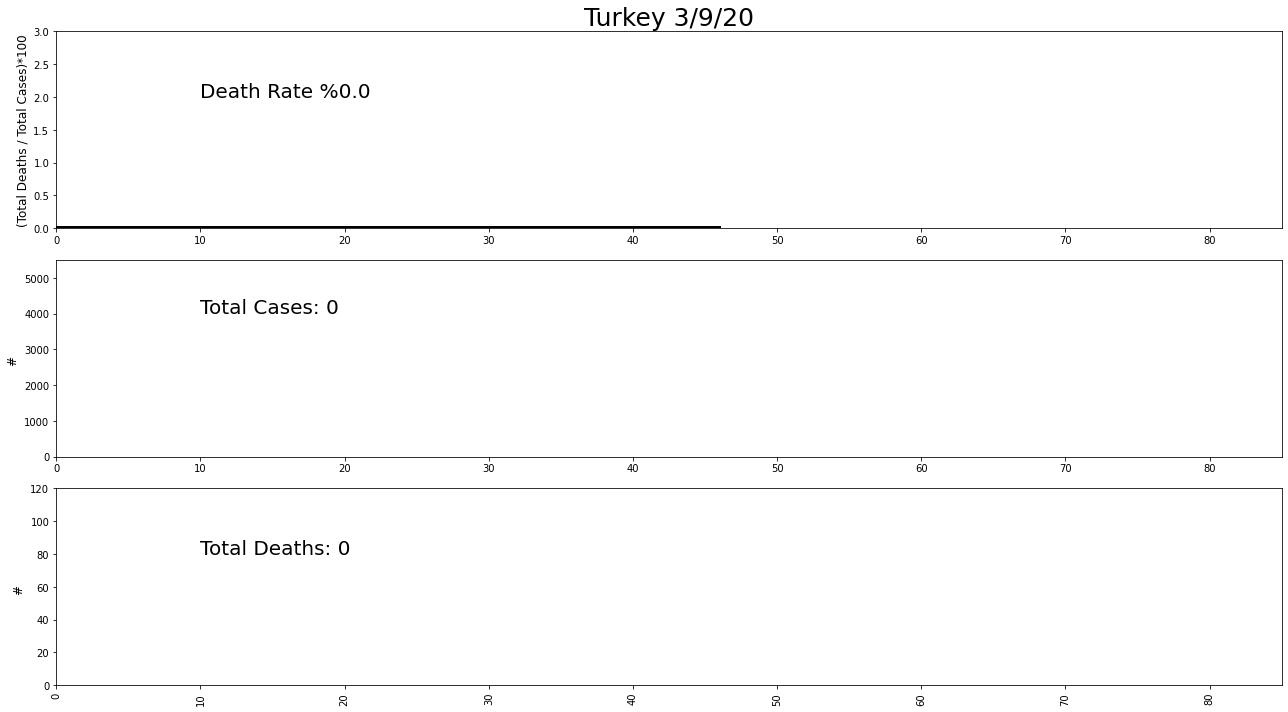

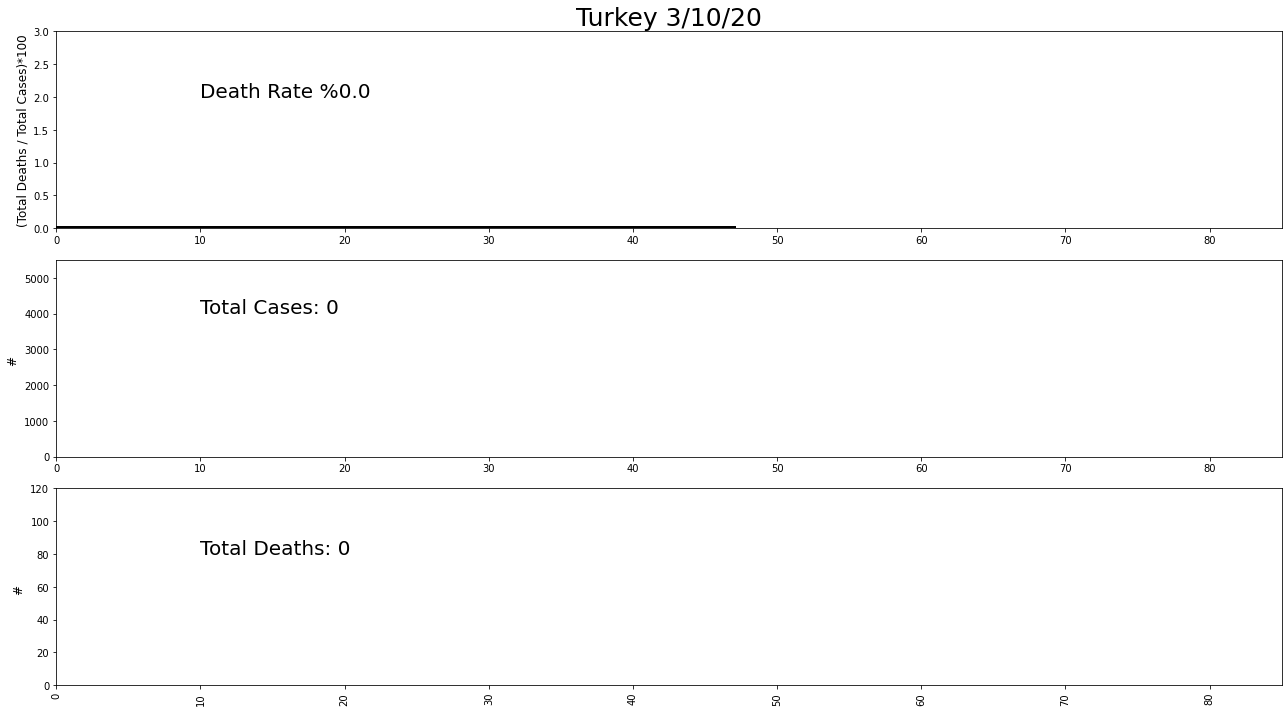

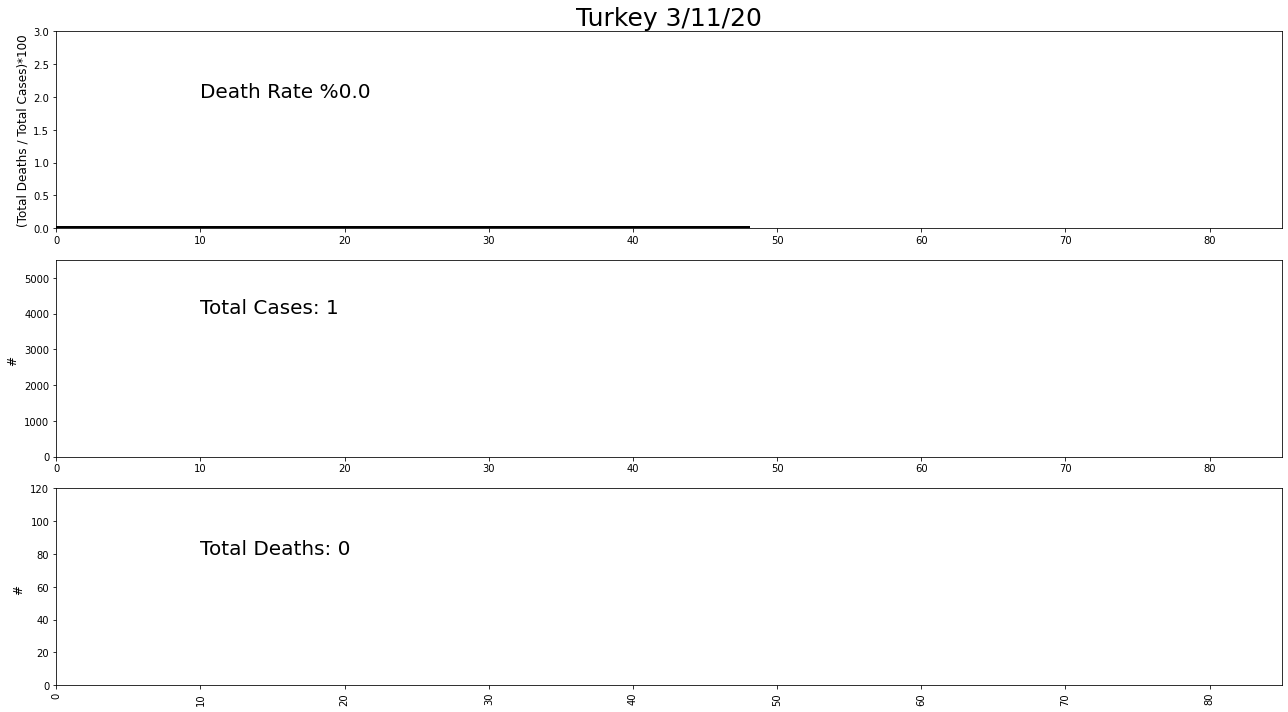

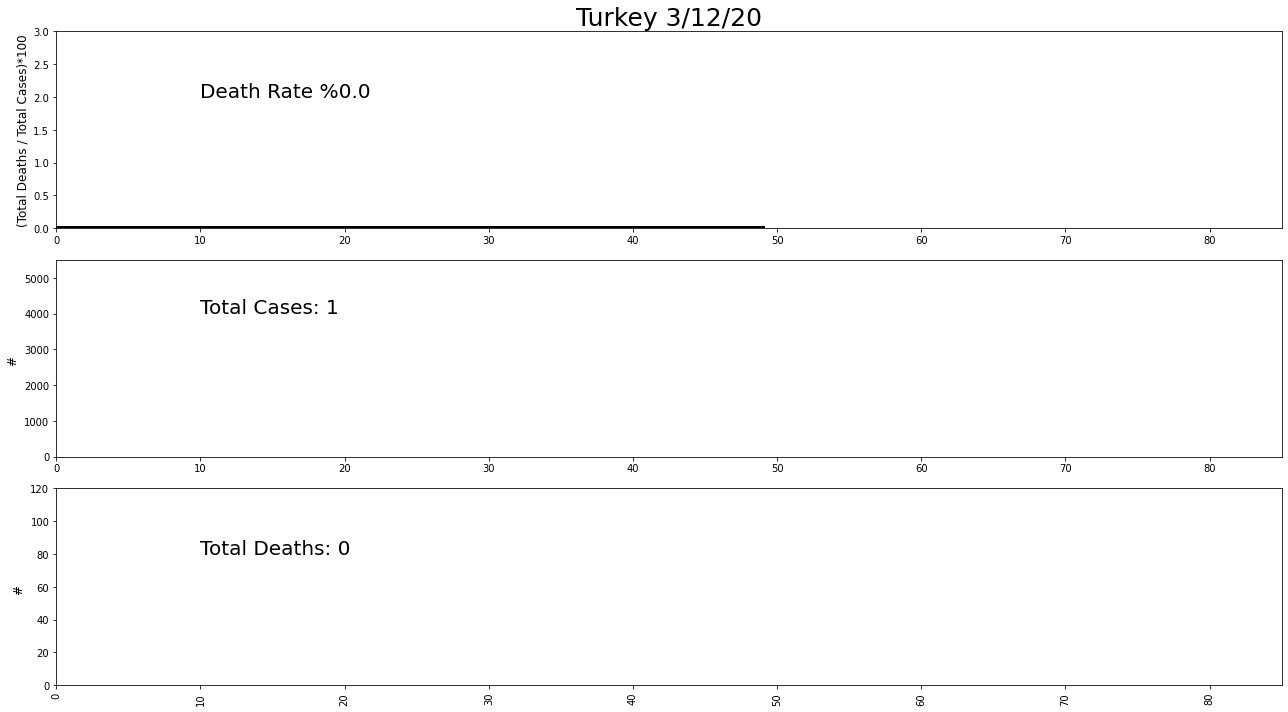

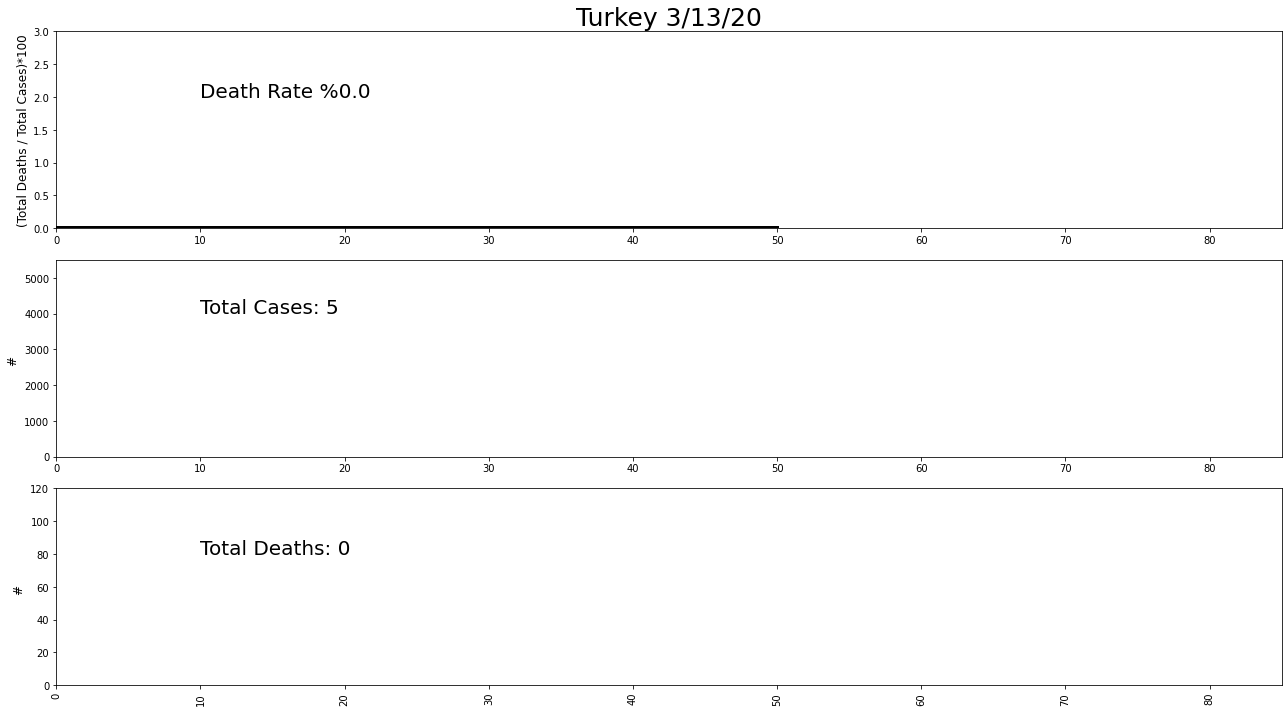

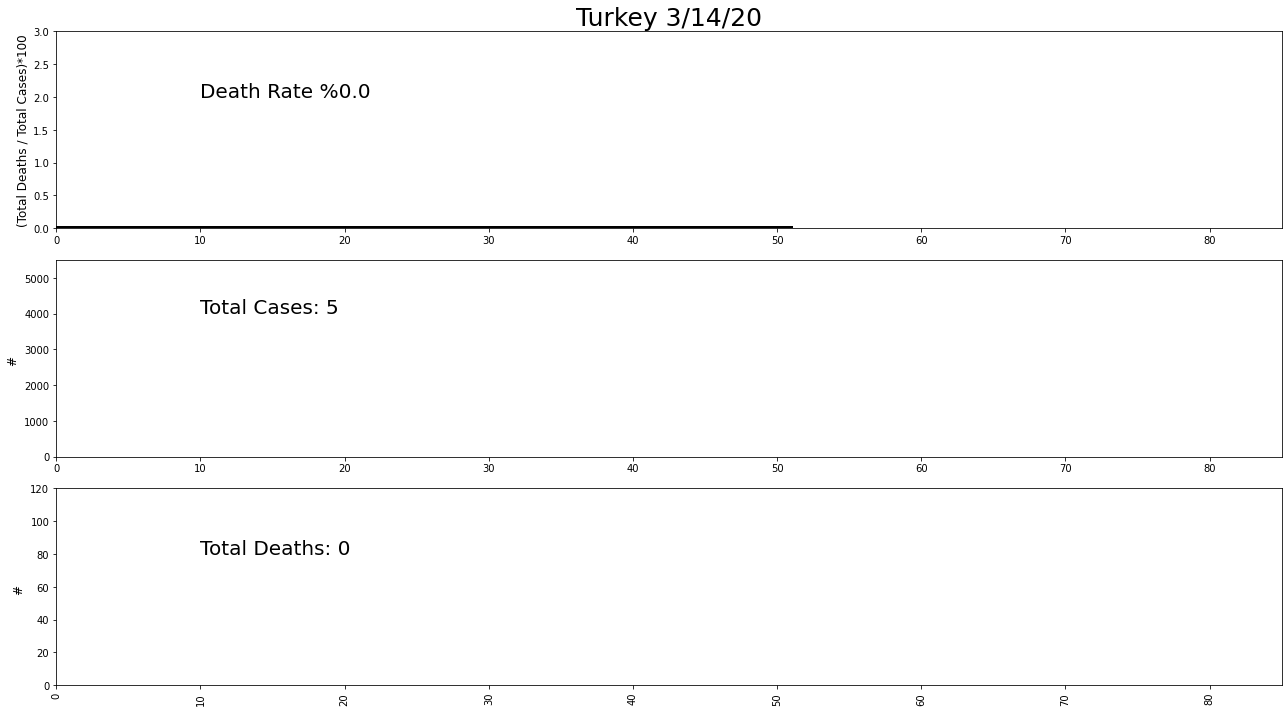

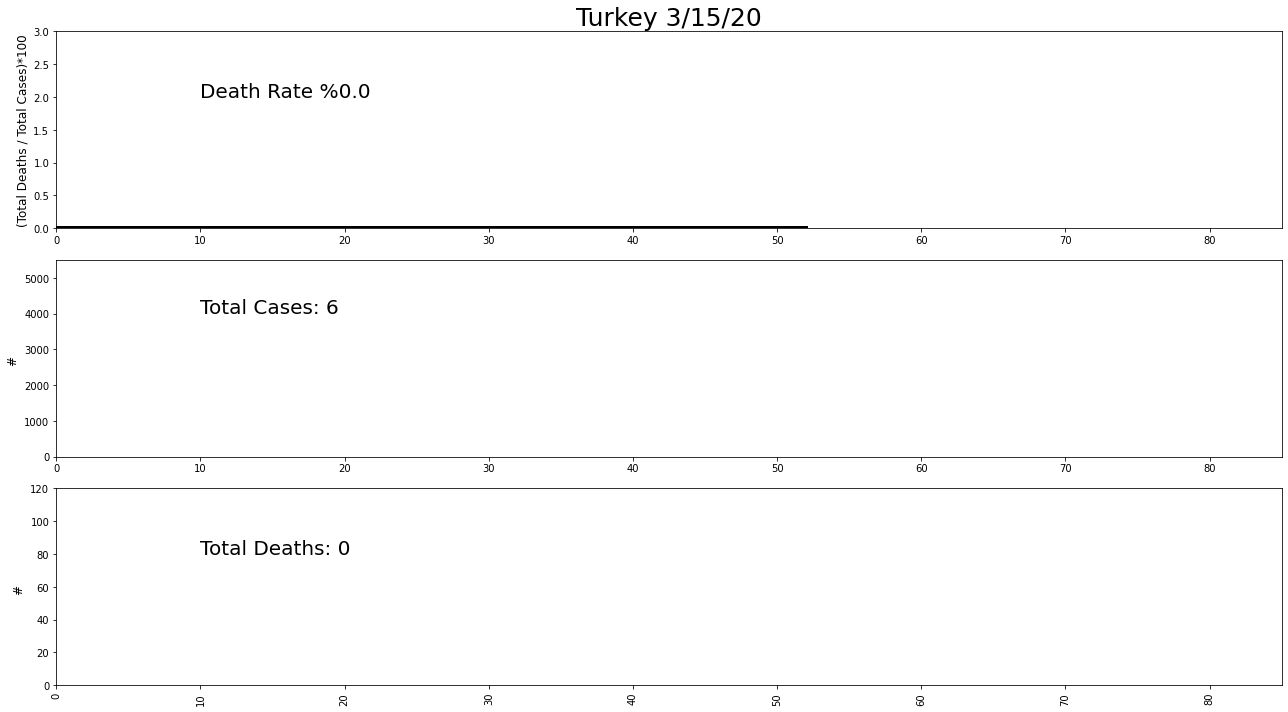

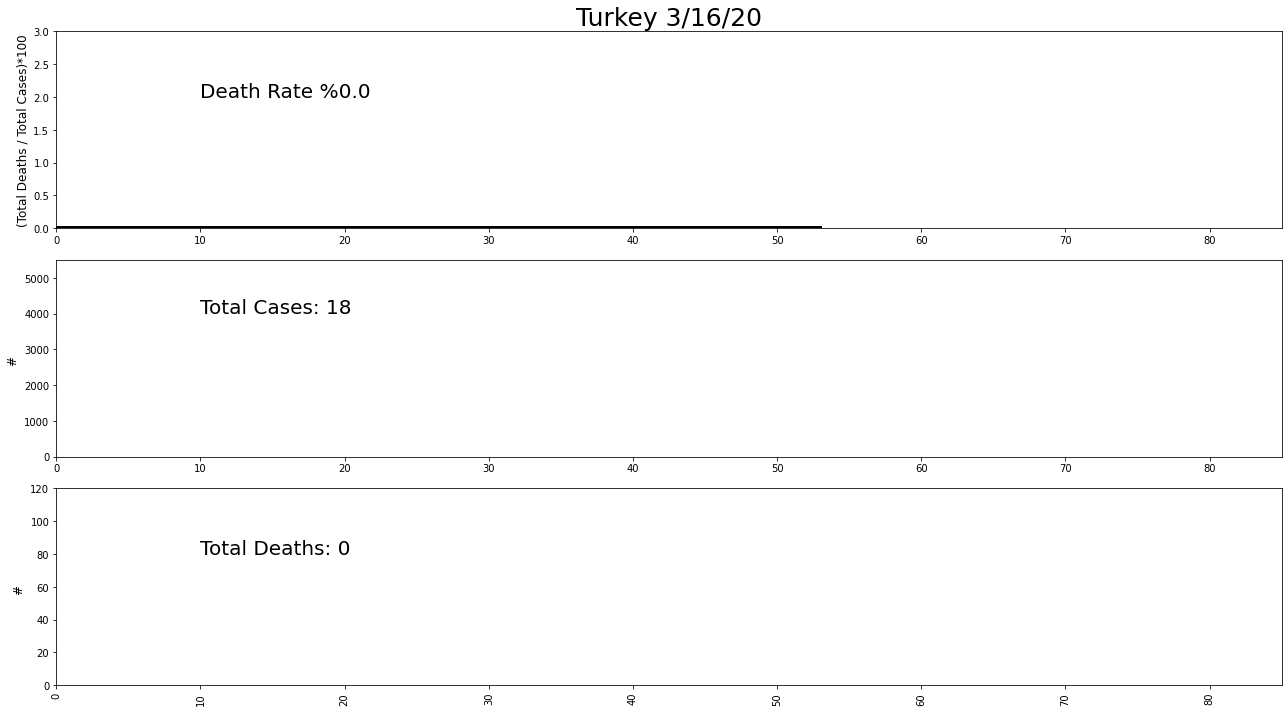

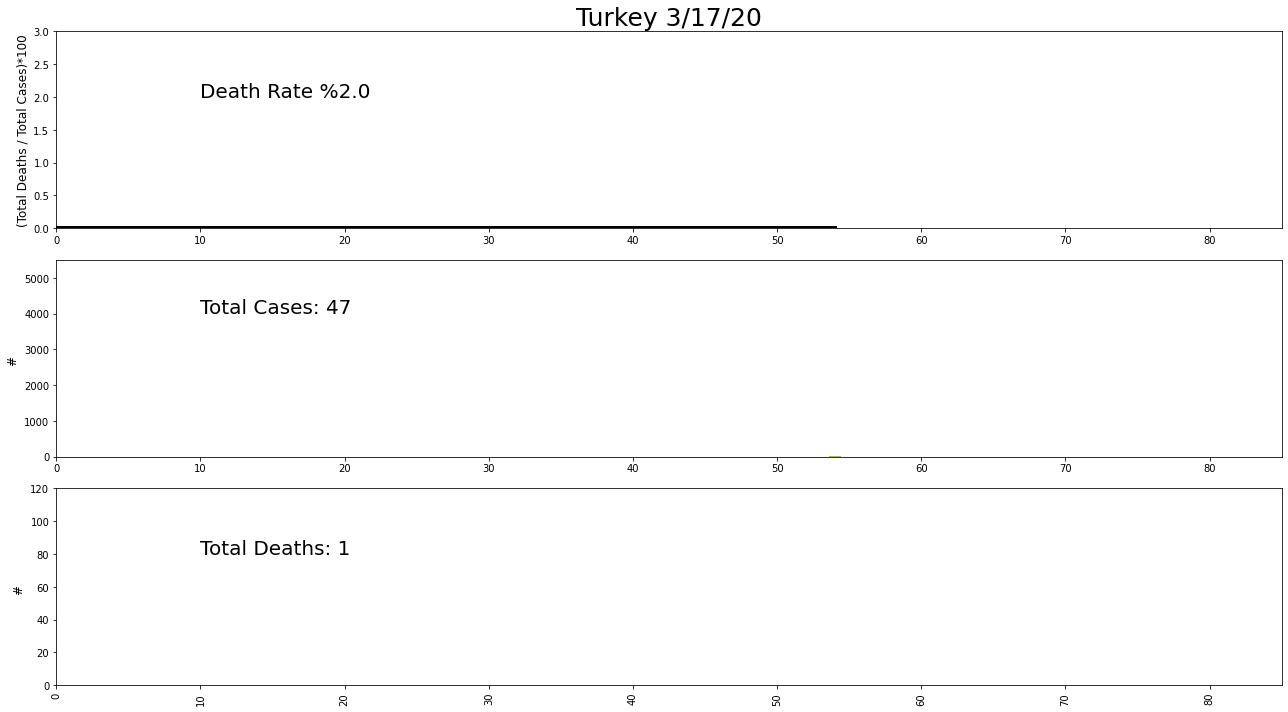

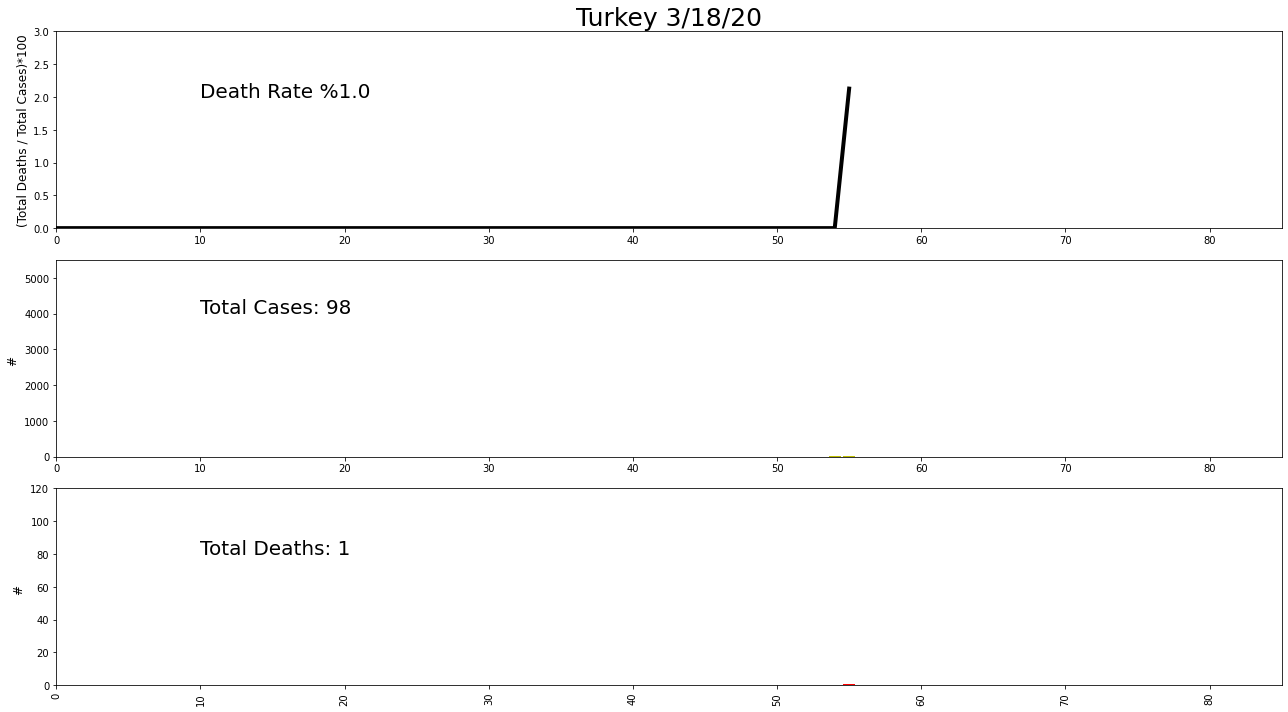

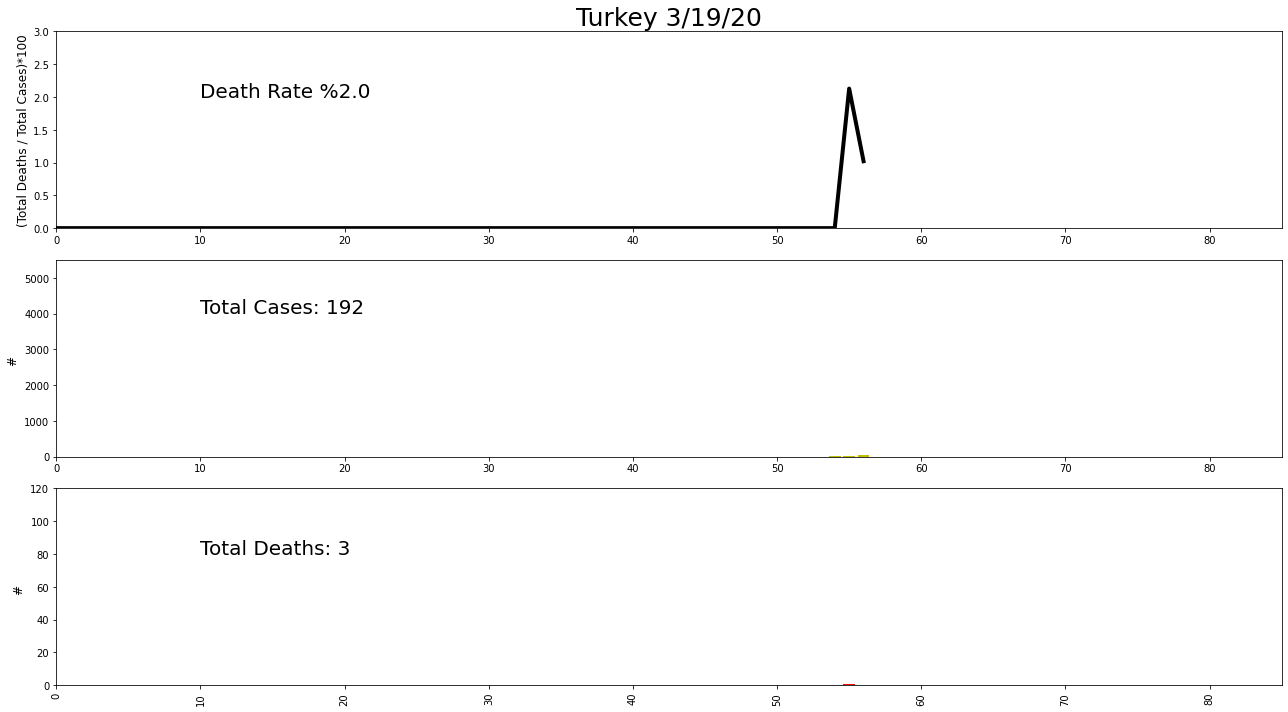

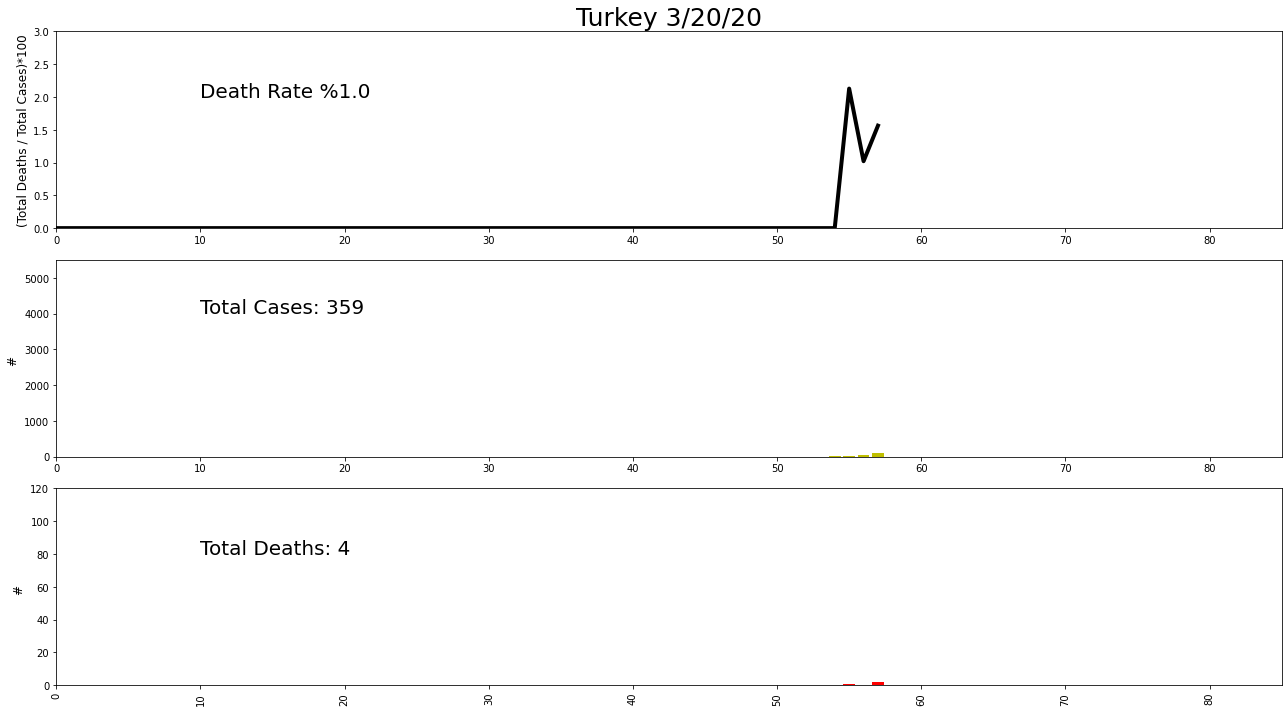

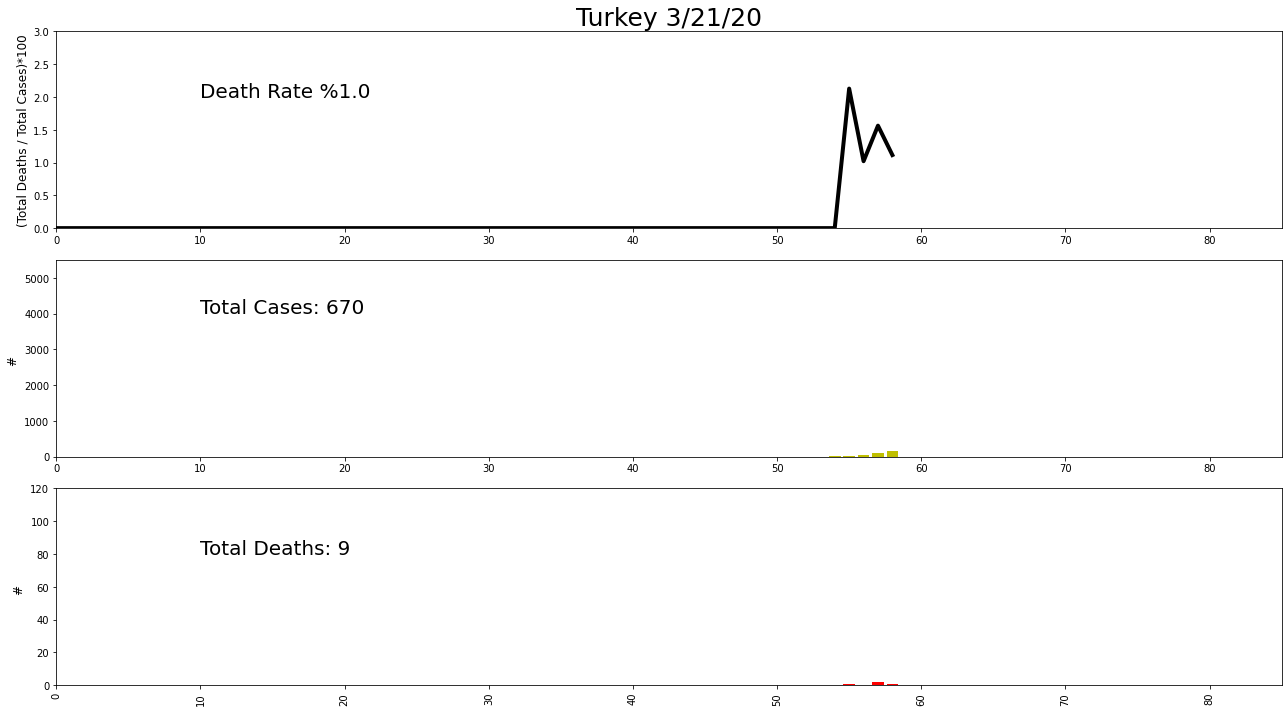

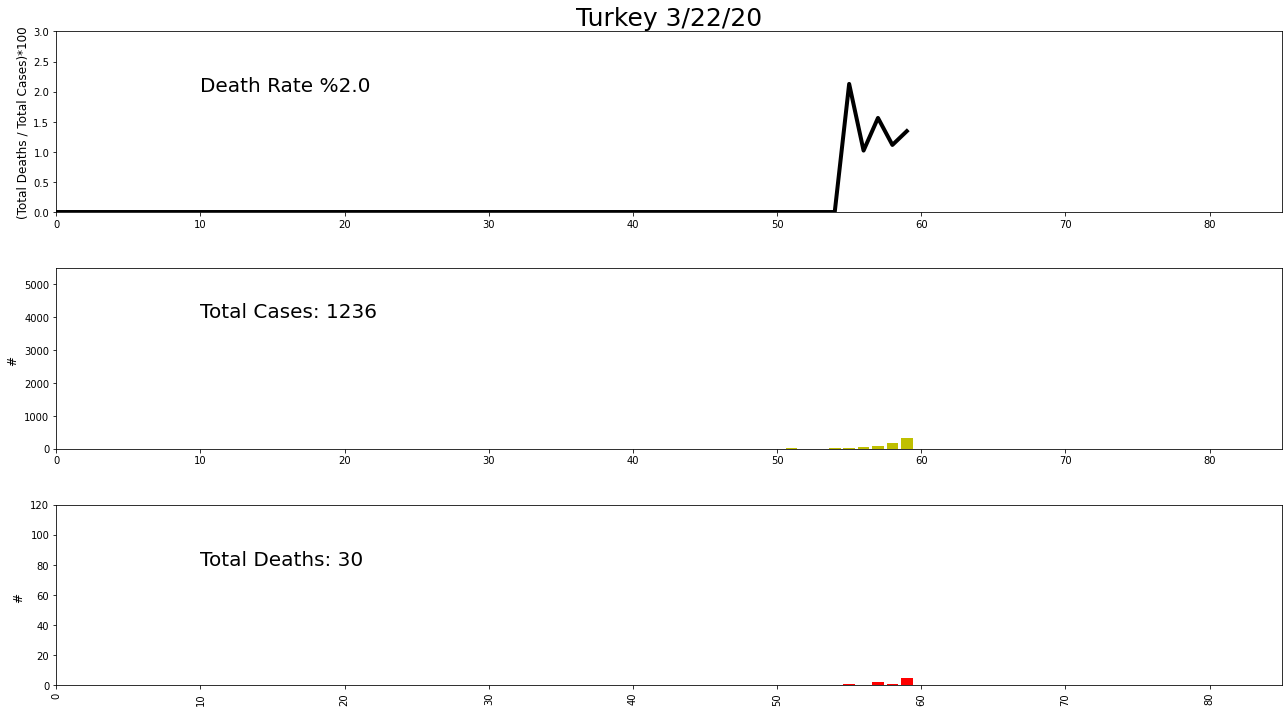

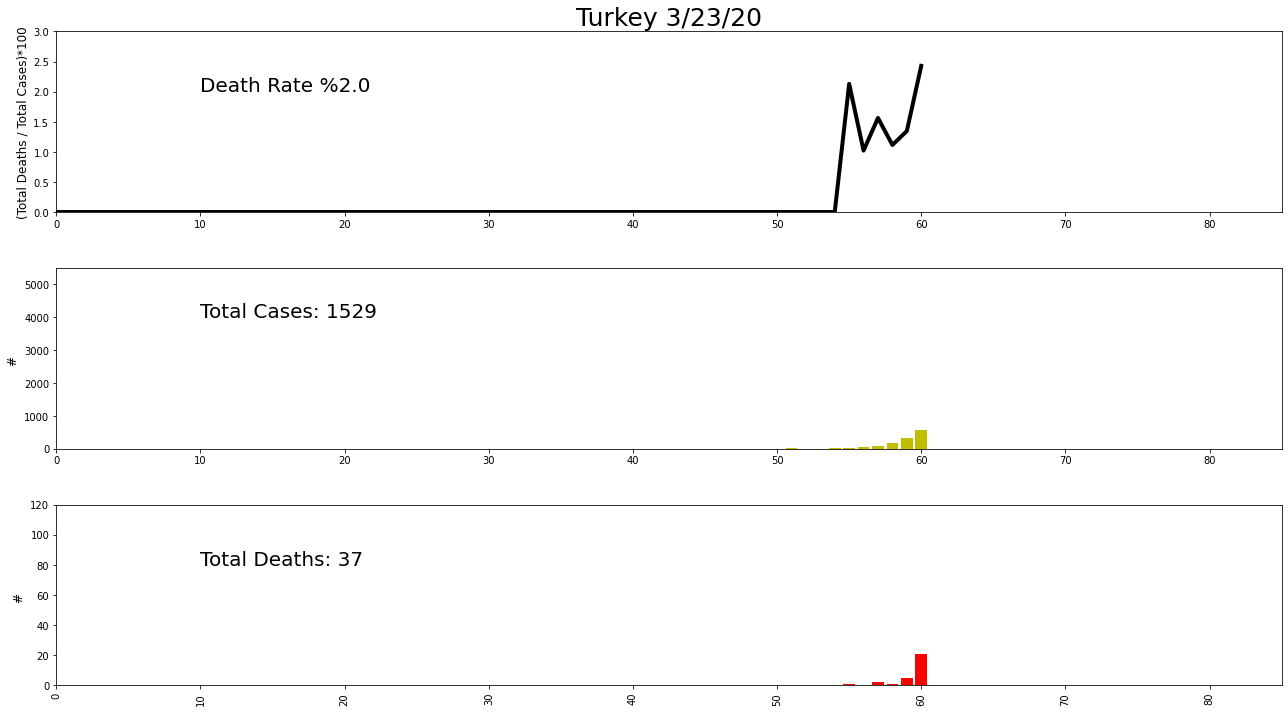

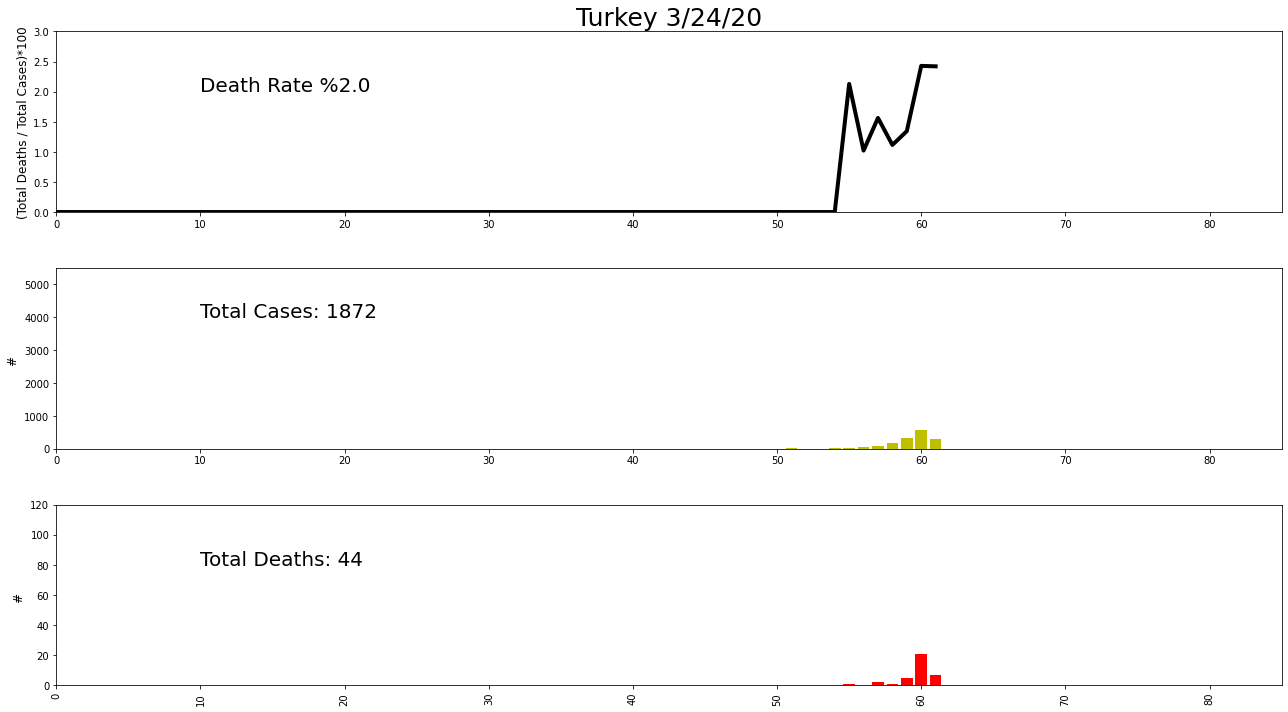

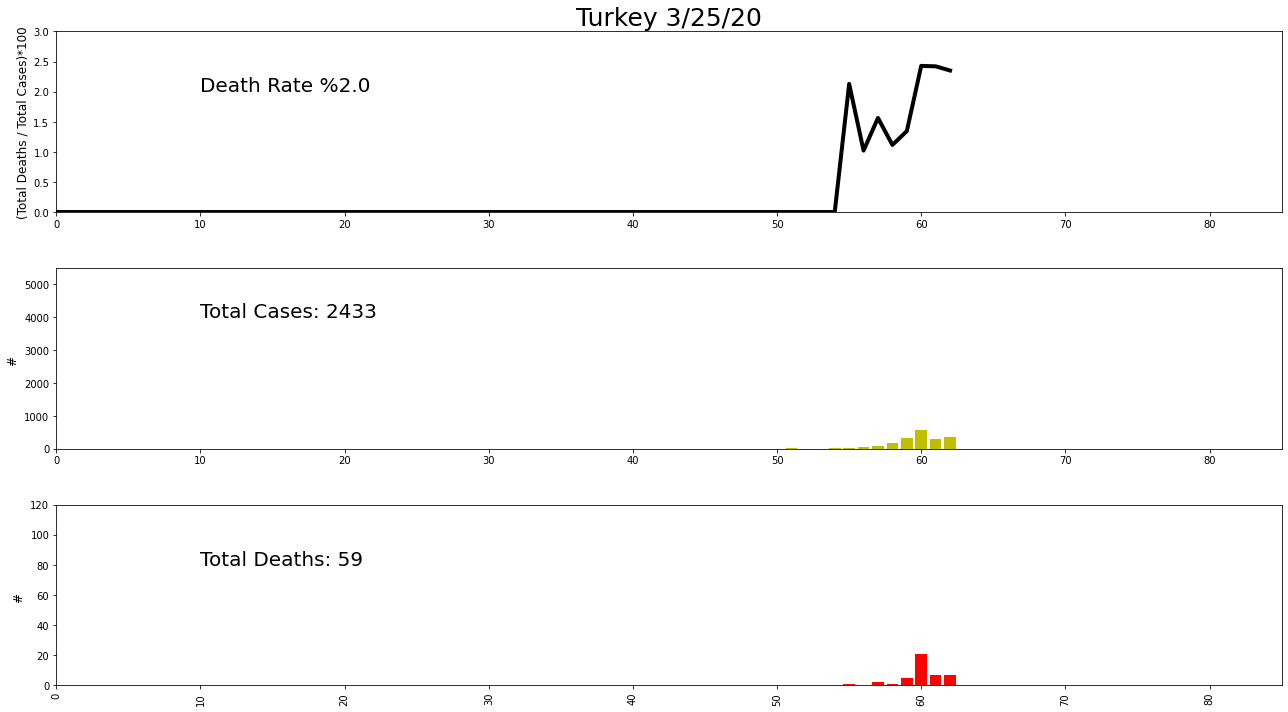

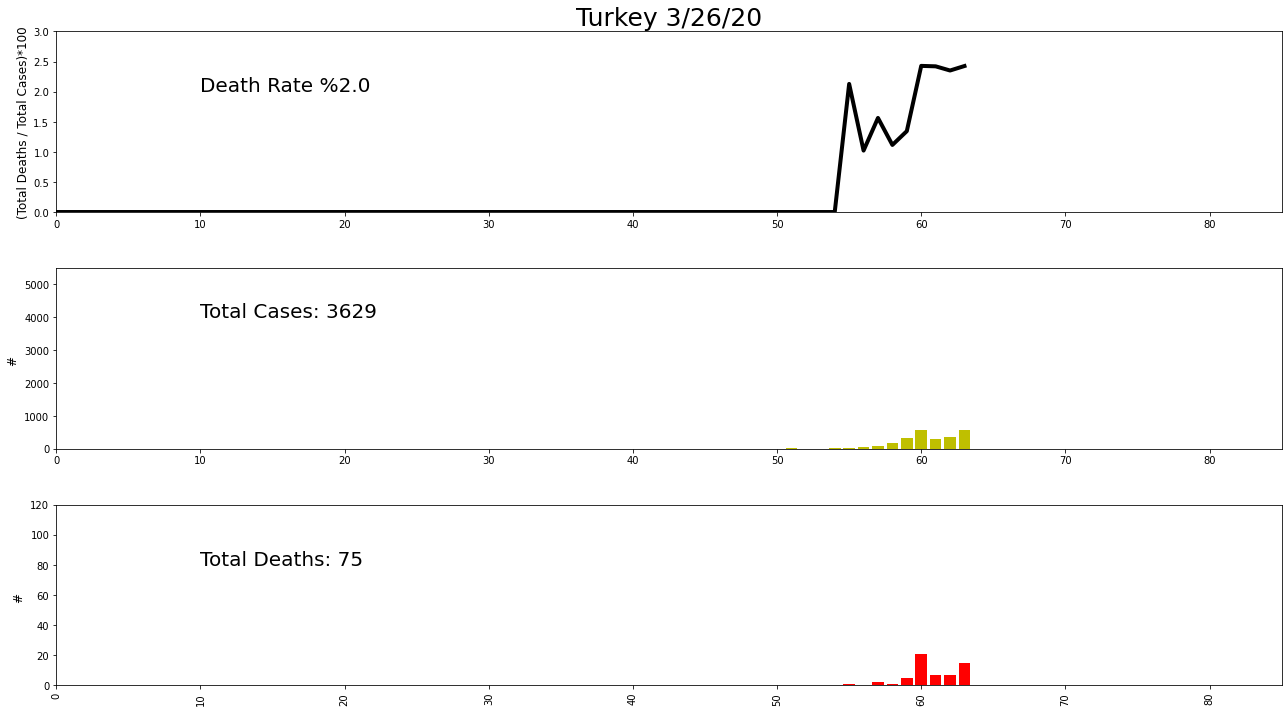

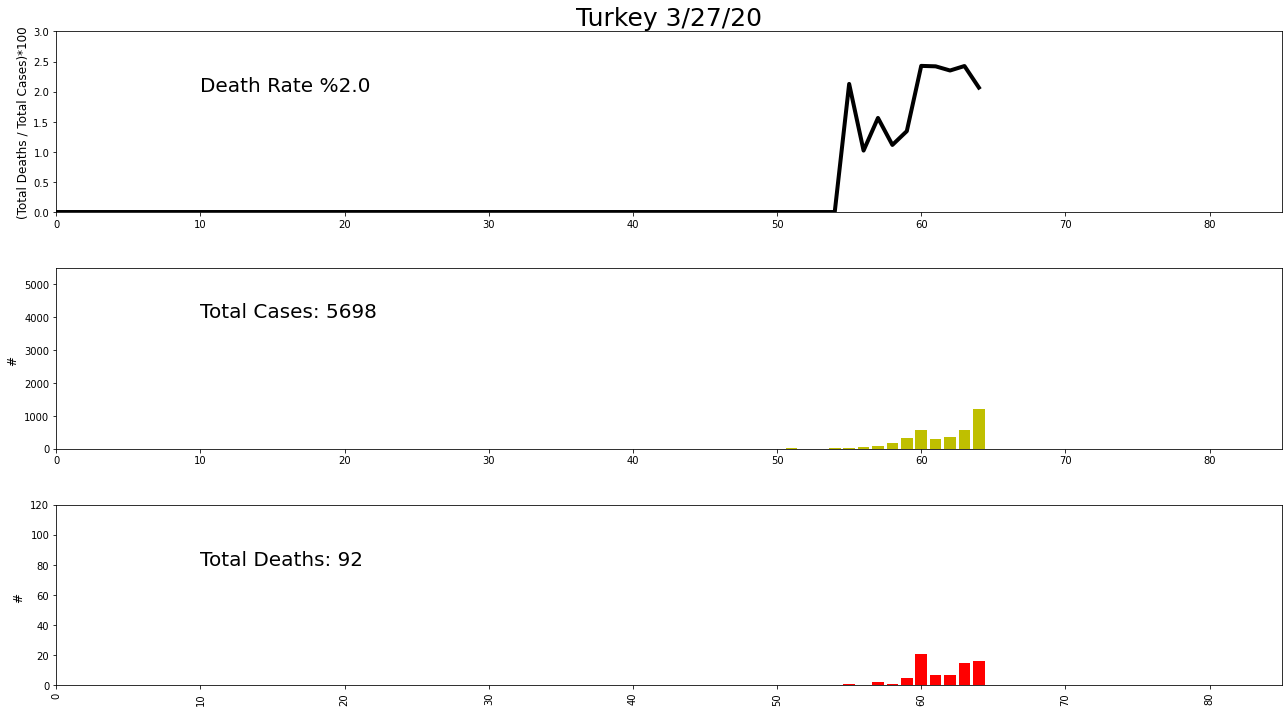

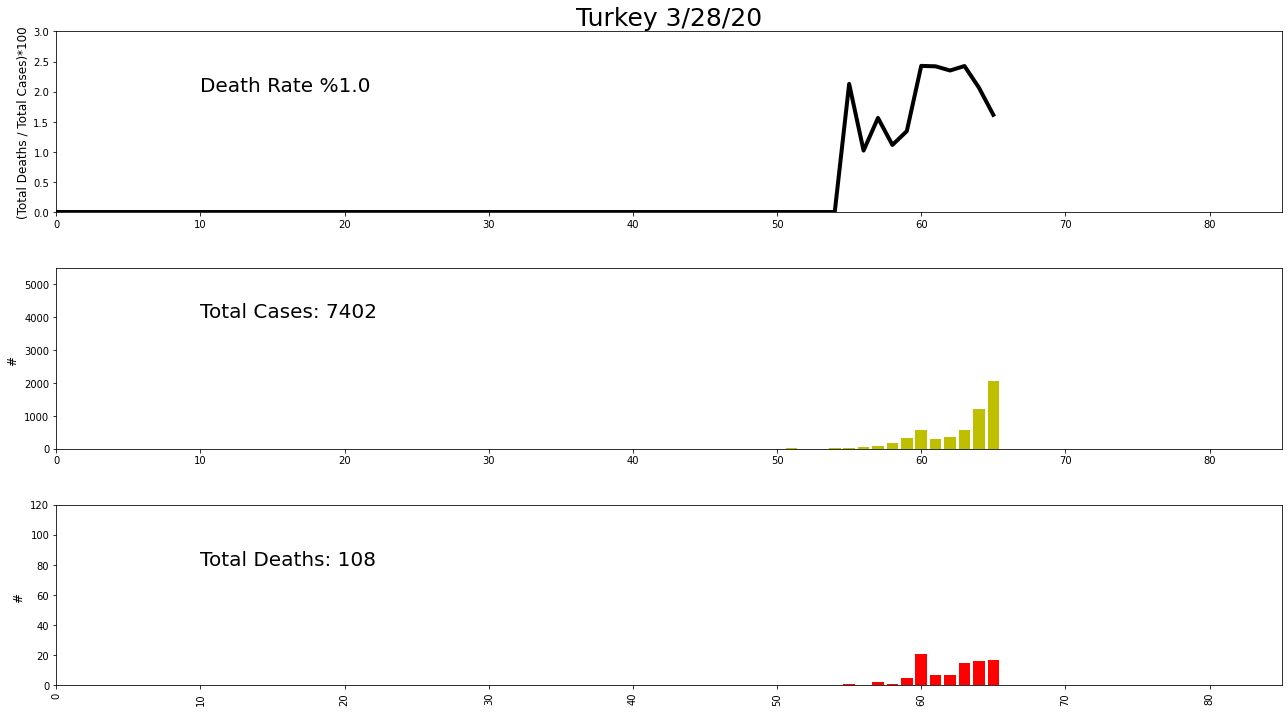

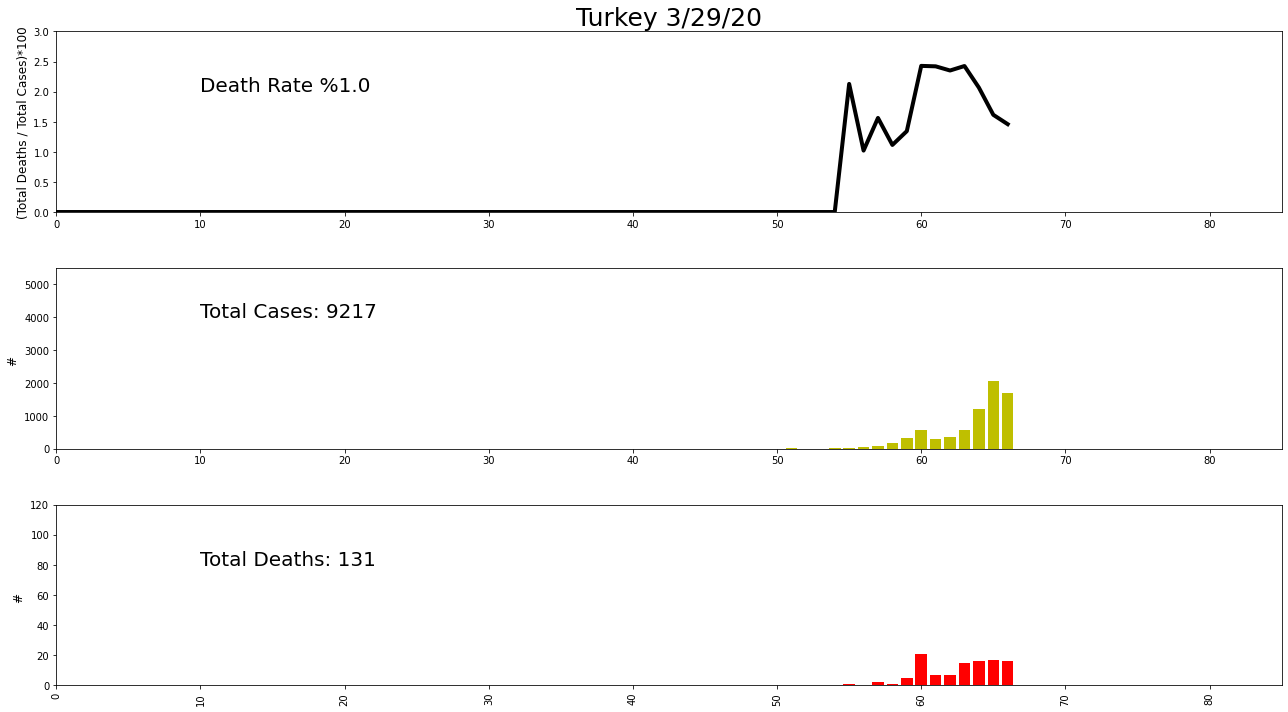

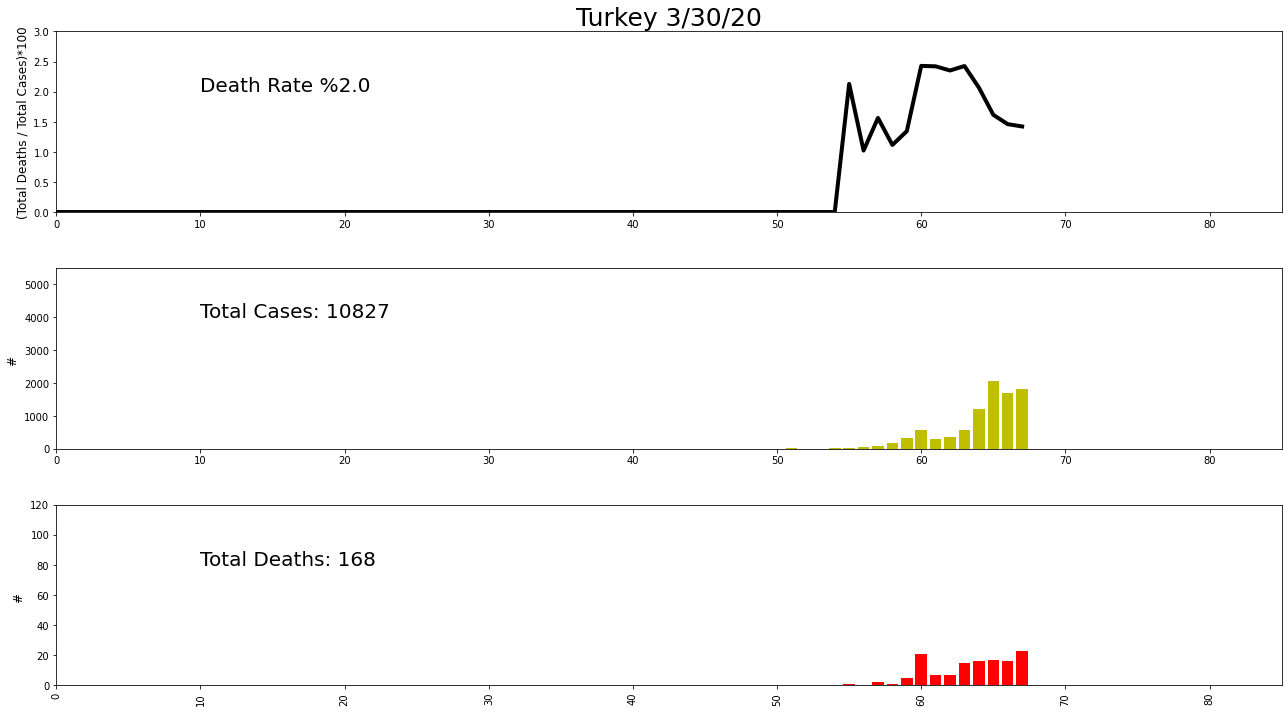

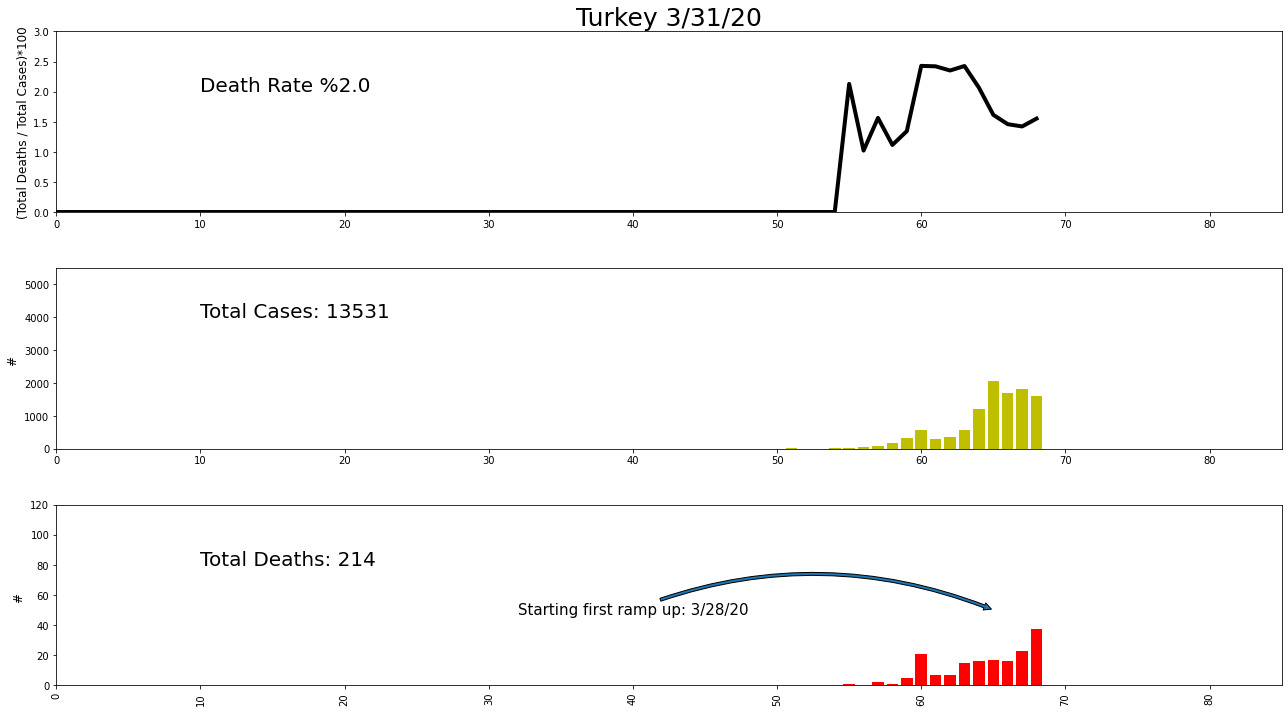

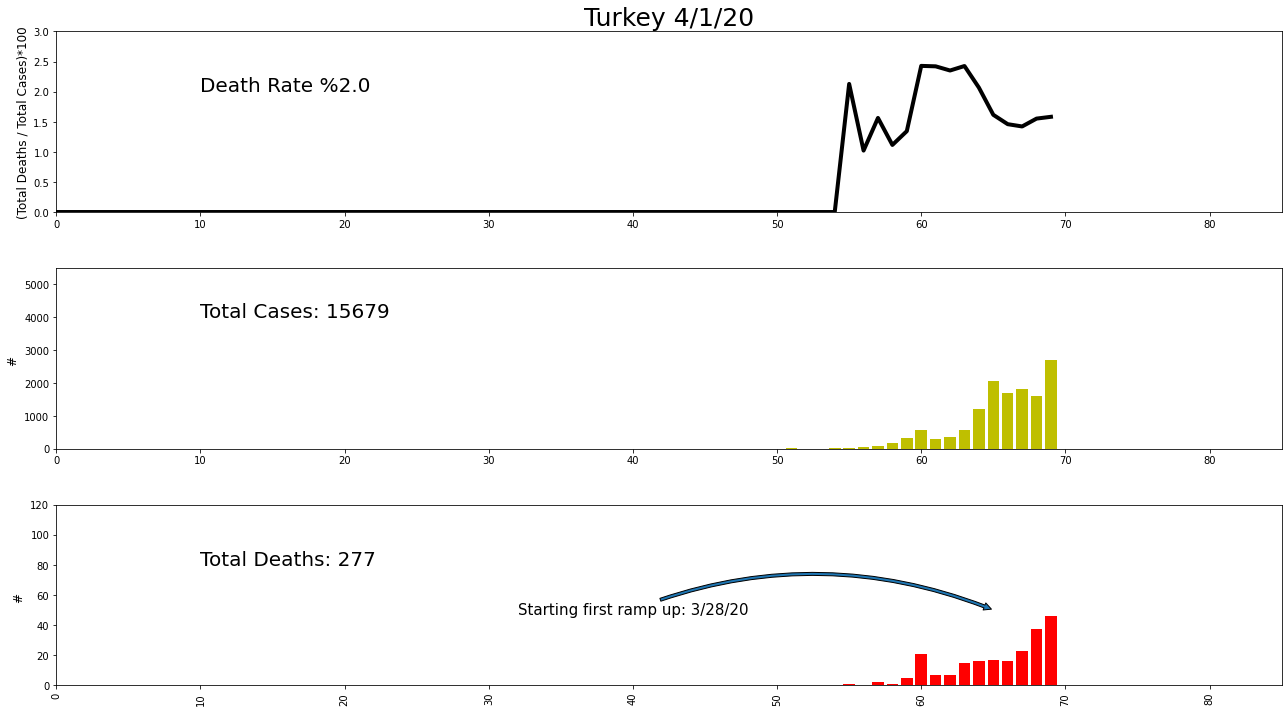

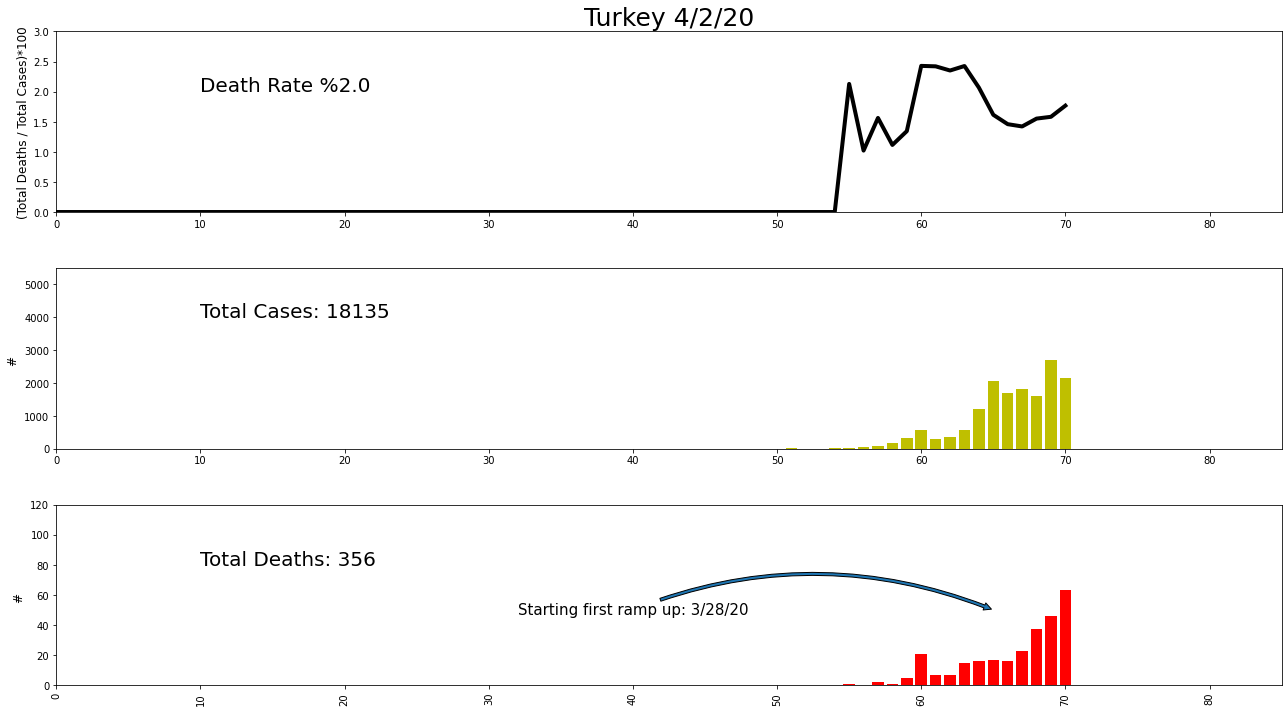

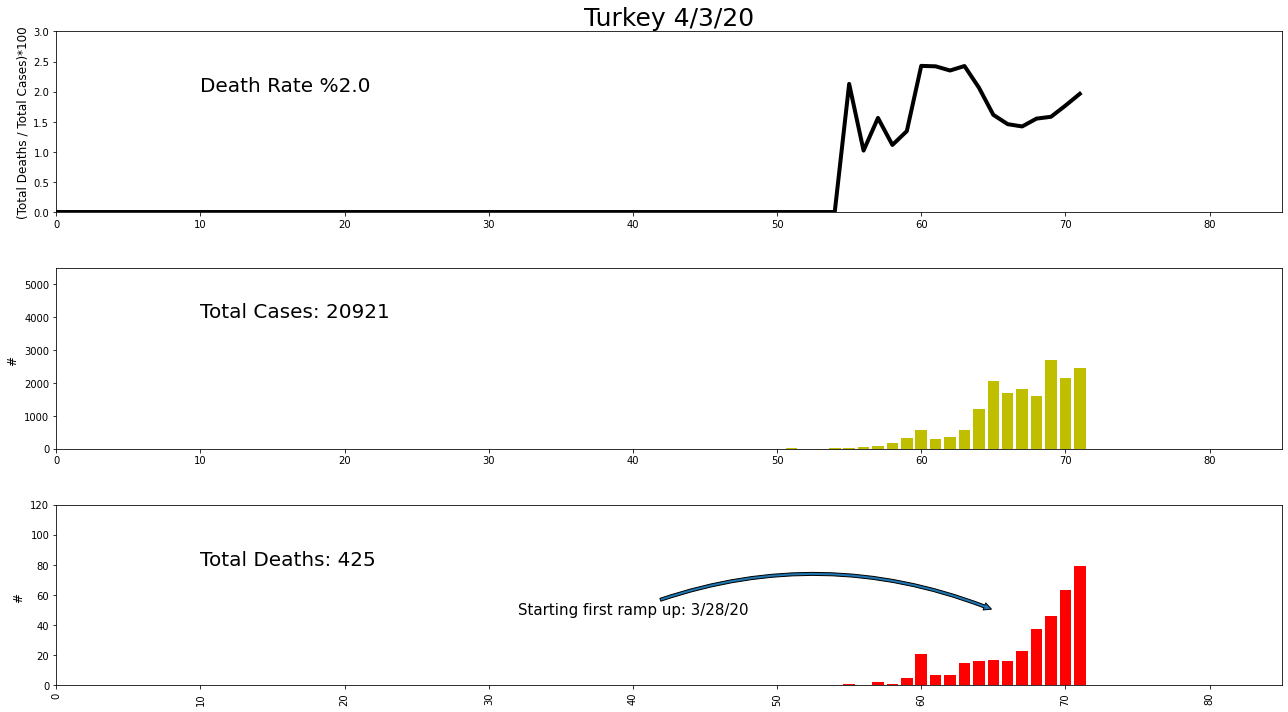

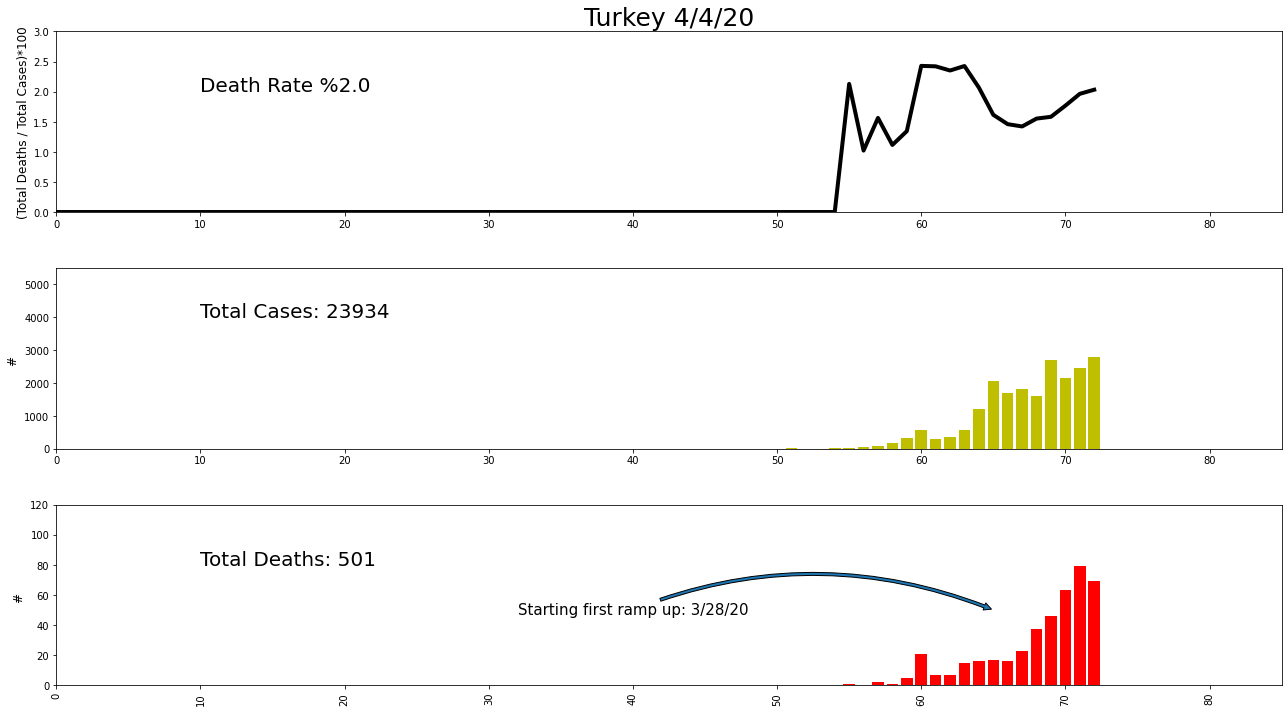

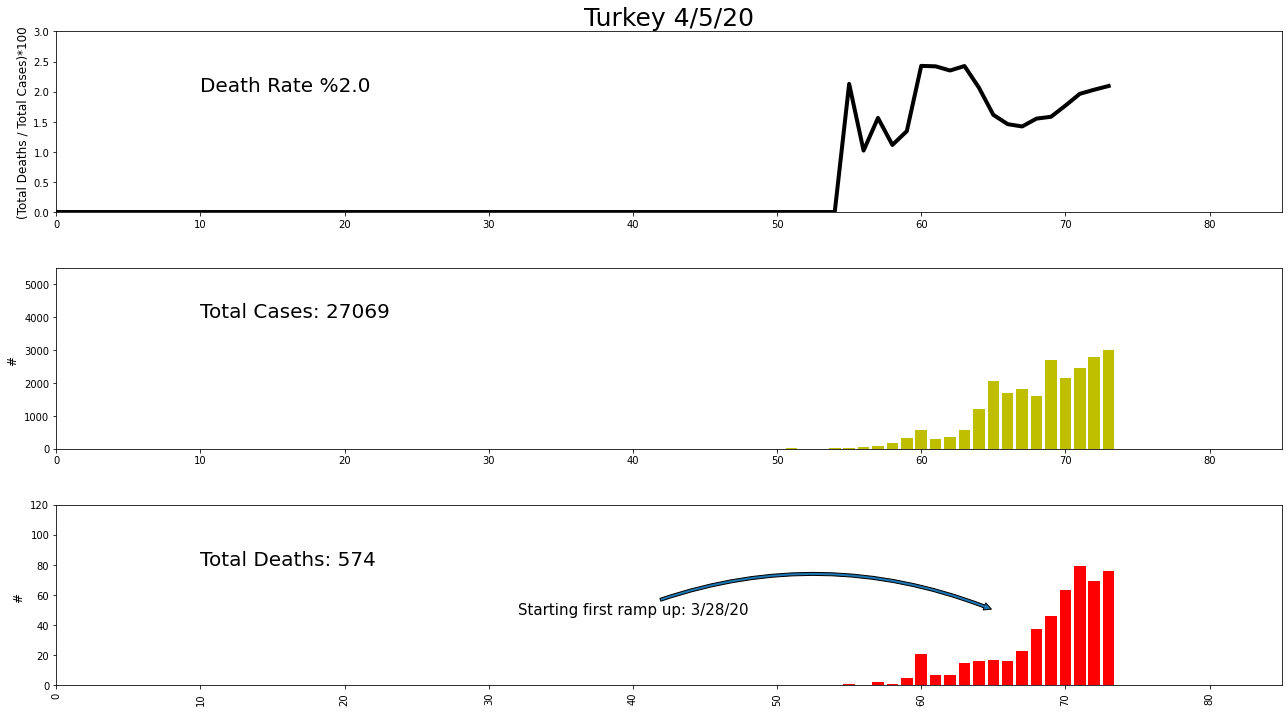

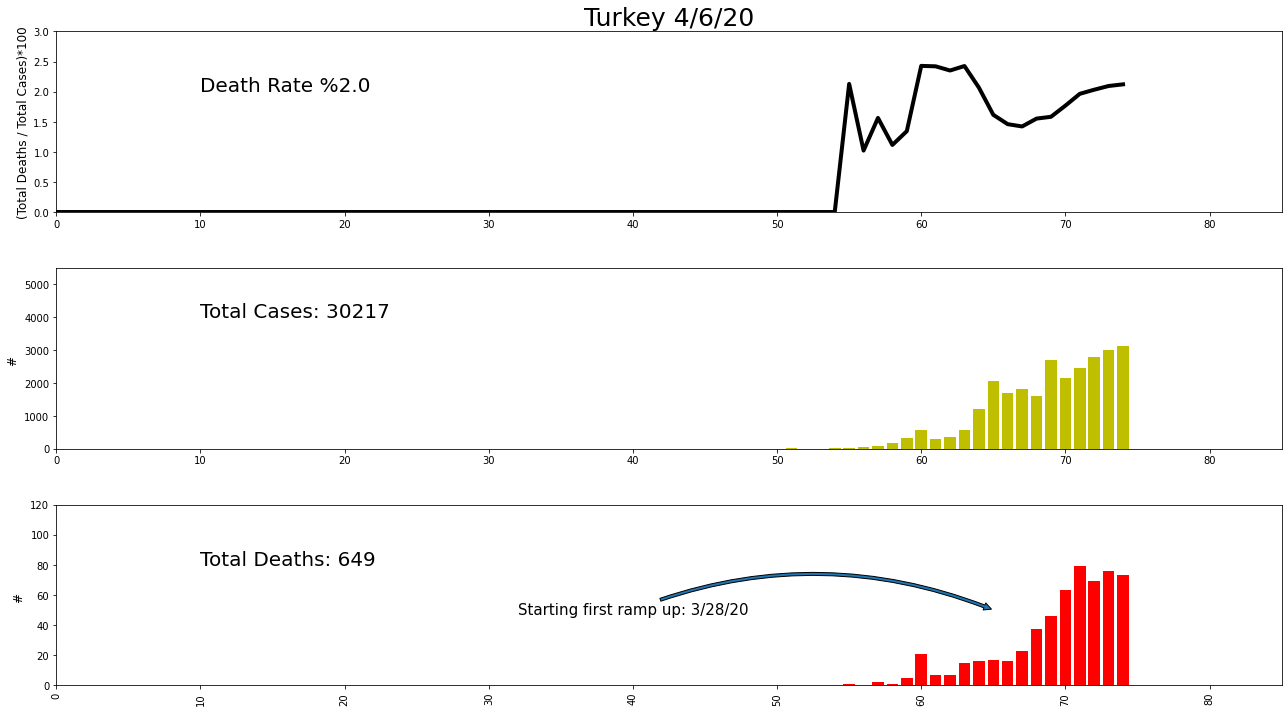

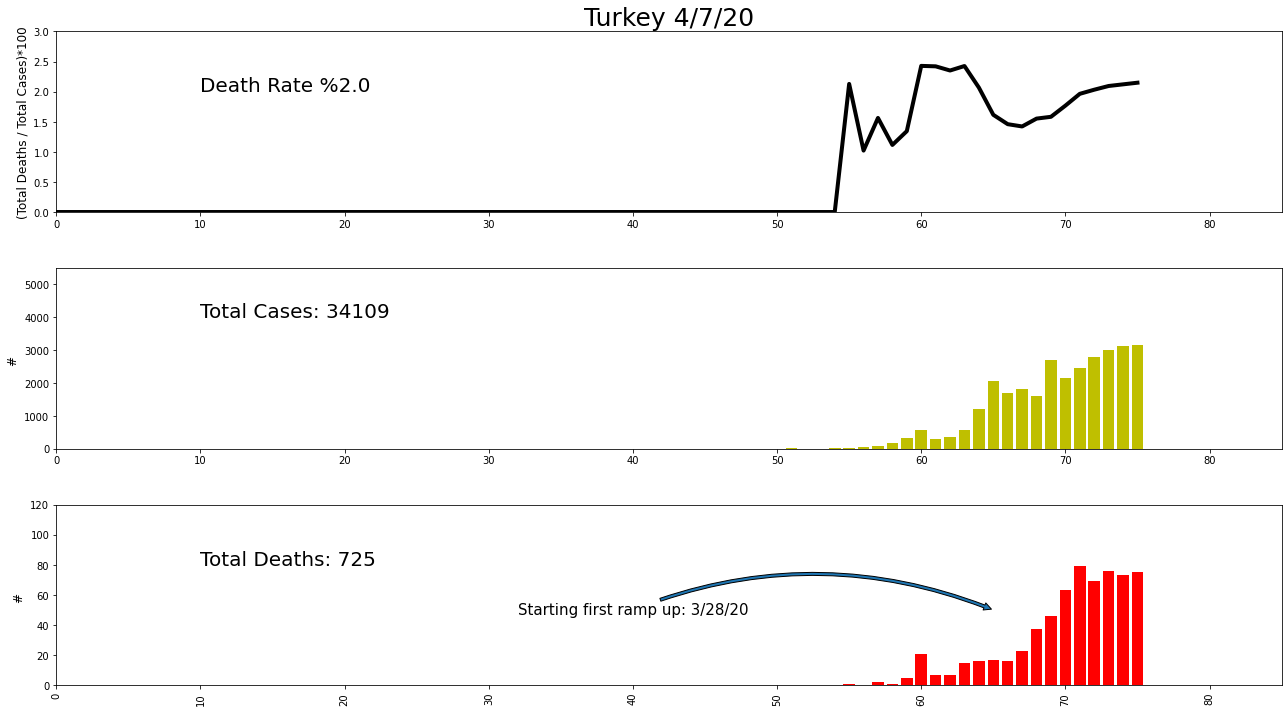

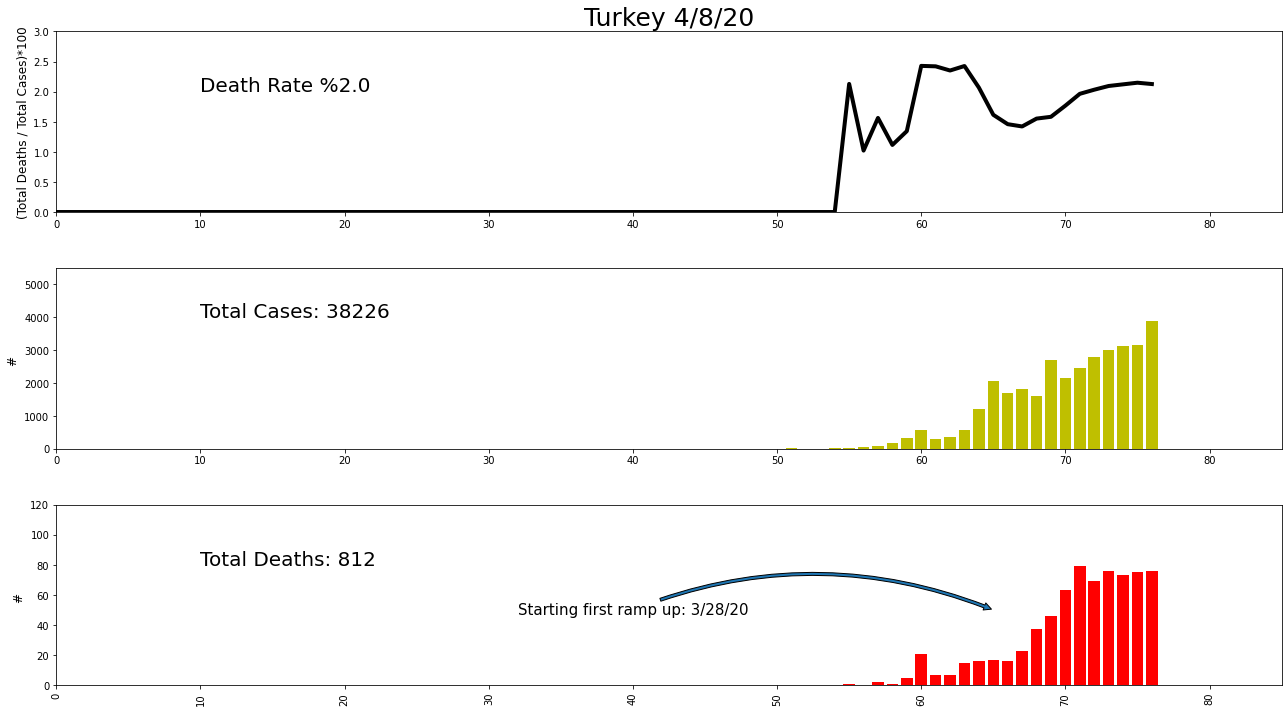

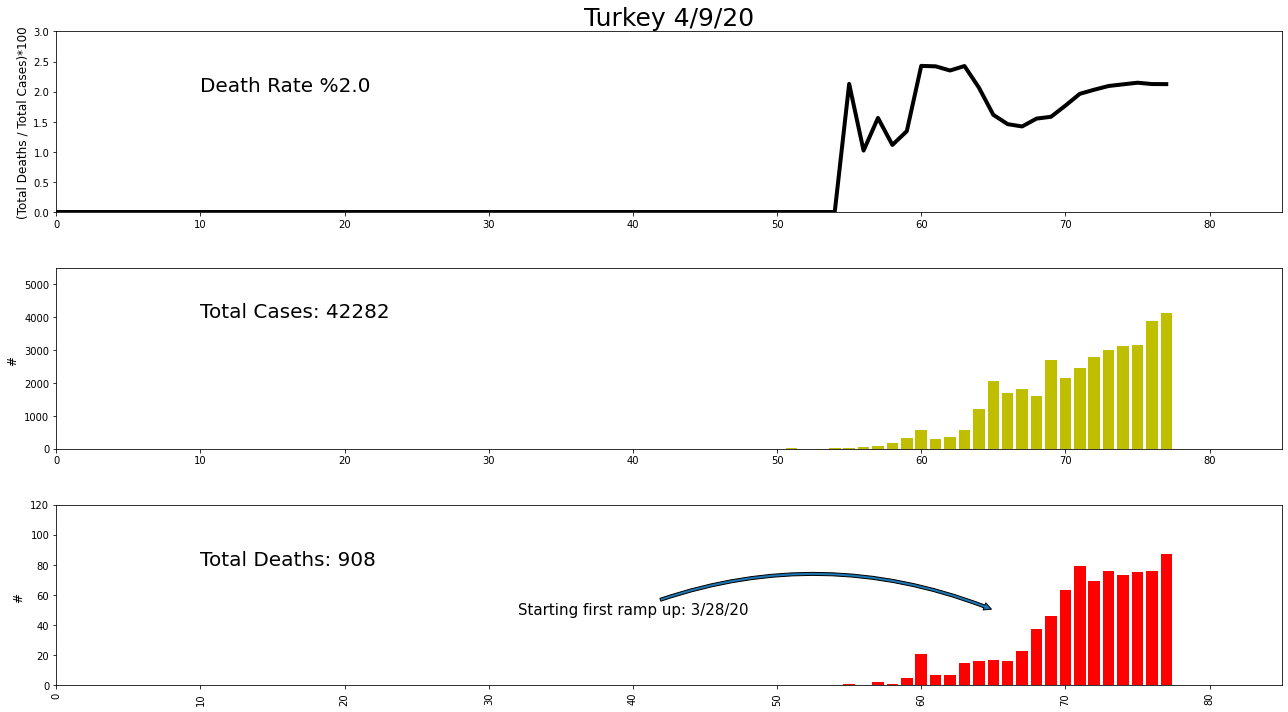

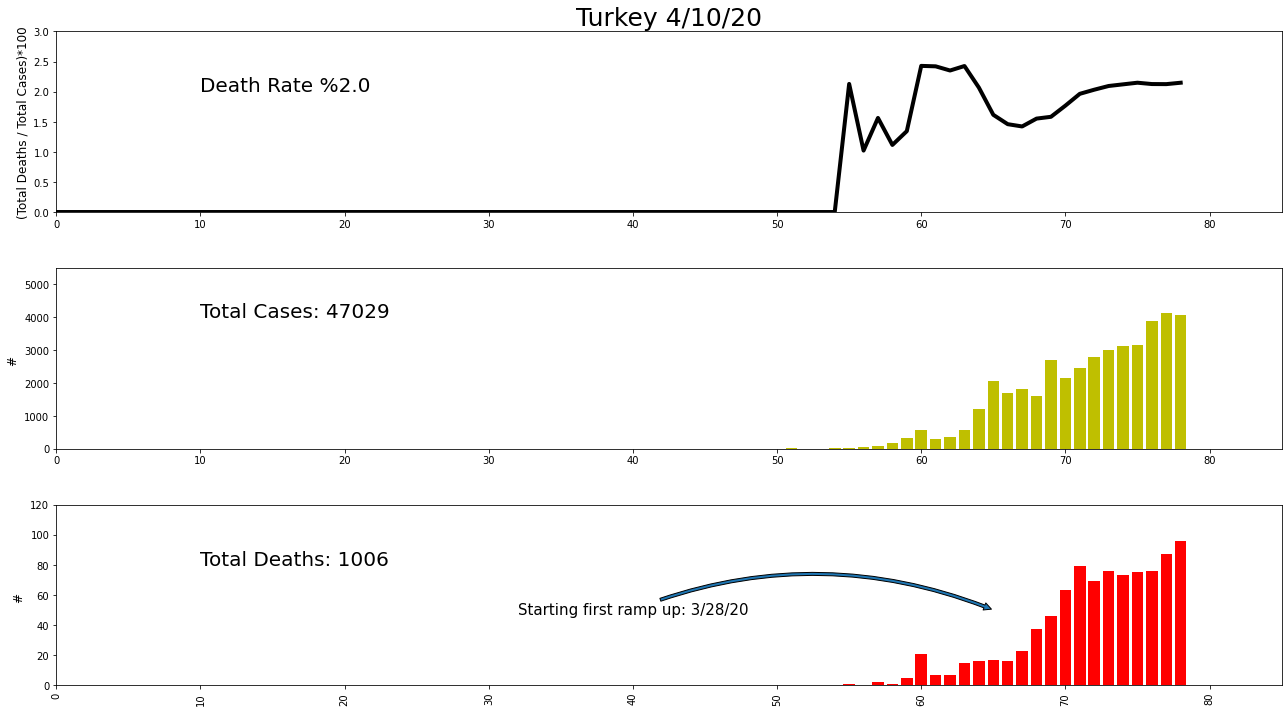

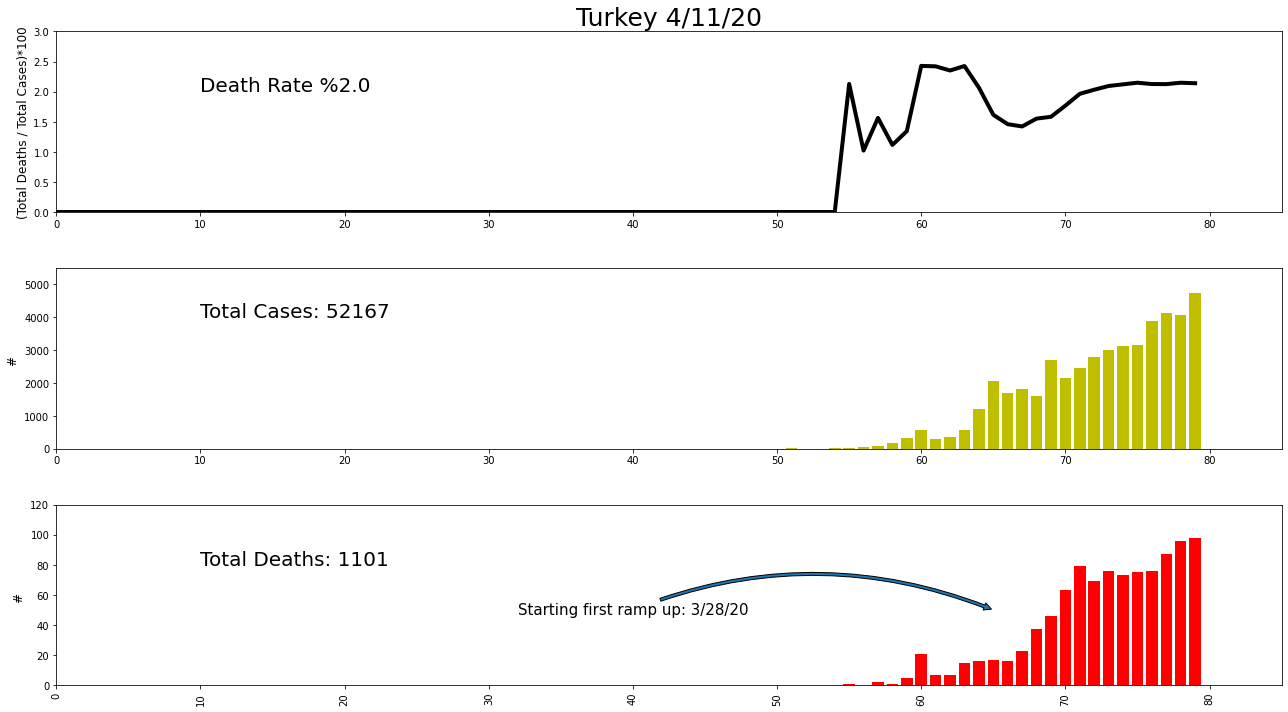

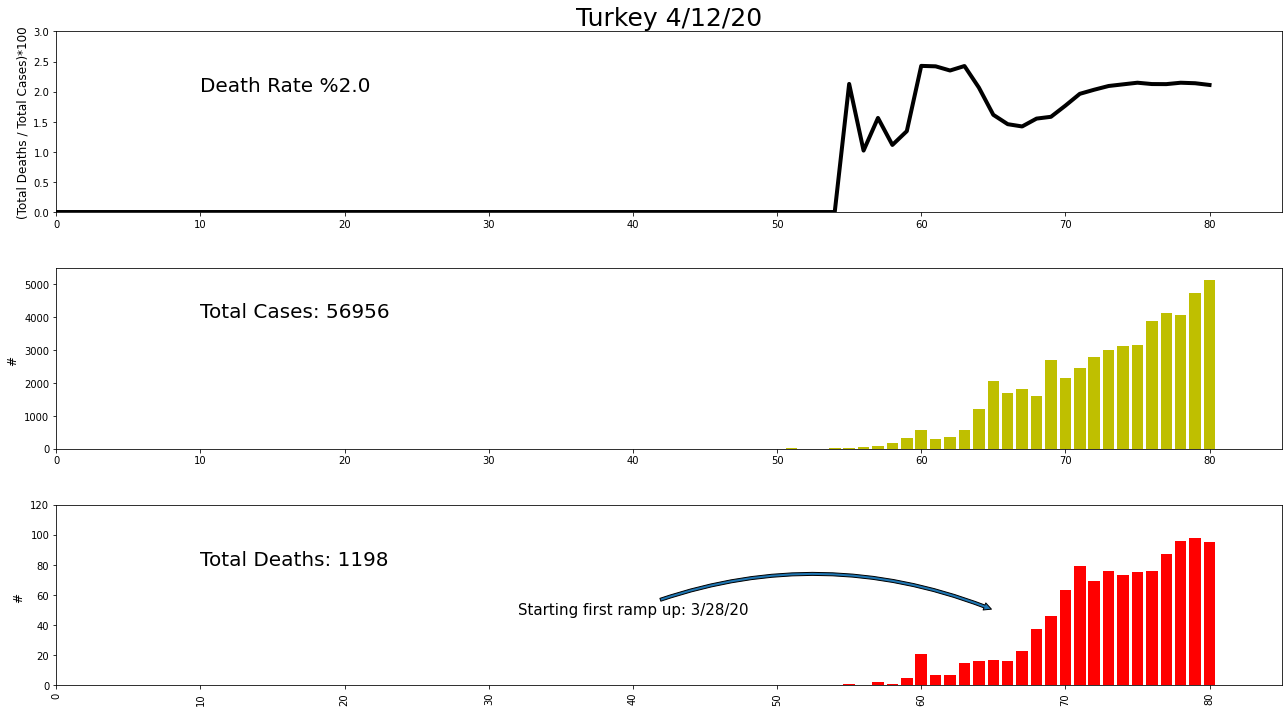

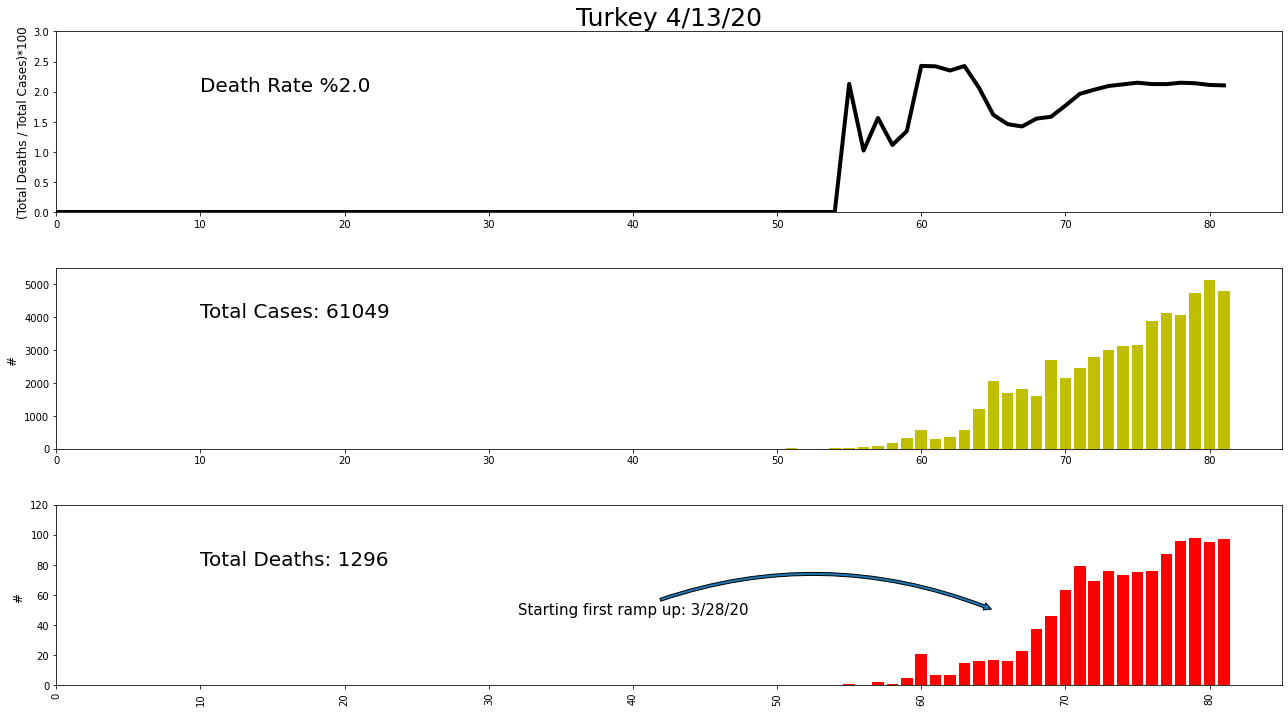

In [22]:
t=0
for i in range(len(DaillyCase)):
    fig = plt.figure()
    
    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)

    plt.plot(scopeDataC[0].index[:i], scopeDataC[0].Rate[:i],linewidth=4,color="k")
    plt.annotate("Death Rate %{}".format(np.around(scopeDataC[0].Rate[i]),decimals=1),xy=(10,2),size=20)
    plt.title("Turkey {}".format(scopeDataC[0].Date[i]), size=25)
    plt.ylabel("(Total Deaths / Total Cases)*100",size=12)
    plt.xlim(0,85)
    plt.ylim(0,3)

    ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=3)

    plt.bar(scopeDataC[0].index[:i], DaillyCase[:i], color="y")
    plt.annotate("Total Cases: {}".format(scopeDataC[0].Quantity[i]),xy=(10,4000),size=20)
    if i >= 60:
        plt.annotate("Dailly Case Peak: {}".format(scopeDataC[0].Date[59]),xy=(59,6000),
                                 xycoords='data',
            xytext=(40, 4000), textcoords='data',
            size=15, va="center", ha="center",
            arrowprops=dict(arrowstyle="simple",
                           connectionstyle="arc3,rad=-0.2"))
    plt.ylabel("# ", size=12)
    plt.xlim(0,85)
    plt.ylim(0,5500)

    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=3)

    plt.bar(scopeDataC[0].index[:i],  DaillyDeaths[:i], color="r")
    plt.annotate("Total Deaths: {}".format(scopeDataD[0].Quantity[i]),xy=(10,80),size=20)
    if i >= 69:
        plt.annotate("Starting first ramp up: {}".format(scopeDataC[0].Date[66]),xy=(65,50),
                                 xycoords='data',
            xytext=(40, 50), textcoords='data',
            size=15, va="center", ha="center",
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=-0.2"))
    plt.ylabel("# ",size=12)
    plt.xlim(0,85)
    plt.ylim(0,120)
    plt.xticks(rotation='vertical')

    plt.tight_layout()
    if i < 55:
        for v in range(1):
            plt.savefig("image/foto{}.png".format(t))
            t = t + 1
    elif 82>i>= 55:
        for p in range(5):
            plt.savefig("image/foto{}.png".format(t))
            t = t + 1
    else:
        for u in range(60):
            plt.savefig("image/foto{}.png".format(t))
            t = t + 1
        
        
    
    

In [ ]:
import os
import subprocess
os.getcwd()
os.chdir('/Desktop/Dev/JupyterNotebooks/Covid-19/image')
subprocess.call(['ffmpeg', '-r', '10', '-f', 'image2', '-s', '800x600', '-i', 
                 'foto%01d.png', '-vcodec', 'libx264', '-crf', '24', '-pix_fmt', 'yuv420p', 'regression.mp4'])

ffmpeg -framerate 20 -i foto%01d.png -c:v libx264 -profile:v high -crf 20 -pix_fmt yuv420p output.mp4